# Lending club case study

## 1. Problem statement
Lending club is a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision.
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## 2. Objective
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. Using exploratory data analysis (EDA) this objective needs to be achieved with the help of dataset which has information about past loan applicants.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


## 3. Understanding the dataset
The Loan dataset contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
The dataset does not contain the rejection criteria details.The loan process involves three steps.
1. Borrower requests a loan amount
2. The approver decides to approve the loan based on past history and verification (funded_amnt).
3. The investor determines the final loan amount to be offered (funded_amnt_inv).

## 4. Data Analysis

### 4.1 Attributes
#### Primary attributes
**Loan Status :** This is the primary attribute and has 3 possible scenarios.
        
    * Fully-Paid: Applicant has fully paid the loan (the principal and the interest rate).
    * Charged-Off: Applicant is in the process of paying the installments, i.e. the tenure of the loan is not yet completed.
    * Current: Applicant has not paid the installments in due time for a long period, i.e. he/she has defaulted on the loan.
    
#### Key columns
The following columns, often referred to as **predictors**, are crucial. These attributes, available during the loan application process, provide insights into whether the loan can be approved or rejected.

* **Customer Demographics**
    * **Anual income** (annual_inc) :- The self-reported annual income provided by the borrower during registration.
    * **Home Ownership** (home_ownership) :- The home ownership status provided by the borrower during registration.
    * **Employee length of service** (emp_length) :- Employment length of employee in years.
    * **Debt to income** (dti) :- A ratio calculated using the borrower’s total monthly debt payments against income. Lower dti will always have higher chance of loan approval.
    * **State** (addr_state) :- The state provided by the borrower in the loan application
* **Loan characteristics**
    * **Loan Amount** (loan_amnt) :- The listed amount of the loan applied for by the borrower
    * **Funded amount** (funded_amnt) :- The total amount committed to that loan at that point in time.
    * **Funded amount by investor** (funded_amnt_inv) :- The total amount committed by investors for that loan at that point in time.
    * **Term** (term) :- The number of payments on the loan.
    * **Rate of interest** (int_rate) :- Interest Rate on the loan
    * **Monthly installment** (installment) :- The monthly payment owed by the borrower if the loan originates.
    * **Grade** (grade) :- LC assigned loan grade.
    * **Sub grade** (sub_grade) :- LC assigned loan subgrade.
    * **verification_status** (verification_status) :- Loan is Verified / Not Verified
    * **Date loan issued** (issue_d) :-The month which the loan was funded.
    * **Purpose of taking loan** (purpose) :-A category provided by the borrower for the loan request.
  
#### Excluded Columns
Certain columns are excluded from the analysis as they do not provide insights into whether the loan can be approved or rejected, nor do they help in predicting potential defaults.

1. **Post approval activities** : This does not provide any details or insights relevant to our goal and will not be included in our analysis.
2. **Granular data** : Columns providing highly detailed information which is not required for our analysis.

### 4.2 Dataset row Analysis
- **Header & Footer Rows:** No header or footer rows in the dataset.
- **Extra Rows:** No column numbers, indicators, etc., found in the dataset.
- **Summary Rows:** No summary rows in the dataset.
- **Dropping Loan Status Rows with "Current" status:** Rows with a "loan_status" of "Current" will be dropped as they represent loans in progress.
- **Identifying and Removing Duplicate Rows:** Duplicate rows in the dataset will be identified and removed if present.

### 4.3 Dataset Column Analysis
#### Dropping Columns
* 54 columns had null values which will be dropped.
  * ['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verification_status_joint']
* 9 columns had Single value which will be dropped.
  * ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
* 3 Columns had more than 60% of missing data will be dropped.
    * ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
* Following columns also dropped which do not contribute to our analysis.
    * ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d']
#### Converting Column Format
- The `term` column will have the "months" text stripped and will be converted to an integer.
- Percentage columns like `(int_rate)` are currently in object format. These columns will have the "%" character stripped and will be converted to float.
- The `issue_d` column will be converted to datetime format with date in **YYYY-mm-dd** format.
- The `emp_length` column will be converted to an integer. The columns have "Years ,+ & <". This will be stripped and converted to intiger

#### Standardizing Values
- Similar values for `home_ownership` like `NONE` and `OTHER` has been standardized as `OTHER`.
- Similar values for `verification_status` like `Source Verified` and `Verified` has been standardized as `Verified`
- Imputing Missing Values: Columns with a lower percentage of missing values will undergo imputation to fill in the missing data.

#### Handling Outliers
* Approach here is to identify outliers and remove them.
* Here the outliers are verified on following columns `loan_amnt` , `funded_amnt`,`funded_amnt_inv`,`annual_inc`, `int_rate`,`installment` and `dti`

## 5. Data cleaning


### 5.1 Load Data

In [197]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [198]:
# Loading data from Loan.csv
df_loan = pd.read_csv('loan.csv')

# understanding total rows and columns
df_loan.shape

(39717, 111)

In [3]:
# displaying loan dataset
df_loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

### 5.2 Identifyng and removing columns having complete null values


In [199]:
# identify columns that need to dropped due to NULL Values 
# identify columns that had complete null values

col_cnt_to_drop = 0
lst_colum_name =[]
for col in sorted(df_loan.columns):
    if df_loan[col].isna().sum()==df_loan.shape[0]:
        lst_colum_name.append(col)
        col_cnt_to_drop = col_cnt_to_drop + 1
        
print(lst_colum_name)
print (len(lst_colum_name))
print(col_cnt_to_drop)

['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verification_status_

In [200]:
# Checking shape before dropping
df_loan.shape

(39717, 111)

In [201]:
# there are 54 columns that are having complete null values
# we can directly drop these colums as ot have no value for analysis
df_loan.dropna(axis=1, how='all', inplace = True)
df_loan.shape

(39717, 57)

### 5.3 Checking  column had single values

##### if the column had single value this will not add any value for analysis. we need to identify those datasets and remove them 

In [202]:
# identifying columns had single value
sing_list =[]
for c in df_loan.columns:
    if df_loan[c].nunique() == 1:
        sing_list.append(c)

print (sing_list)
print(len(sing_list))

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
9


In [203]:
# Dropping columns that had single value
df_loan.drop( sing_list , axis=1 , inplace =True)
df_loan.shape

(39717, 48)

### 5.4 Analysing Missing Records

##### checking columns that having missing data more than 60%

In [204]:
# understanding % of Missing records on each column
round(df_loan.isna().sum()/len(df_loan) *100 ,2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.59
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec   

In [205]:
# Getting the column had missing data more than 60%
missing_data_col=[]
for c in df_loan.columns:
    if round((df_loan[c].isna().sum()/len(df_loan)),2) >= .6:
        missing_data_col.append(c)
print (missing_data_col)


['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [206]:
# Dropping columns that had more than 60% of missing data
df_loan.drop( missing_data_col , axis=1 , inplace =True)
df_loan.shape

(39717, 45)

### 5.5 Checking and dropping Duplicate records
##### if there is duplicate records that need to be cleaned

In [207]:
# checking duplicate records
df_loan[df_loan.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

[0 rows x 45 columns]

##### No rows are duplicated

### 5.6 Deleting Records
##### Loans in progress cannot be taken as its not a past data and cannot insight of likelyhood to be a defaulter

In [208]:
## verifying the occurance % of 'Current' Status in the entire dataset
round(df_loan[df_loan['loan_status']=='Current']['loan_status'].count()/len(df_loan)*100,2)

2.87

##### This is taking only 2.9 % of Total data. Hence it is safe to drop these records

In [209]:
df_loan = df_loan[df_loan['loan_status']!='Current']

In [210]:
df_loan.shape

(38577, 45)

### 5.7 Removing columns which not directly influvence the objective 

In [211]:
# Taking the columns to drop in a List
cols_to_drop =[
    'id',
'member_id',
'emp_title',
'url',
'desc',
'title',
'zip_code',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d'
]



In [212]:
df_loan.drop(cols_to_drop, axis=1, inplace=True)

In [213]:
df_loan.shape

(38577, 18)

### 5.8 Imputing values

In [214]:
#verifying columns that had null values
df_loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

* emp_length & pub_rec_bankruptcies has null values

In [20]:
df_loan[df_loan['emp_length'].isna()]['annual_inc'].describe()

count      1033.000000
mean      45913.330649
std       37964.731520
min        4200.000000
25%       25000.000000
50%       38368.000000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

##### Large variance on the max and min. hence we need to see what is the most commonly used

In [215]:
# identifying what is most commonly used
df_loan['emp_length'].mode()[0]

'10+ years'

In [216]:
# Filling Null values with what is commonly used
df_loan['emp_length'].fillna(df_loan['emp_length'].mode()[0],inplace=True)

In [217]:
# verify Total number of null records in pub_rec_bankruptcies column
df_loan['pub_rec_bankruptcies'].isnull().sum()

697

In [218]:
# Removing null records of pub_rec_bankruptcies
df_loan=df_loan[df_loan['pub_rec_bankruptcies'].notna()]

In [219]:
df_loan.shape

(37880, 18)

In [220]:
# Verifying any missing values
df_loan.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

##### Filled Missing values

### 5.9 Data conversion

In [221]:
df_loan['term']

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39562     36 months
39573     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 37880, dtype: object

In [222]:
# coneverting term to int and removing Month from the data
df_loan['term']=df_loan['term'].apply(lambda x: int(x.replace('months','').strip()))

In [223]:
df_loan['term'].dtype

dtype('int64')

In [224]:
df_loan['term'].head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [225]:
df_loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 37880, dtype: object

In [226]:
# Converting int rate to float and removing %
df_loan['int_rate']=df_loan['int_rate'].apply(lambda x: float(x.replace('%','').strip()))

In [227]:
# Checking the data type of int_rate after conversion
df_loan['int_rate'].dtype

dtype('float64')

In [228]:
# verifying values of int_rate after conversion
df_loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 37880, dtype: float64

In [229]:
df_loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39562    Nov-07
39573    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 37880, dtype: object

In [230]:
df_loan['issue_d'].dtype

dtype('O')

In [231]:
# issue_d is of type object which need to be converted to datetime
df_loan['issue_d']=pd.to_datetime(df_loan['issue_d'] ,format = '%b-%y')

In [232]:
# issue_d is converted with format of yyyy-mm-dd
df_loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 37880, dtype: datetime64[ns]

In [233]:
df_loan['emp_length'].value_counts()

emp_length
10+ years    9402
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [234]:
# Employee length converted to int with mapping to each type of length of service
emp_lenght_map = {'< 1 year':0 ,  '1 year':1 , '2 years':2 ,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,
                  '8 years':8 ,'9 years':9 , '10+ years': 10 }
df_loan['emp_length'] = df_loan['emp_length'].map(emp_lenght_map)

In [235]:
df_loan['emp_length'].value_counts()

emp_length
10    9402
0     4341
2     4207
3     3951
4     3297
5     3161
1     3077
6     2136
7     1689
8     1410
9     1209
Name: count, dtype: int64

In [236]:
df_loan['verification_status'].value_counts()

verification_status
Not Verified       15998
Verified           12205
Source Verified     9677
Name: count, dtype: int64

In [237]:
# Combining Source Verified & Verified into Verified
df_loan['verification_status'].replace('Source Verified','Verified',inplace=True)

In [239]:
df_loan['verification_status'].value_counts()

verification_status
Verified        21882
Not Verified    15998
Name: count, dtype: int64

### 5.10 Outliers 

* Approach here is to identify outliers and remove all outliers
* Here the outliers are verified on following columns `loan_amnt` , `funded_amnt`,`funded_amnt_inv`,`annual_inc`, `int_rate`,`installment` and `dti`

In [240]:
df_loan['loan_amnt'].describe()

count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

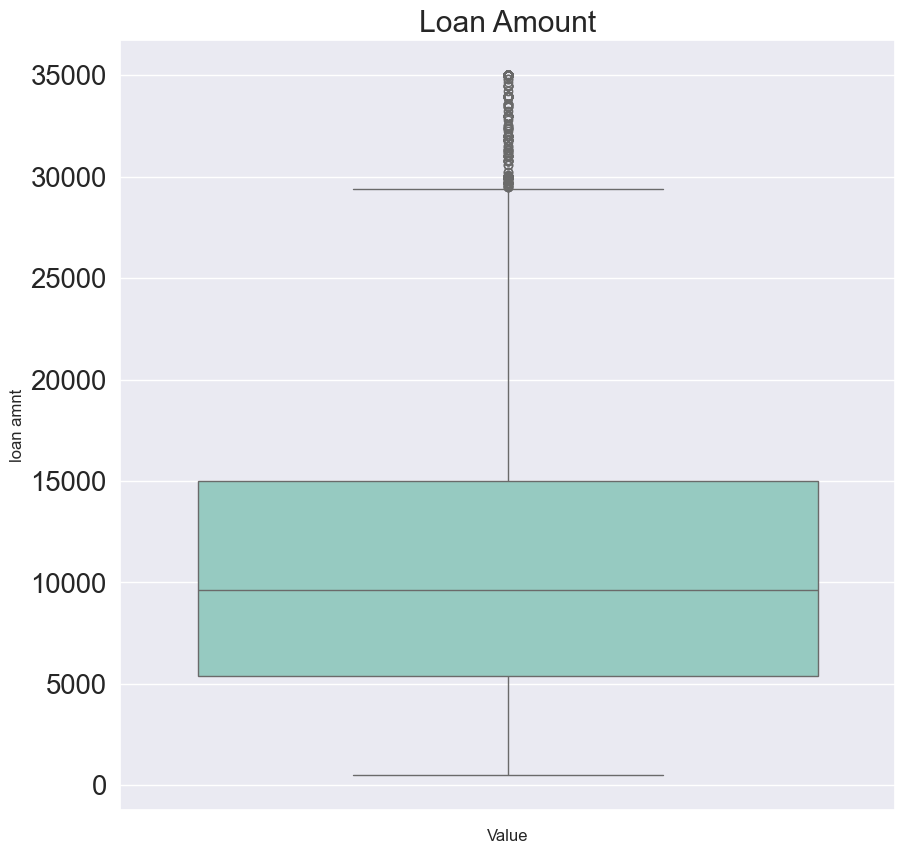

In [241]:
# verifying outliers for Loan amount
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['loan_amnt'],orient='v' , palette ='Set3')
plt.title('Loan Amount')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('loan amnt', fontsize = 12)
plt.show()

In [242]:
print(df_loan['loan_amnt'].quantile(0.25))
print(df_loan['loan_amnt'].quantile(0.75))

5375.0
15000.0


- Majority of Loan applicants loan amount is between 5000 to 15000

<Axes: ylabel='annual_inc'>

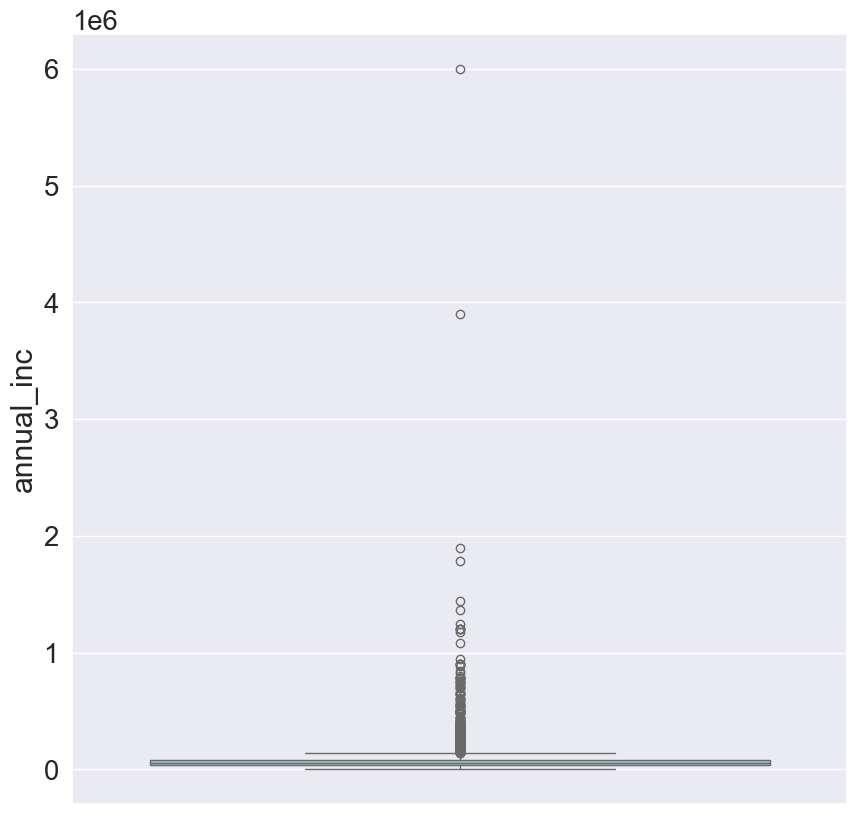

In [243]:
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['annual_inc'],orient='v' , palette ='Set3')

##### Annual income has outliers. 
##### Next step is to Calculate the inter-quartile range (IQR) and filtering out the outliers outside of lower and upper bound

In [244]:
# calculating lower and upper bound

first_quantile = df_loan['annual_inc'].quantile(0.25)
third_quantile = df_loan['annual_inc'].quantile(0.75)
iqr = third_quantile-first_quantile
lbound = first_quantile - ( 1.5 * iqr )
ubound = third_quantile + ( 1.5 * iqr )
df_anual_inc_ll = df_loan.annual_inc > lbound
df_anual_inc_up = df_loan.annual_inc < ubound

df_net_income = df_anual_inc_ll & df_anual_inc_up

# filetering outliers and geting annual income within lower and upper bound range
df_loan=df_loan[df_net_income]

df_loan.shape

(36094, 18)

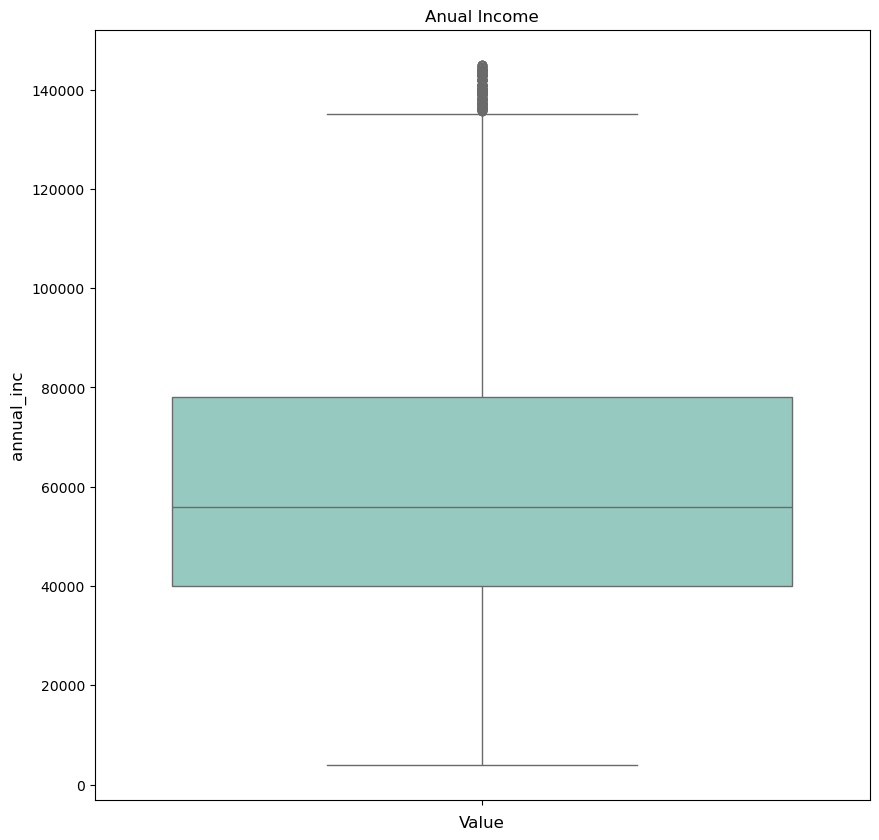

In [50]:
# Verifying annual income after removing outliers
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['annual_inc'],orient='v' , palette ='Set3')
plt.title('Anual Income')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('annual_inc', fontsize = 12)
plt.show()

In [245]:
print(df_loan['annual_inc'].quantile(0.25))
print(df_loan['annual_inc'].quantile(0.75))

40000.0
78000.0


- The Annual income for most of the loan applicants are between 40K and 78K

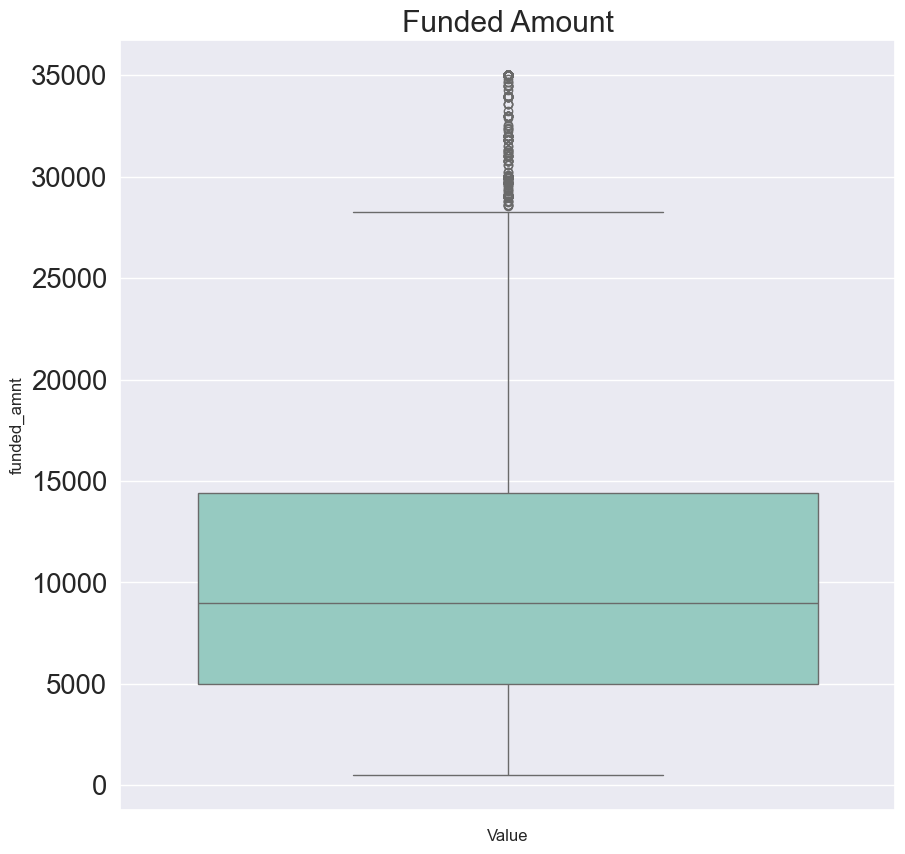

In [246]:
# verifying outliers for Funded amount
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['funded_amnt'],orient='v' , palette ='Set3')
plt.title('Funded Amount')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('funded_amnt', fontsize = 12)
plt.show()

In [247]:
print(df_loan['funded_amnt'].quantile(0.25))
print(df_loan['funded_amnt'].quantile(0.75))

5000.0
14400.0


- The funded amount for majority of the applicants is between 5K and 14K

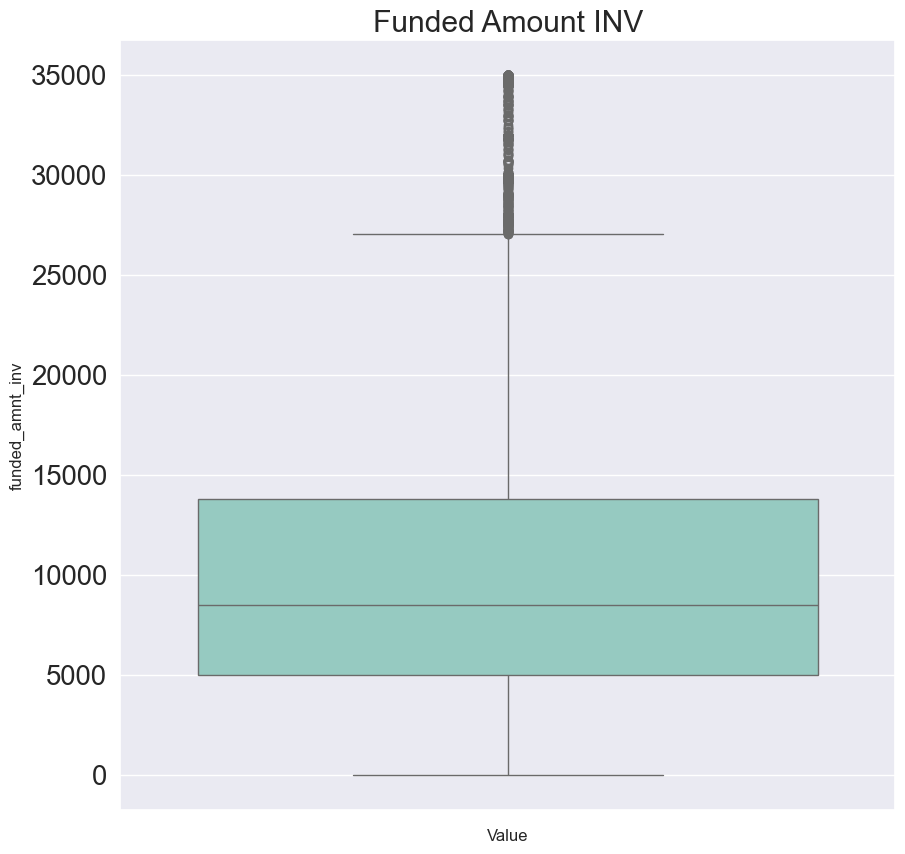

In [248]:
# Verifying outliers for Funded amount by invester
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['funded_amnt_inv'],orient='v' , palette ='Set3')
plt.title('Funded Amount INV')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('funded_amnt_inv', fontsize = 12)
plt.show()

In [249]:
print(round(df_loan['funded_amnt_inv'].quantile(0.25),2))
print(round(df_loan['funded_amnt_inv'].quantile(0.75),2))

5000.0
13819.66


- The funded amount by invester for majority of the applicants is between 5K and 14K

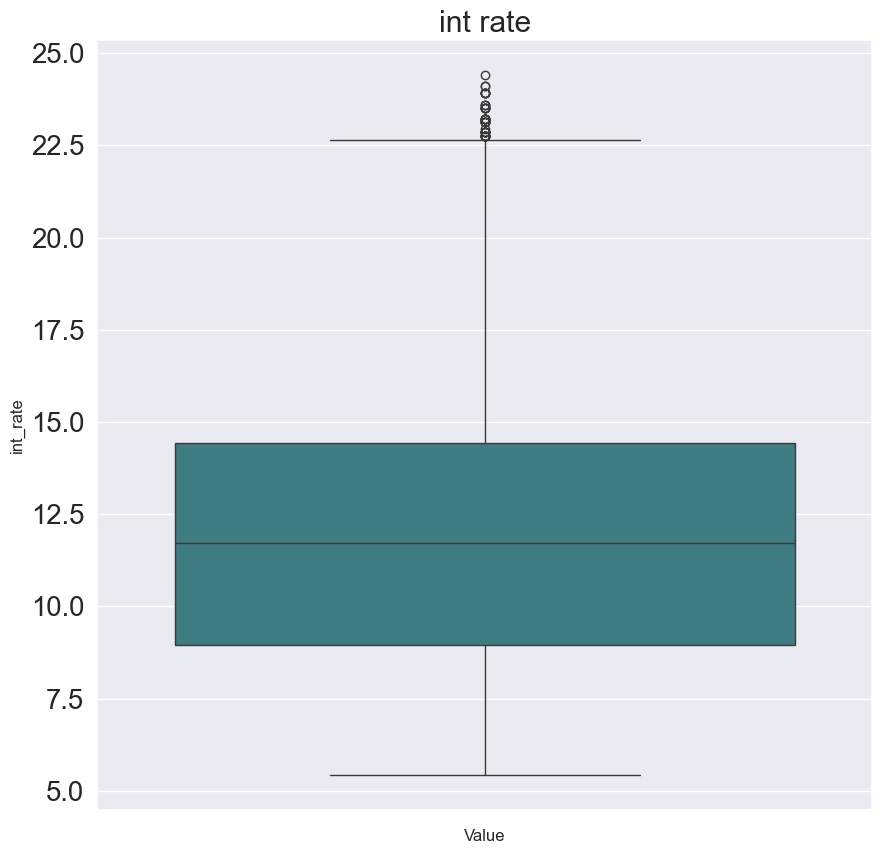

In [250]:
# Verifying outliers for interest rate
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['int_rate'],orient='v' , palette ='crest')
plt.title('int rate')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('int_rate', fontsize = 12)
plt.show()

In [251]:
print(round(df_loan['int_rate'].quantile(0.25),0))
print(round(df_loan['int_rate'].quantile(0.75),0))

9.0
14.0


- The interest rate for majority of the applicants is 9% to 14%

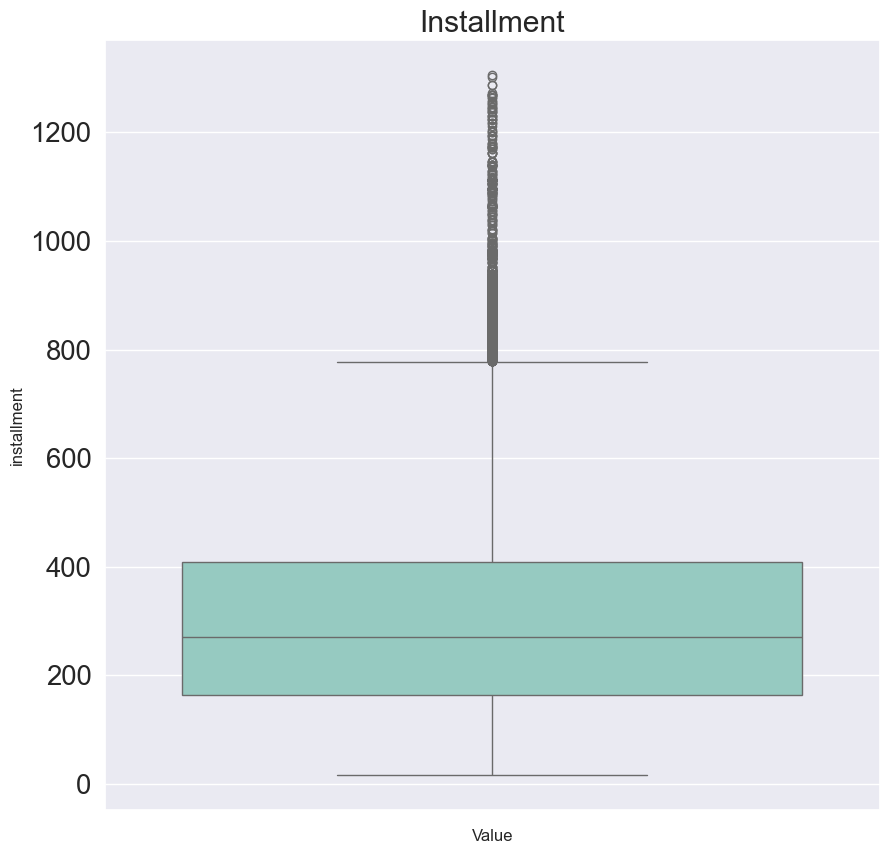

In [252]:
# Verifying outliers for installment 
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['installment'],orient='v' , palette ='Set3')
plt.title('Installment')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('installment', fontsize = 12)
plt.show()

In [253]:
print(round(df_loan['installment'].quantile(0.25),0))
print(round(df_loan['installment'].quantile(0.75),0))

163.0
409.0


- The installment for majority of the applicants is in between 163 and 400

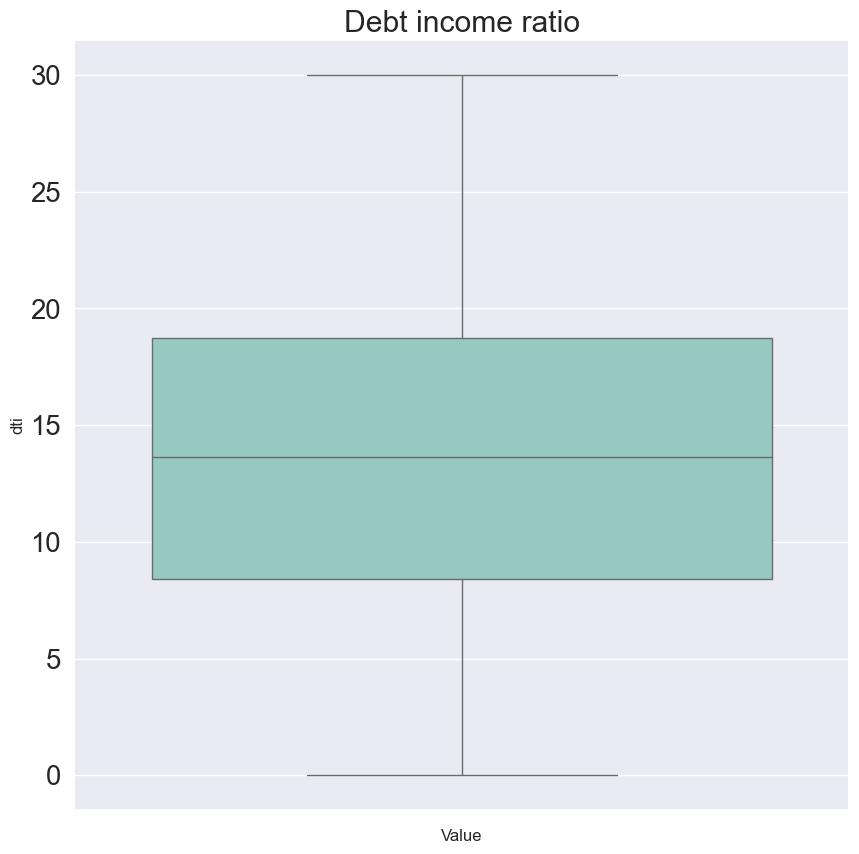

In [254]:
# Verifying outliers for dti
plt.figure(figsize =(10,10))
sns.boxplot(y=df_loan['dti'],orient='v' , palette ='Set3')
plt.title('Debt income ratio')
plt.xlabel('Value' ,fontsize = 12)
plt.ylabel('dti', fontsize = 12)
plt.show()

In [255]:
print(round(df_loan['dti'].quantile(0.25),0))
print(round(df_loan['dti'].quantile(0.75),0))

8.0
19.0


- The Debt-to-income ratio for majority of applicants are between 8 to 19

#### Outlier Summary
* Majority of Loan applicants loan amount is between 5000 to 15000.
* Annual income has outliers. Filtered out the outliers outside of lower and upper bound.
* After removing outliers, the annual income for most of the loan applicants are between 40K and 78K.
* The funded amount for majority of the applicants is between 5K and 14K.
* The funded amount by investor for majority of the applicants is between 5K and 14K.
* The interest rate for majority of the applicants is 9% to 14%.
* The installment for majority of the applicants is between 163 and 400.
* The Debt-to-income ratio for majority of applicants is between 8 and 19.

### 5.11 Derived columns


1. New columns are month and year of loan issued date and then another column to identify quarter wise.
2. Bucketing Loan amount, funded amount, annual income and DTI

In [257]:
# Extracting Month and year and adding another column mnth_issued & yr_issued
df_loan['mnth_issued'] = df_loan['issue_d'].dt.month
df_loan['yr_issued'] = df_loan['issue_d'].dt.year

In [258]:
# Method to extract the Quarter and assign to column quarter
def get_quarter(mnth):
    if mnth in [1,2,3]:
        return 'Q1'
    elif mnth in [4,5,6]:
        return 'Q2'
    elif mnth in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'  
df_loan['quarter'] = df_loan['mnth_issued'].apply(get_quarter)

In [259]:
df_loan[['issue_d','mnth_issued','yr_issued', 'quarter']]

issue_d  mnth_issued  yr_issued quarter
0     2011-12-01           12       2011      Q4
1     2011-12-01           12       2011      Q4
2     2011-12-01           12       2011      Q4
3     2011-12-01           12       2011      Q4
5     2011-12-01           12       2011      Q4
...          ...          ...        ...     ...
39562 2007-11-01           11       2007      Q4
39573 2007-11-01           11       2007      Q4
39623 2007-10-01           10       2007      Q4
39666 2007-08-01            8       2007      Q3
39680 2007-08-01            8       2007      Q3

[36094 rows x 4 columns]

In [262]:
# Method to Create loan amount bins
def getLoanamountCategory(loanamount):
    if loanamount <=5000:
        return '0-5K'
    elif 5001 <= loanamount <= 10000:
        return '5K-10K'
    elif 10001 <= loanamount <= 15000:
        return '10K-15K'
    elif 15001 <= loanamount <= 20000:
        return '15K-20K'
    else:
        return '20K-above'
         

In [263]:
# Method to create annual income bins
def getanualincCat(anualinc):
    if anualinc <=40000:
        return '0-40K'
    elif 40001 <= anualinc <= 50000:
        return '40K-50K'
    elif 50001 <= anualinc <= 60000:
        return '50K-60K'
    elif 60001 <= anualinc <= 70000:
        return '60K-70K'
    elif 70001 <= anualinc <= 80000:
        return '70K-80K'
    else:
        return '80K-above'
         

In [265]:
# Method to create interest rate bins
def getint_rate_cat(rate):
    if rate <=5:
        return '0%-5%'
    elif 5.1 <= rate <= 10:
        return '5%-10%'
    elif 10.1 <= rate <= 15:
        return '10%-15%'
    elif 15.1 <= rate <= 20:
        return '15%-20%'
    else:
        return '20% and above'

In [266]:
# Method to create DTI bins
def getdti_cat(dti):
    if dti <=8:
        return 'Very low'
    elif 8.1 <= dti <= 12:
        return 'Low'
    elif 12.1<= dti <= 16:
        return 'medium'
    elif 16.1 <= dti <= 20:
        return 'High'
    else:
        return 'Very High'

In [269]:
#Creating Loan amount bucket
df_loan['Loanamt_bucket'] = df_loan['loan_amnt'].apply(getLoanamountCategory)

In [270]:
df_loan[['Loanamt_bucket' ,'loan_amnt']]

Loanamt_bucket  loan_amnt
0               0-5K       5000
1               0-5K       2500
2               0-5K       2400
3             5K-10K      10000
5               0-5K       5000
...              ...        ...
39562           0-5K       4800
39573         5K-10K       7000
39623         5K-10K       9000
39666        15K-20K      15450
39680           0-5K       3000

[36094 rows x 2 columns]

In [271]:
# Creating funded amount bucket
df_loan['funded_amnt_bucket']=df_loan['funded_amnt'].apply(getLoanamountCategory)

In [272]:
df_loan[['funded_amnt_bucket','funded_amnt']]

funded_amnt_bucket  funded_amnt
0                   0-5K         5000
1                   0-5K         2500
2                   0-5K         2400
3                 5K-10K        10000
5                   0-5K         5000
...                  ...          ...
39562               0-5K         4800
39573             5K-10K         7000
39623             5K-10K         9000
39666            15K-20K        15450
39680               0-5K         3000

[36094 rows x 2 columns]

In [273]:
# Creating annual income bucket
df_loan['annual_inc_bucket']=df_loan['annual_inc'].apply(getanualincCat)

In [274]:
df_loan[['annual_inc_bucket','annual_inc']]

annual_inc_bucket  annual_inc
0                 0-40K     24000.0
1                 0-40K     30000.0
2                 0-40K     12252.0
3               40K-50K     49200.0
5                 0-40K     36000.0
...                 ...         ...
39562             0-40K     35000.0
39573           60K-70K     63500.0
39623             0-40K     39000.0
39666             0-40K     40000.0
39680             0-40K     36153.0

[36094 rows x 2 columns]

In [275]:
# Creating interest rate bucket
df_loan['int_rate_bucket']=df_loan['int_rate'].apply(getint_rate_cat)

In [276]:
df_loan[['int_rate_bucket', 'int_rate']]

int_rate_bucket  int_rate
0             10%-15%     10.65
1             15%-20%     15.27
2             15%-20%     15.96
3             10%-15%     13.49
5              5%-10%      7.90
...               ...       ...
39562         10%-15%     10.28
39573         10%-15%     10.59
39623         10%-15%     12.49
39666         10%-15%     11.22
39680         10%-15%     11.86

[36094 rows x 2 columns]

In [277]:
# Creating DTI bucket
df_loan['dti_bucket'] = df_loan['dti'].apply(getdti_cat)

In [278]:
df_loan[['dti_bucket','dti'] ]

dti_bucket    dti
0      Very High  27.65
1       Very low   1.00
2            Low   8.72
3           High  20.00
5            Low  11.20
...          ...    ...
39562   Very low   7.51
39573        Low   8.50
39623   Very low   5.08
39666     medium  13.50
39680   Very low   7.47

[36094 rows x 2 columns]

## 6 Univariate analysis

### 6.1 Ordered categorical Variables
1. term -- The number of payments on the loan.
2. grade -- LC assigned loan grade
3. sub_grade -- LC assigned loan subgrade
4. emp_length -- Employment length in years
5. mnth_issued -- Month in which loan issued
6. yr_issued -- Year in which loan isssued
7. quarter -- in which quarter loan was issued

In [279]:
# For this analysis we will be looking only charged off loans
df_loan_chargedoff = df_loan[df_loan['loan_status']=='Charged Off']

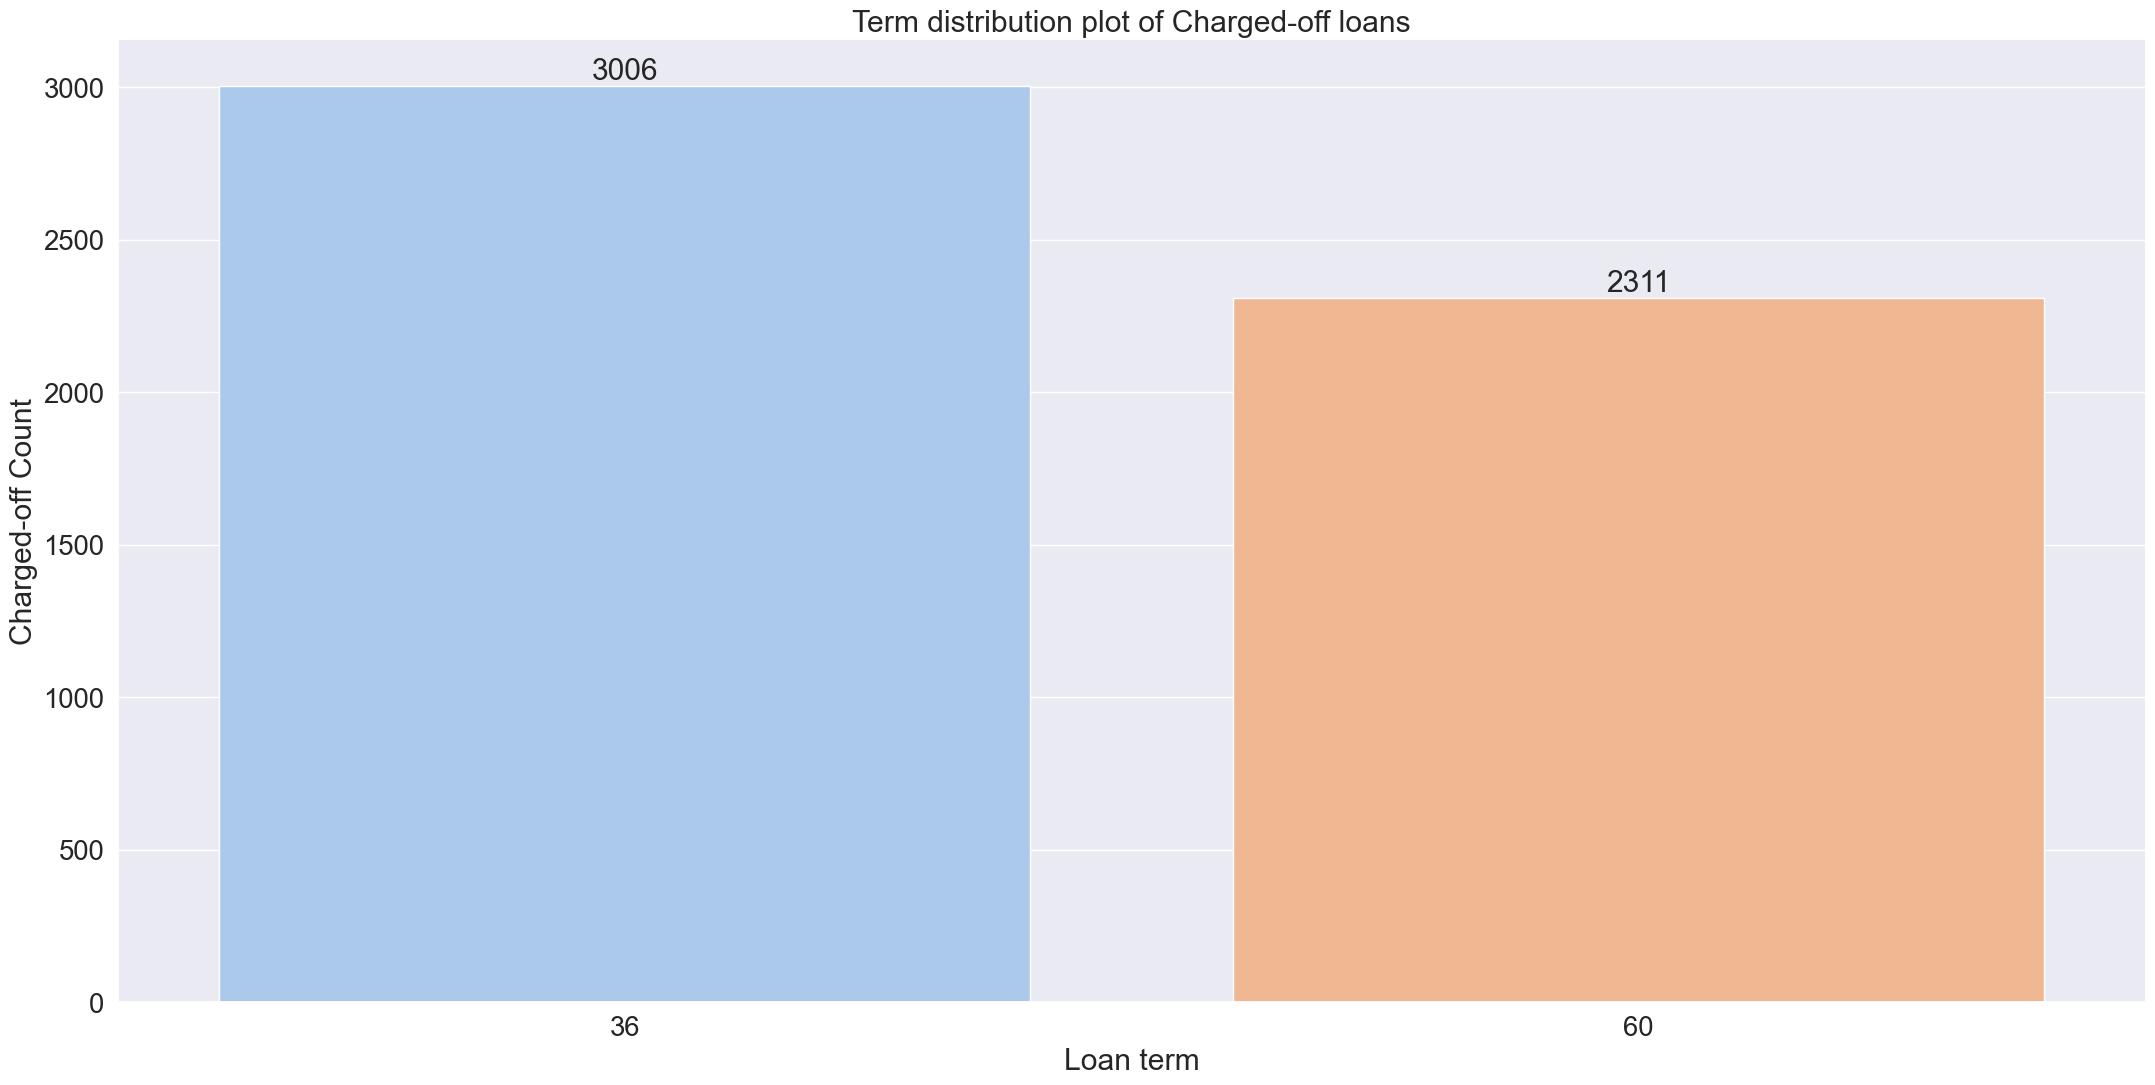

In [280]:
# Creating Seaborn categorical plot to check the Term distribution plot of Charged-off loans
catplot=sns.catplot(x='term',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0)
catplot.set(title='Term distribution plot of Charged-off loans', xlabel='Loan term', ylabel='Charged-off Count')

# for annonate
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Loans with a 36-month term are most likely to default. 3006 Loans under 36 months got defaulted. This indicates that individuals default on short-term loans.

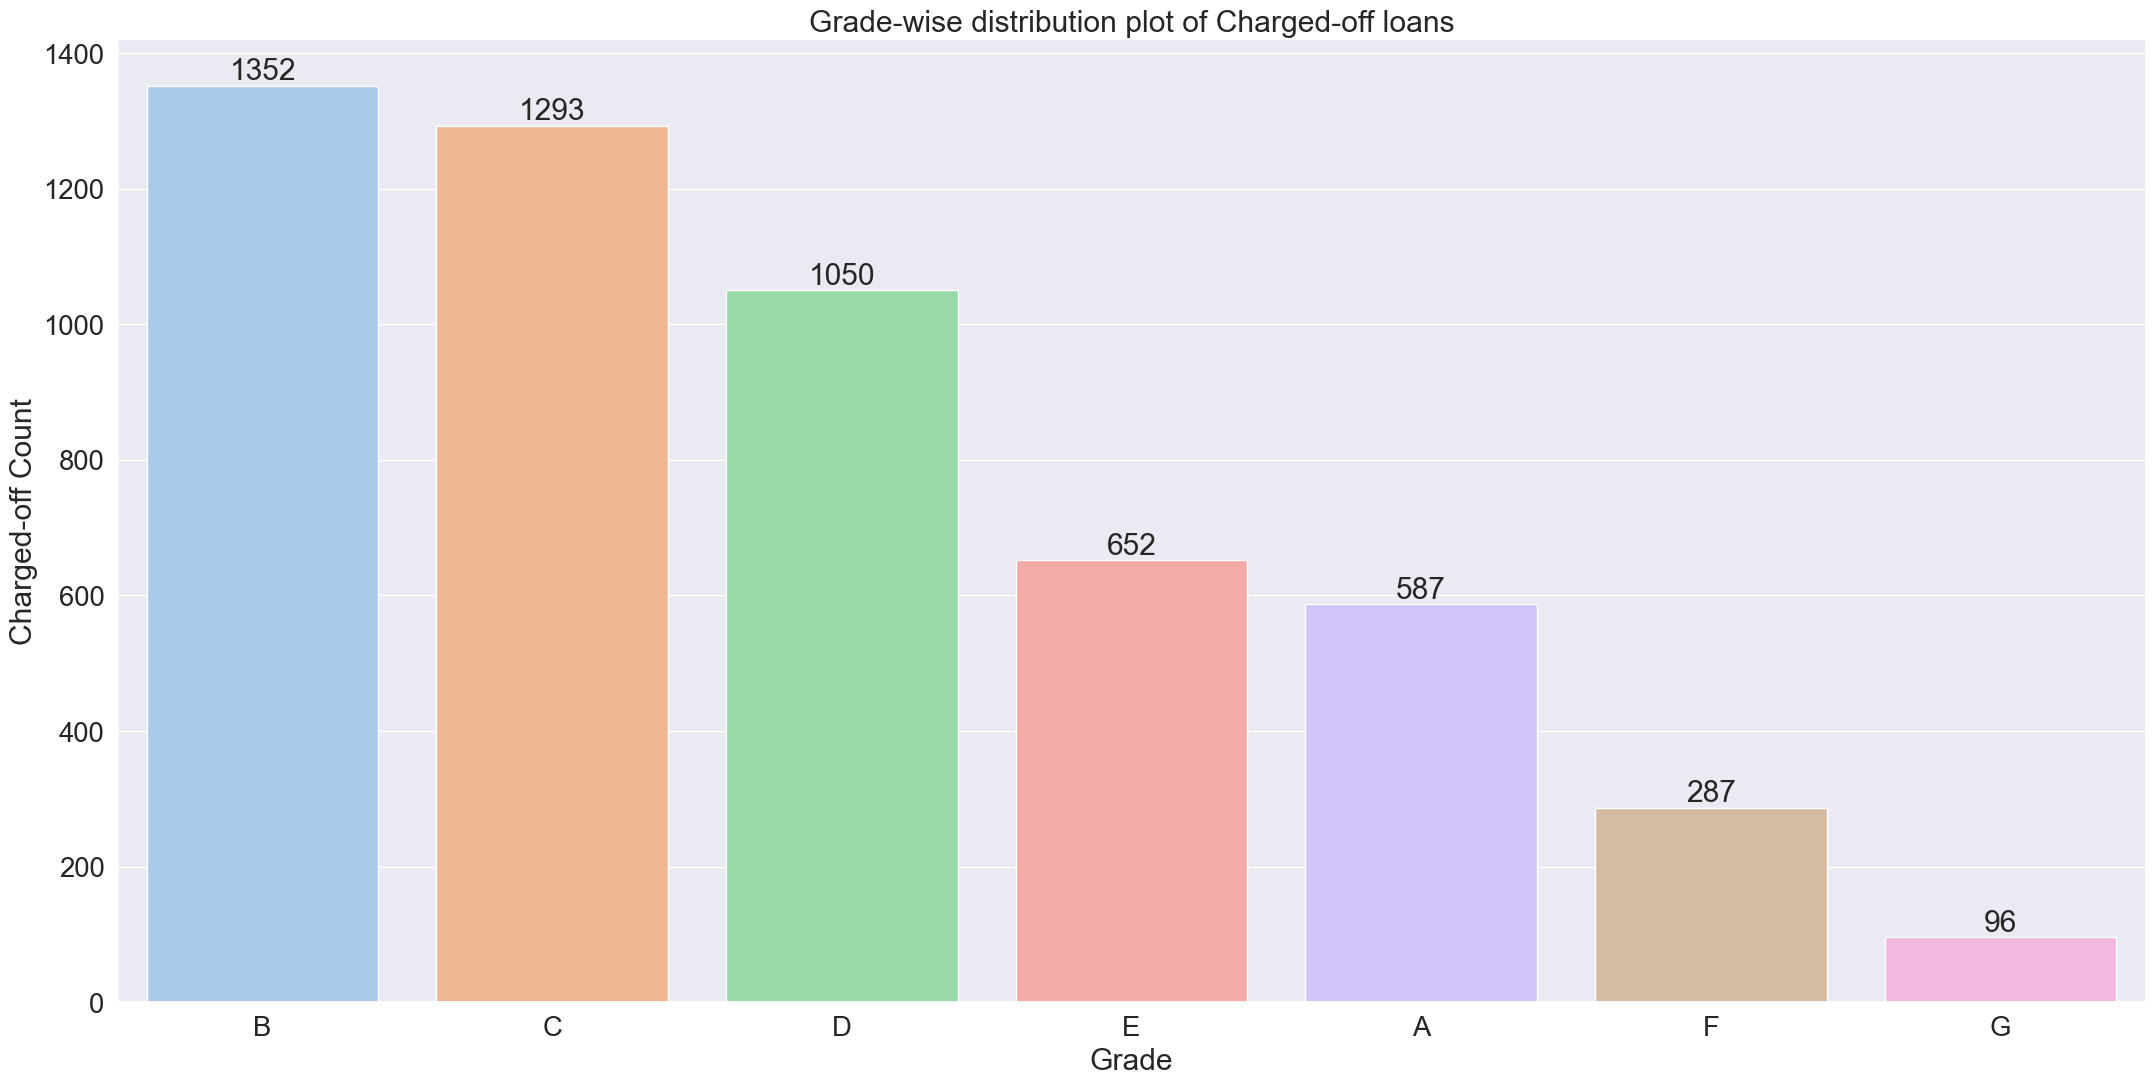

In [281]:
# Creating Seaborn categorical plot for Grade wise distribution plot of Charged-off loans
catplot=sns.catplot(x='grade',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                   order=df_loan_chargedoff['grade'].value_counts().index)
catplot.set(title='Grade-wise distribution plot of Charged-off loans', xlabel='Grade', ylabel='Charged-off Count')

# to Annonate
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Grade B had the highest number of Charged off loan applicants, with a total of 1,352 applicants. The next is C with 1293 loan applicants. This indicates the lending club should pay attention for providing loan to B & C Grade applicants.

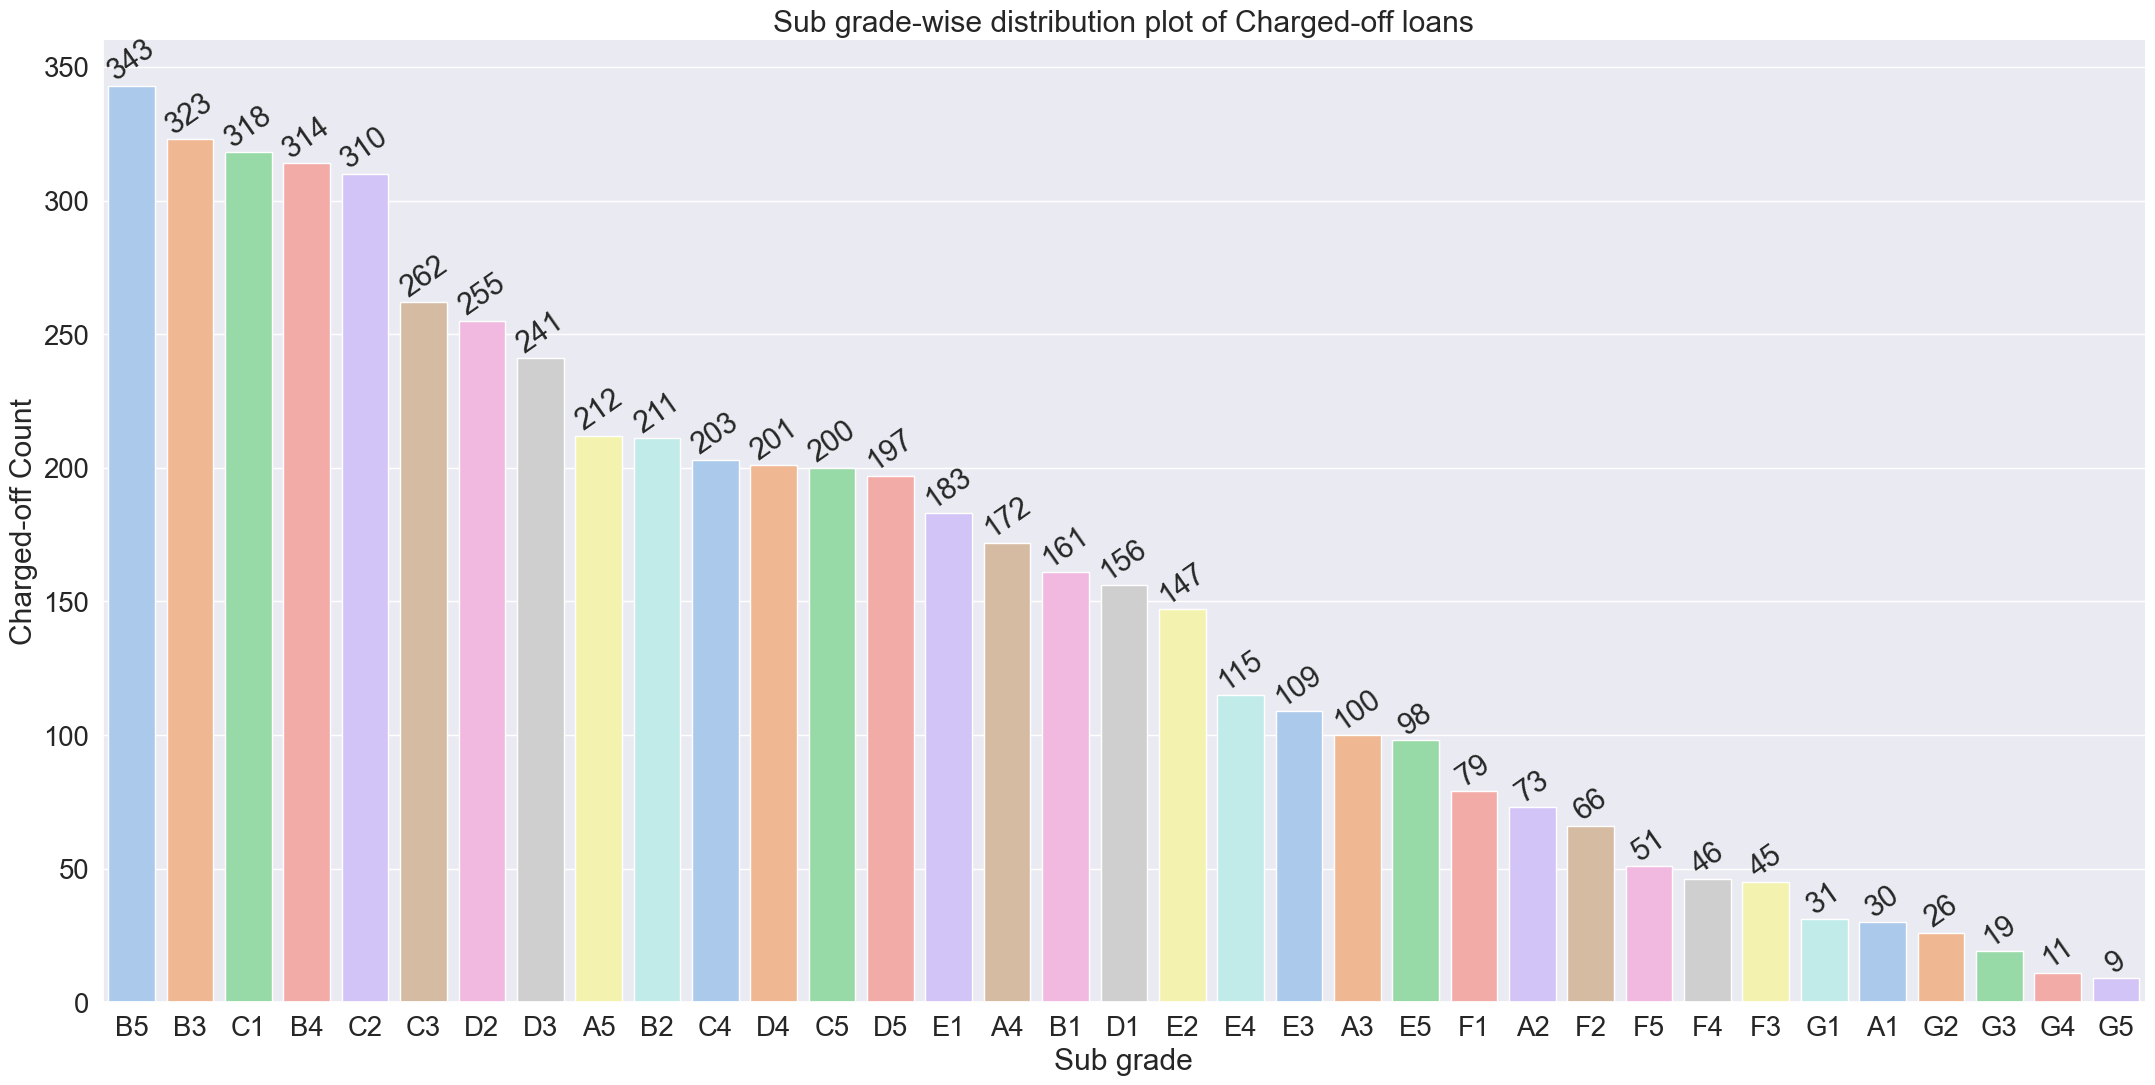

In [282]:
# Creating Seaborn categorical plot for Sub grade-wise distribution plot of Charged-off loans.

catplot=sns.catplot(x='sub_grade',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2,
                   order=df_loan_chargedoff['sub_grade'].value_counts().index)
catplot.set(title='Sub grade-wise distribution plot of Charged-off loans', xlabel='Sub grade', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=35)
plt.show()

* Sub Grade-wise B3,B4 and B5 are the most defaulters under B. Also in C, we have majority of defaulters in C2 & C3. This means with Grade B & C, the lending club needs to focus on the above sub grades carefully before approving loans.

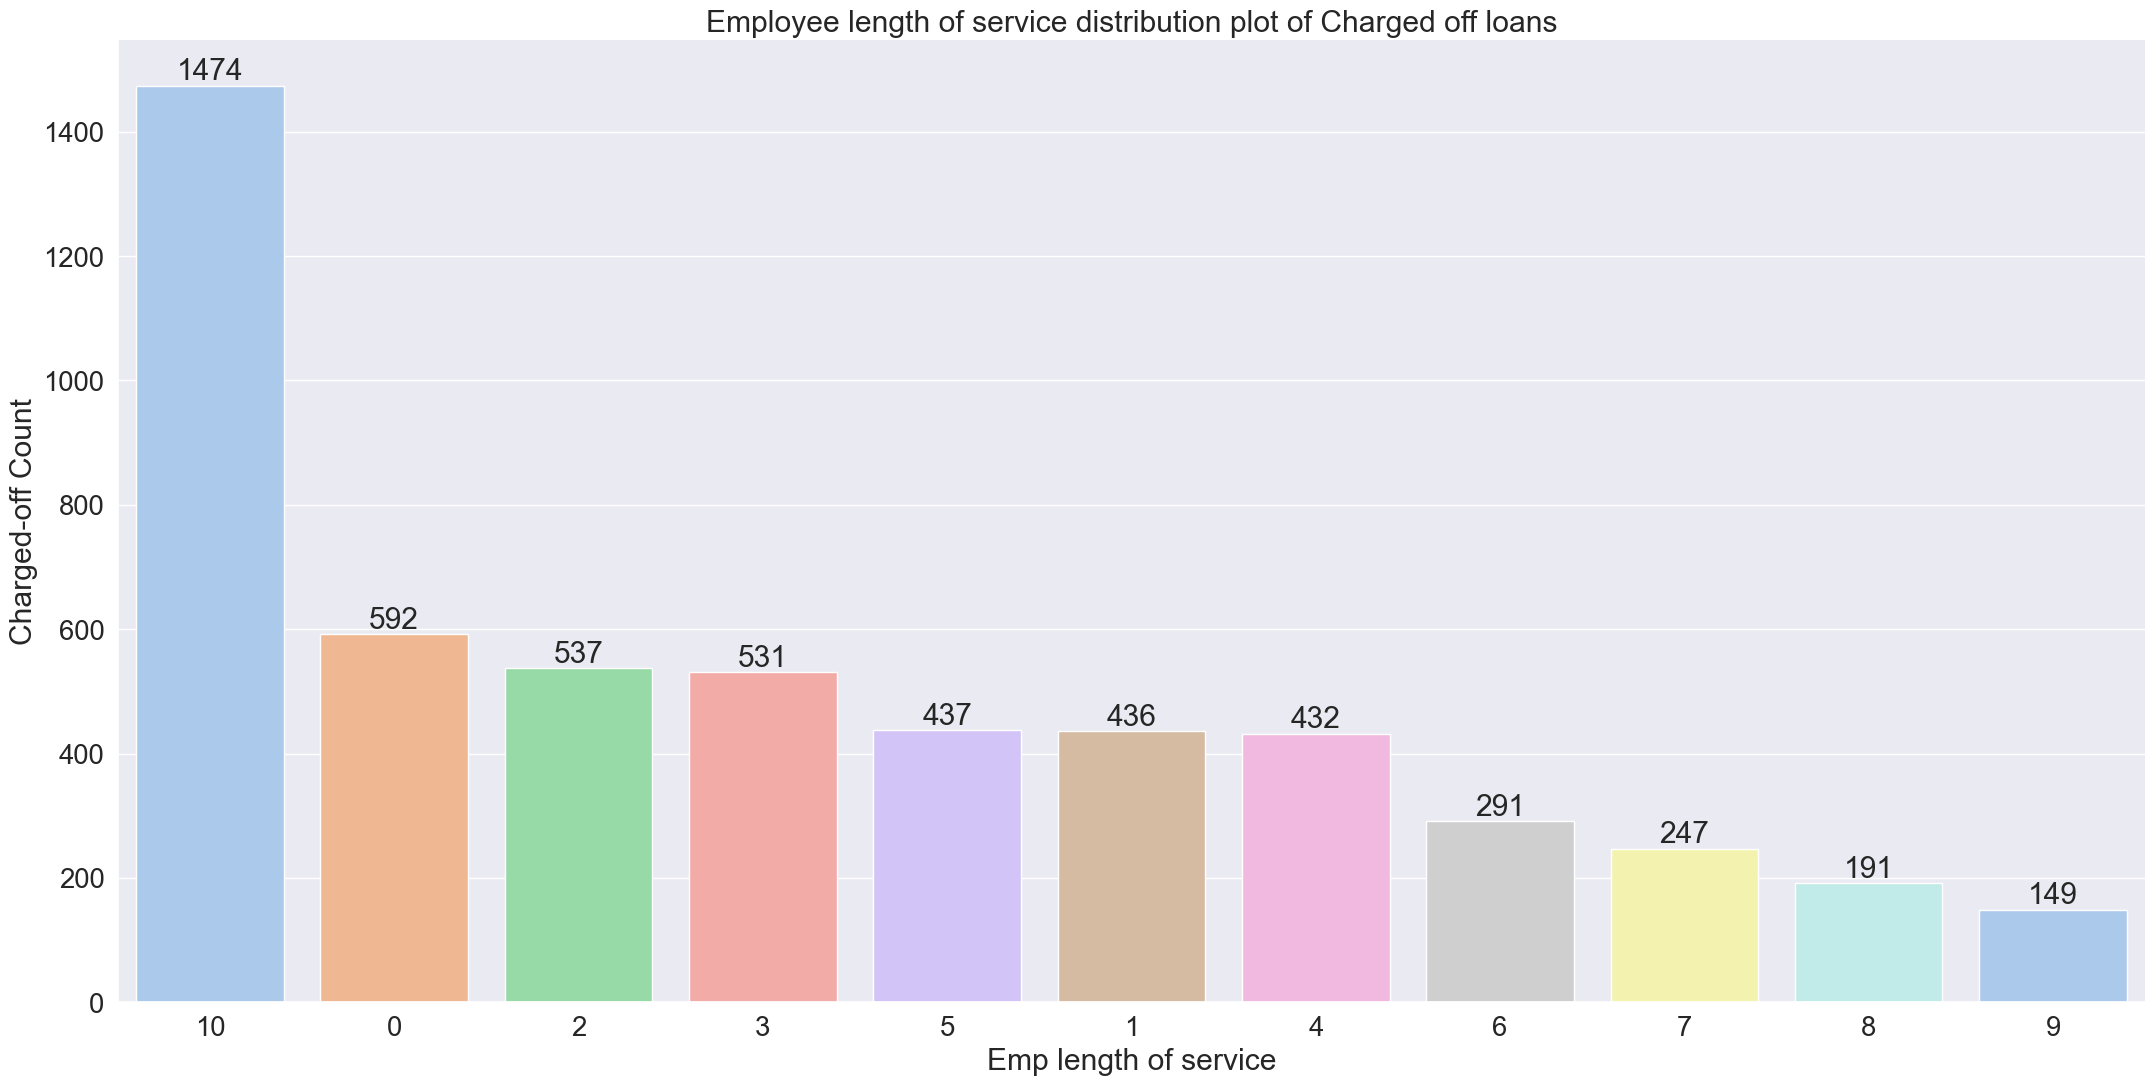

In [283]:
# Creating Seaborn categorical plot for Employee length of service distribution plot of Charged off loans.

catplot=sns.catplot(x='emp_length',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2,
                   order=df_loan_chargedoff['emp_length'].value_counts().index)
catplot.set(title='Employee length of service distribution plot of Charged off loans', xlabel='Emp length of service', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Employees with 10+ years of experiences are the majority defaulters, this figure is 1474 loans, which means the employee experience will not guarantee full payment of loans.

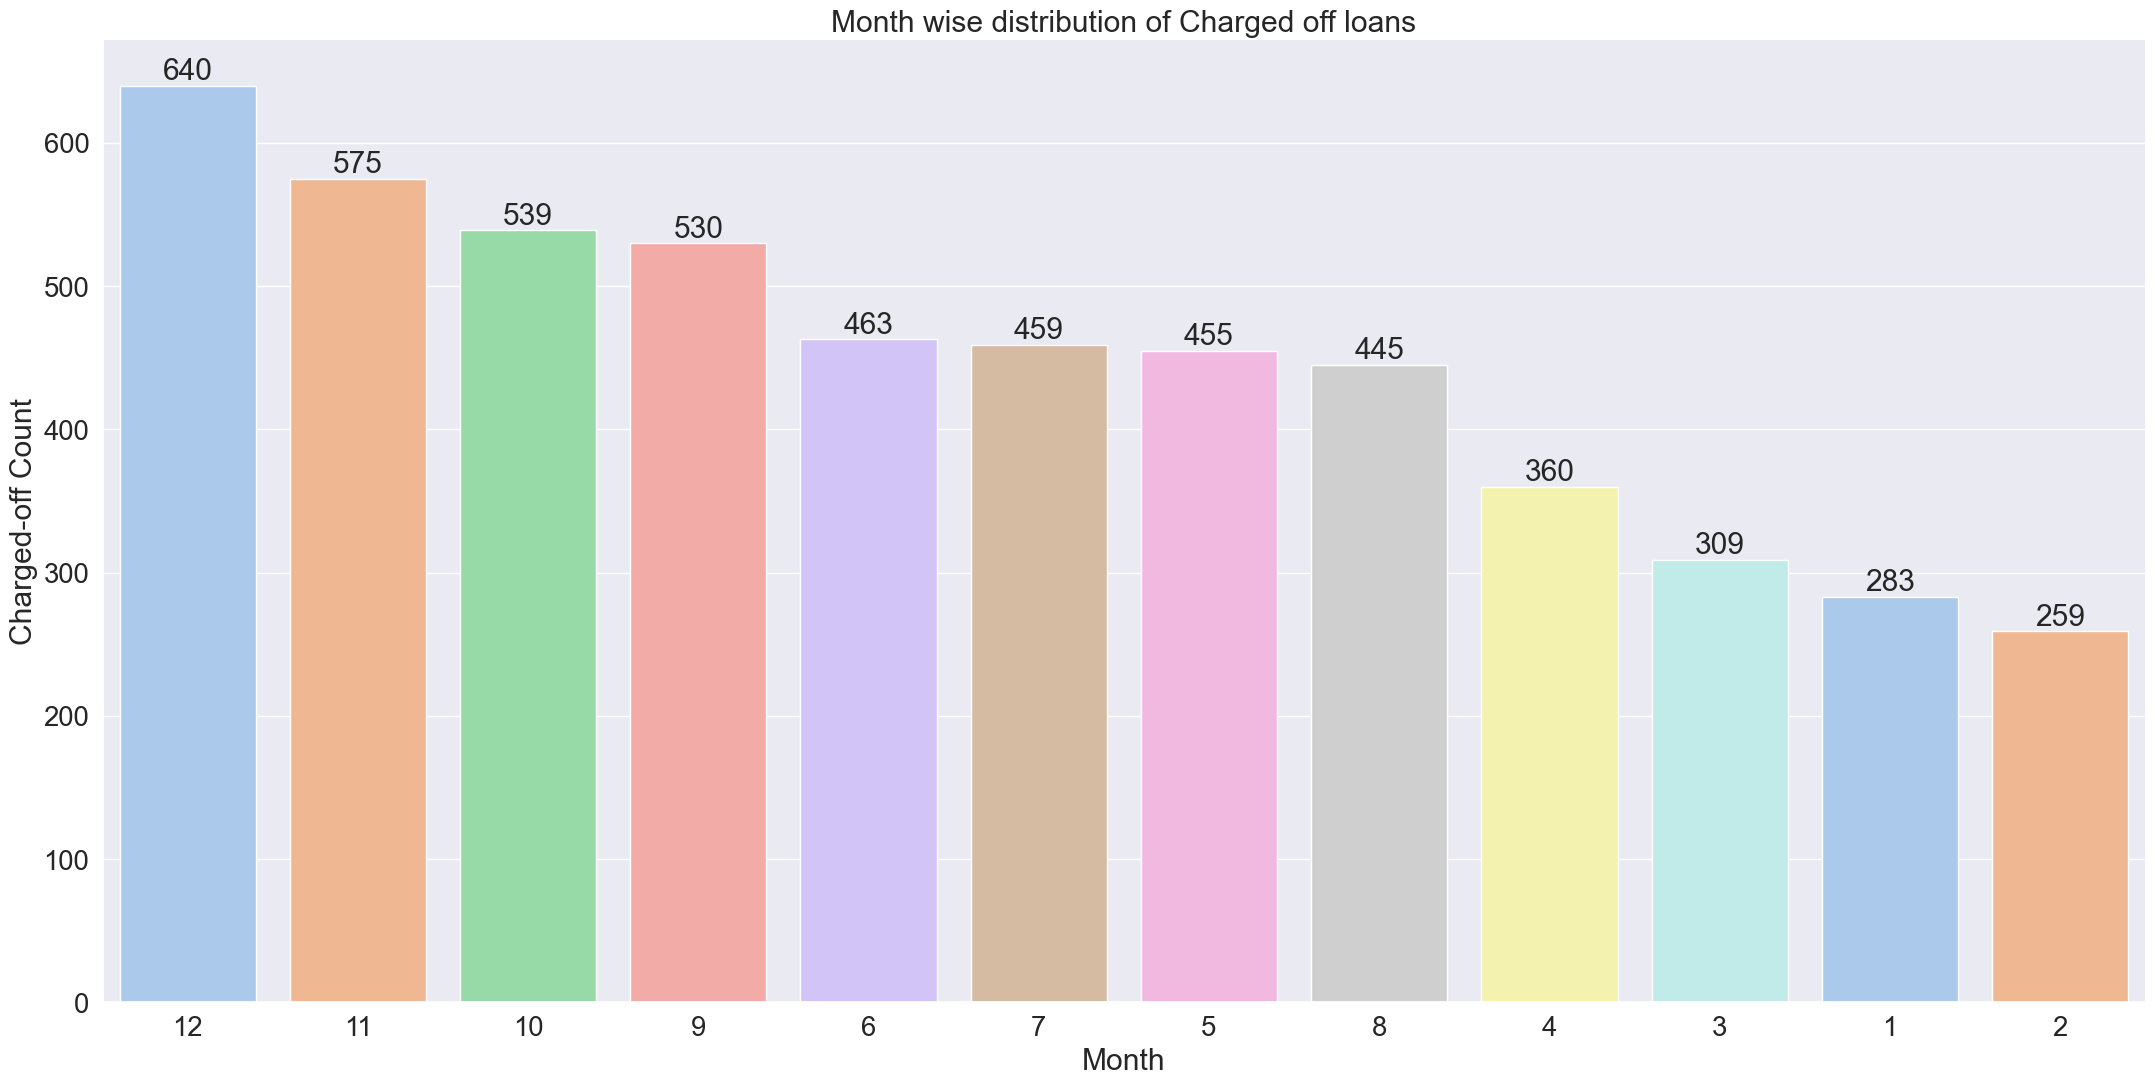

In [284]:
# Creating Seaborn categorical plot for Month wise distribution of Charged off loans
catplot=sns.catplot(x='mnth_issued',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2,
                   order=df_loan_chargedoff['mnth_issued'].value_counts().index)
catplot.set(title='Month wise distribution of Charged off loans', xlabel='Month', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* December is most of the month wherein maximum loans gets defaulted. Total of 640 loans got defaulted. This may be due to holiday season. Lending club should do proactive follow-ups during the previous month.


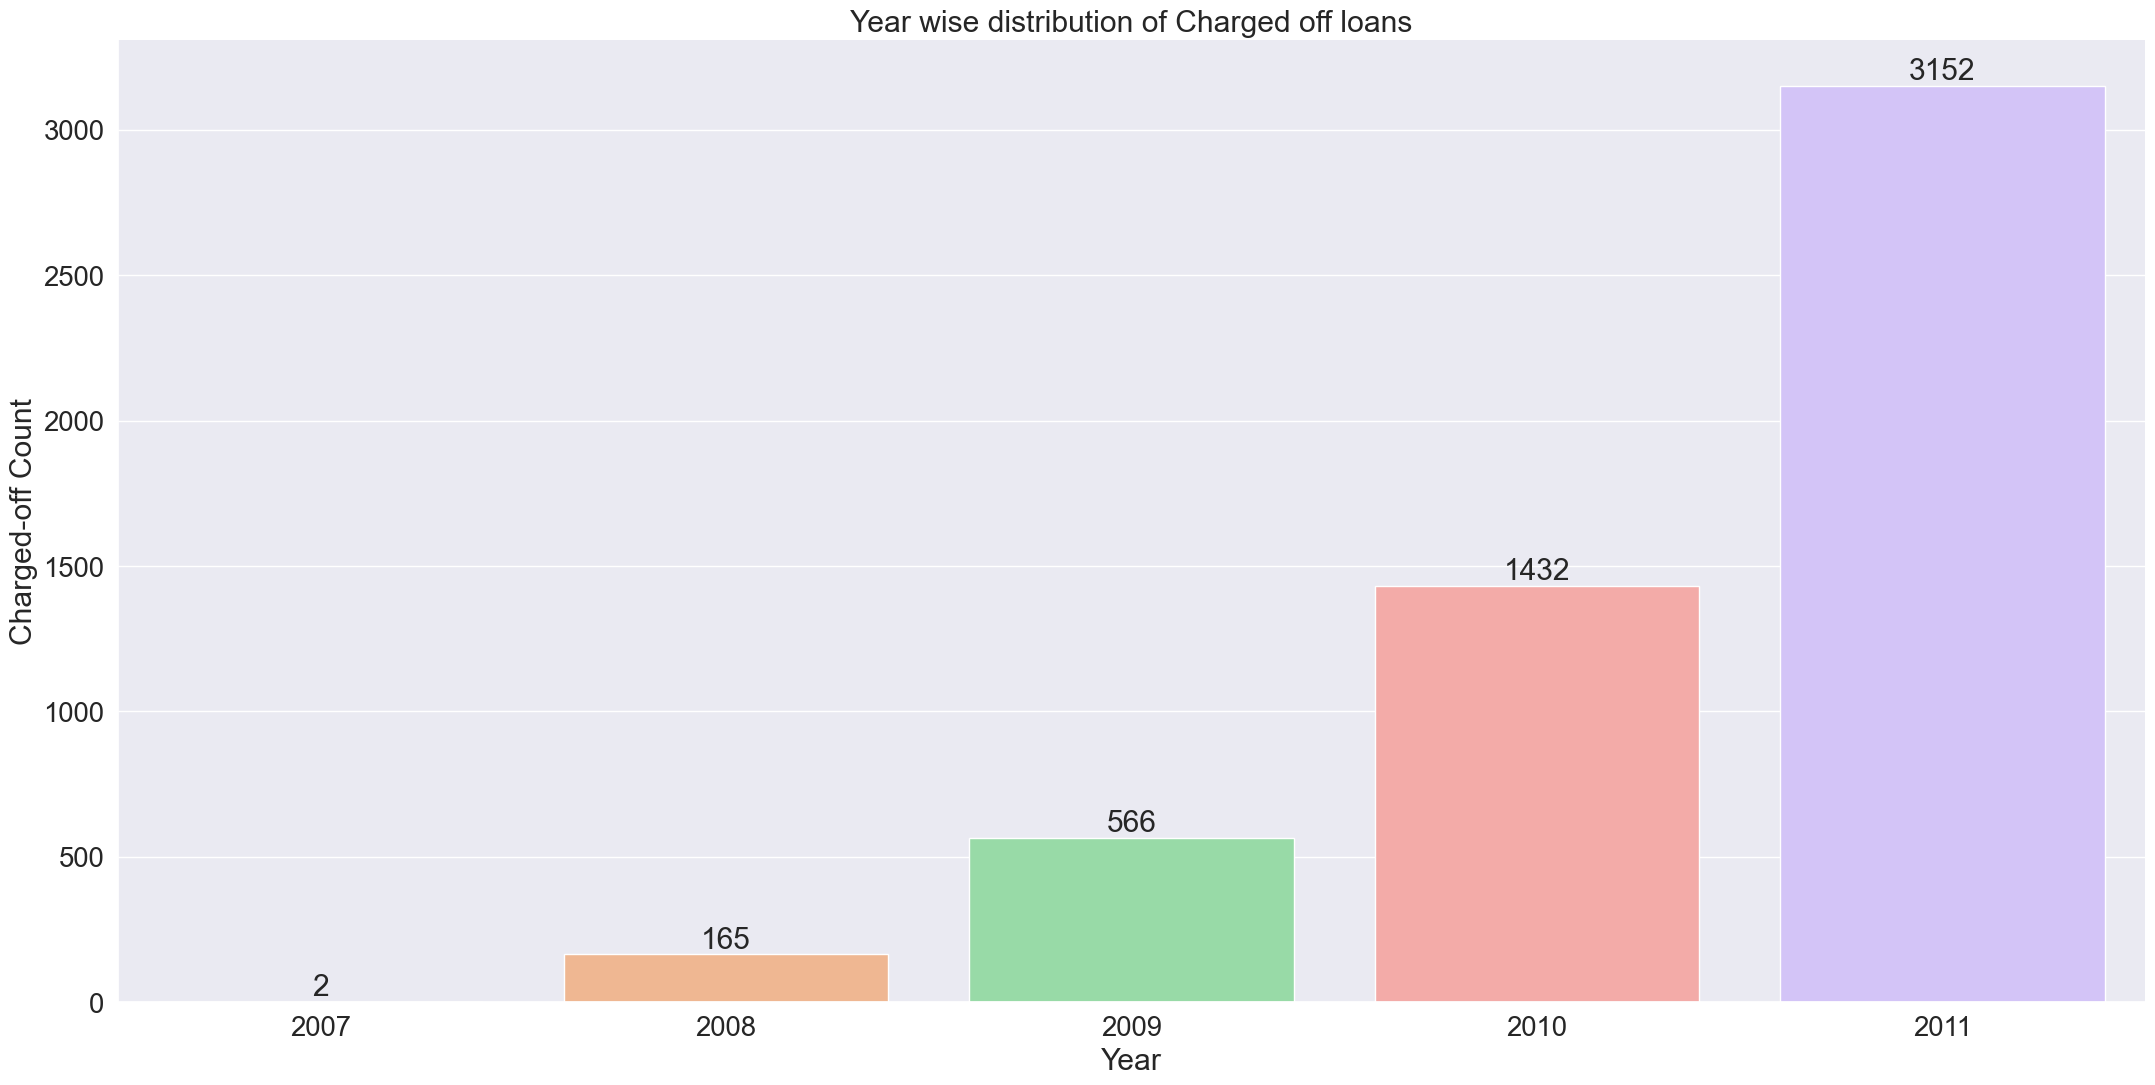

In [285]:
# Creating Seaborn categorical plot for Year wise distribution of Charged off loans
catplot=sns.catplot(x='yr_issued',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0)
catplot.set(title='Year wise distribution of Charged off loans', xlabel='Year', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Year 2011 reported 3152 loans got defaulted. This is more than 50% of 2010.The same trend is continued from 2007 to 2010. The trend shows there is likely to be more defaulters in upcoming years.

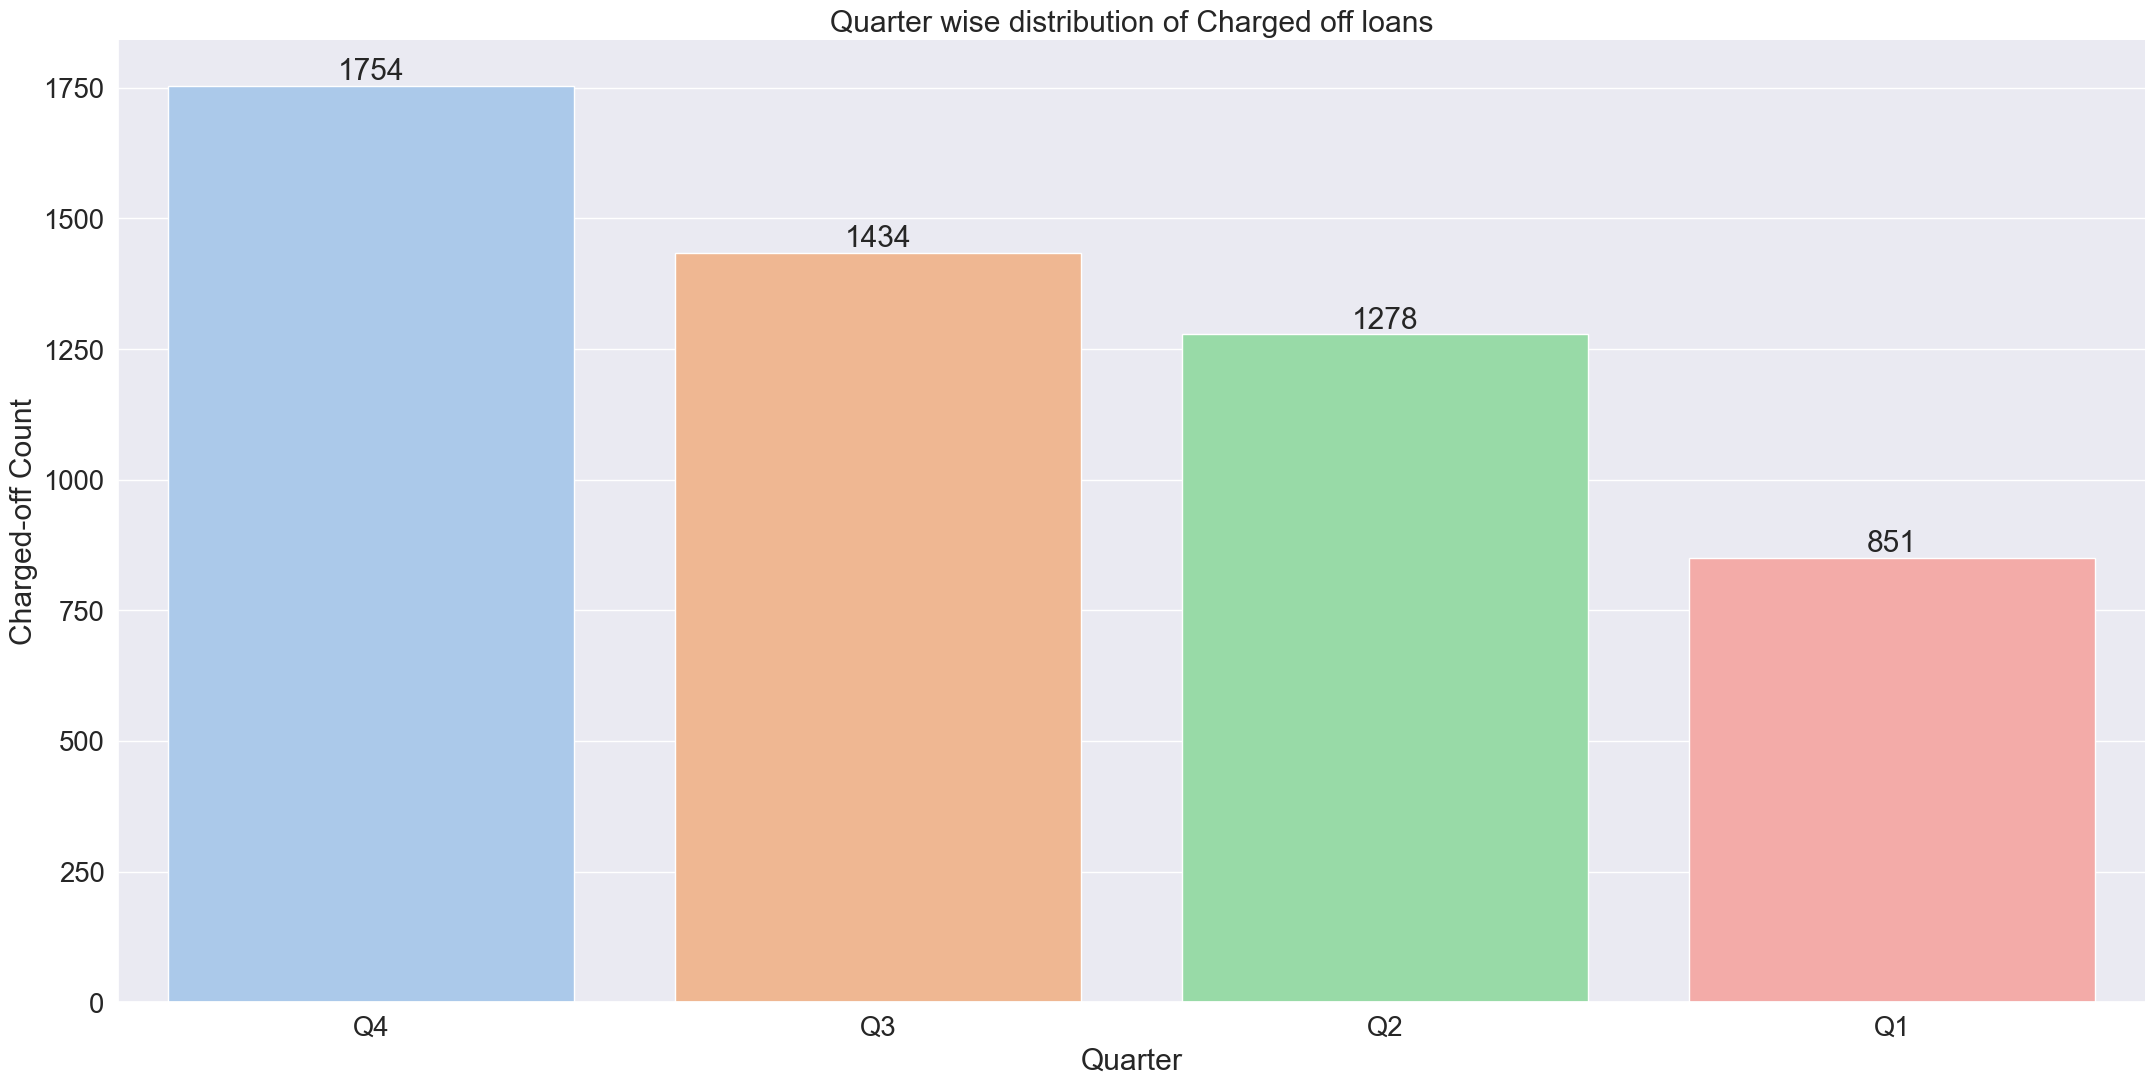

In [286]:
# Creating Seaborn categorical plot for Quarter wise distribution of Charged off loans
catplot=sns.catplot(x='quarter',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0)
catplot.set(title='Quarter wise distribution of Charged off loans', xlabel='Quarter', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Loans are getting defaulted in the last quarter (Q4). Reported that 1754 loans gets defaulted. This may have occured due to holiday season.

#### Observations and Inferences from Ordered categorical Variables analysis
* Loans with a 36-month term are most likely to default. 3006 Loans under 36 months got defaulted. This indicates that individuals default on short-term loans.
* Grade B had the highest number of Charged off loan applicants, with a total of 1,352 applicants. The next is C with 1293 loan applicants. This indicates the lending club should pay attention for providing loan to B & C Grade applicants.
* Sub Grade-wise B3,B4 and B5 are the most defaulters under B. Also in C, we have majority of defaulters in C2 & C3. This means with Grade B & C, the lending club needs to focus on the above sub grades carefully before approving loans.
* Employees with 10+ years of experiences are the majority defaulters, this figure is 1474 loans, which means the employee experience will not guarantee full payment of loans.
* December is most of the month wherein maximum loans gets defaulted. Total of 640 loans got defaulted. This may be due to holiday season. Lending club should do proactive follow-ups during the previous month.
* Year 2011 reported 3152 loans got defaulted. This is more than 50% of 2010.The same trend is continued from 2007 to 2010. The trend shows there is likely to be more defaulters in upcoming years.
* Loans are getting defaulted in the last quarter (Q4). Reported that 1754 loans gets defaulted. This may have occured due to holiday season.


### 6.2 Un-Ordered categorical data
1. Home Ownership - Whether the home is Rented / own house / under mortgage
2. Loan status - whether loan is fully paid / Charged off
3. Verification status - whether loan is Verified / Not verified
4. purpose - Reason for taking loan
5. State - The state to which loan applicant belongs.


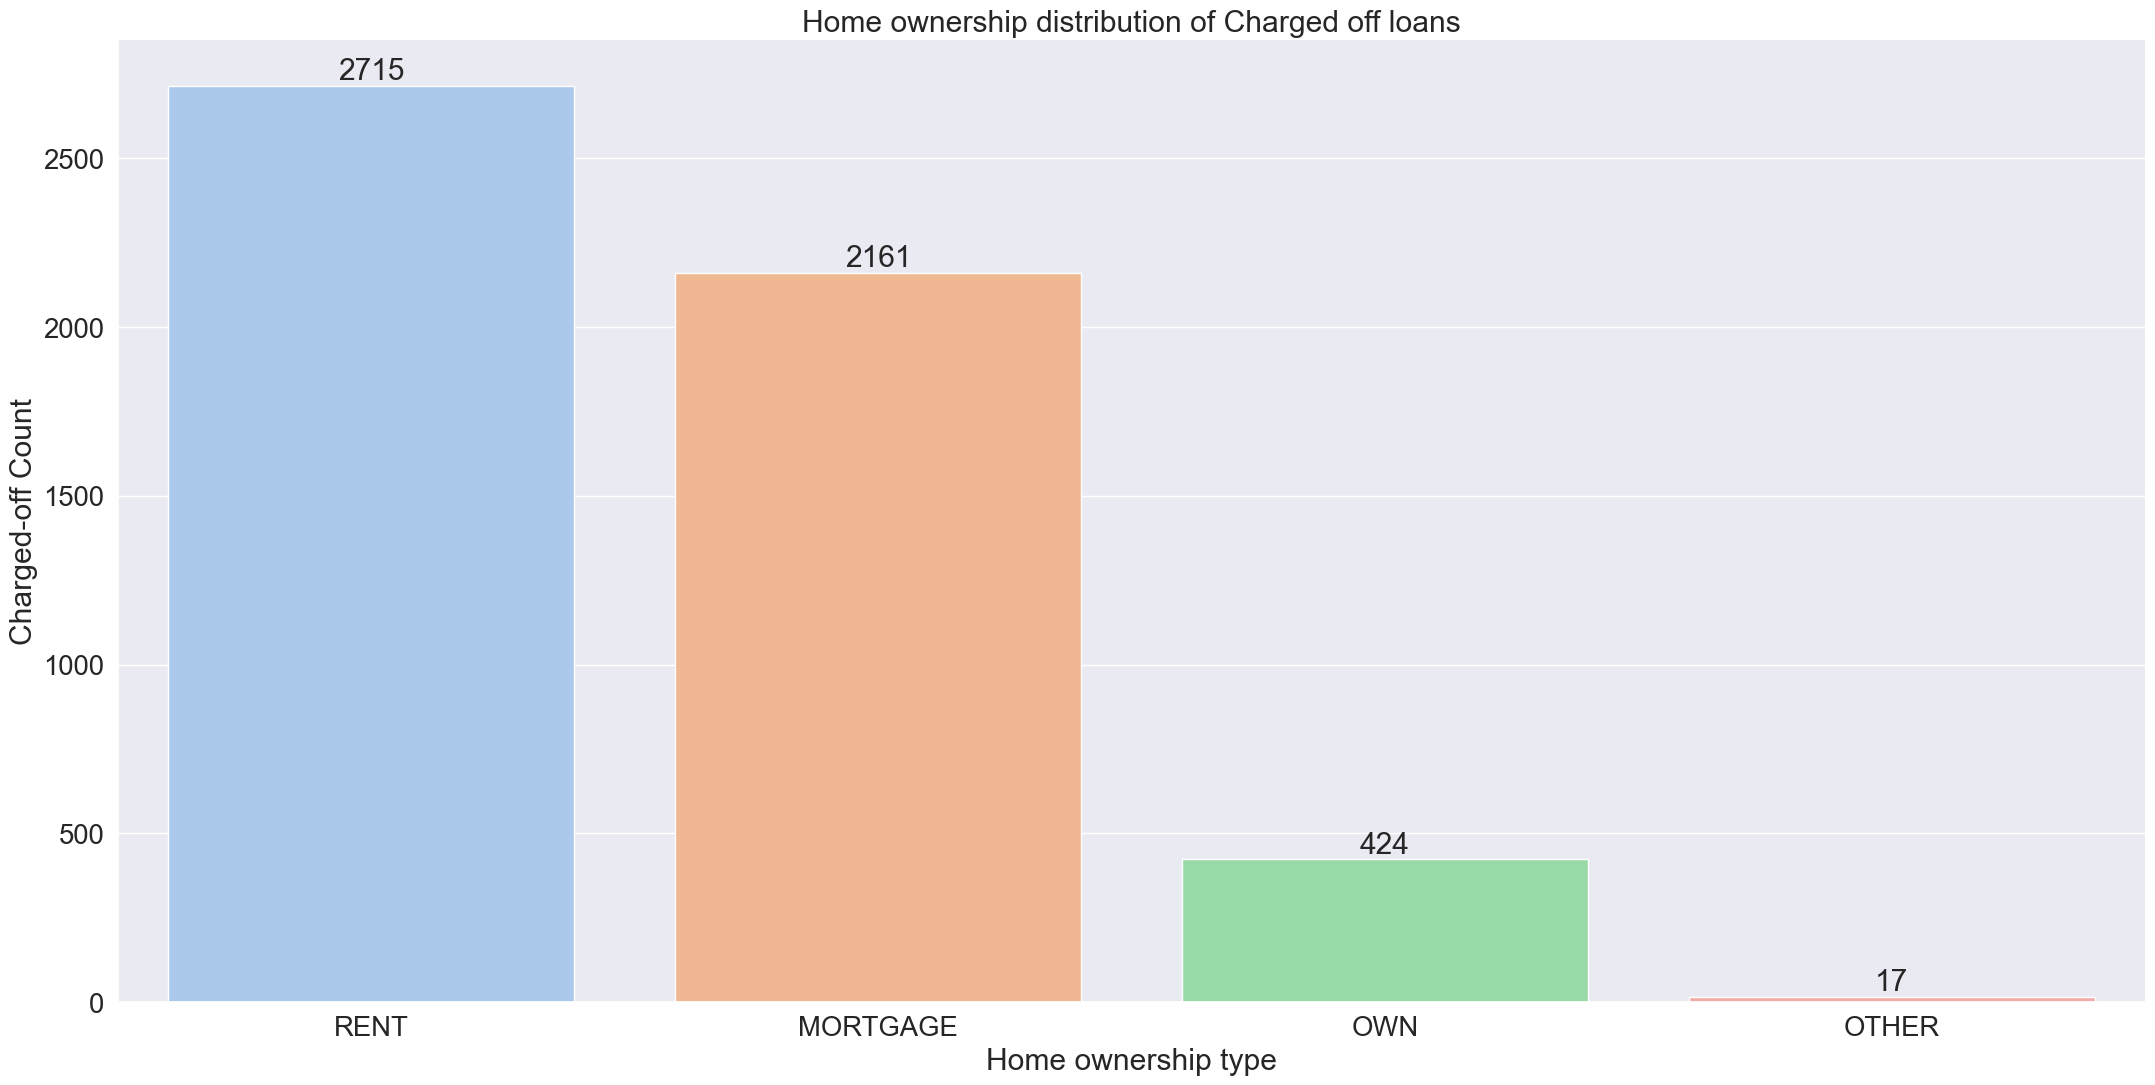

In [287]:
# Creating Seaborn categorical plot for Home ownership distribution of Charged off loans
catplot=sns.catplot(x='home_ownership',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                   order =df_loan_chargedoff['home_ownership'].value_counts().index)
catplot.set(title='Home ownership distribution of Charged off loans', xlabel='Home ownership type', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Rented accommodation has the highest defaulters, which is 2715 loans. Lending club should take necessary caution on approving loans for those who are living in rented house as this can likely get defaulted.

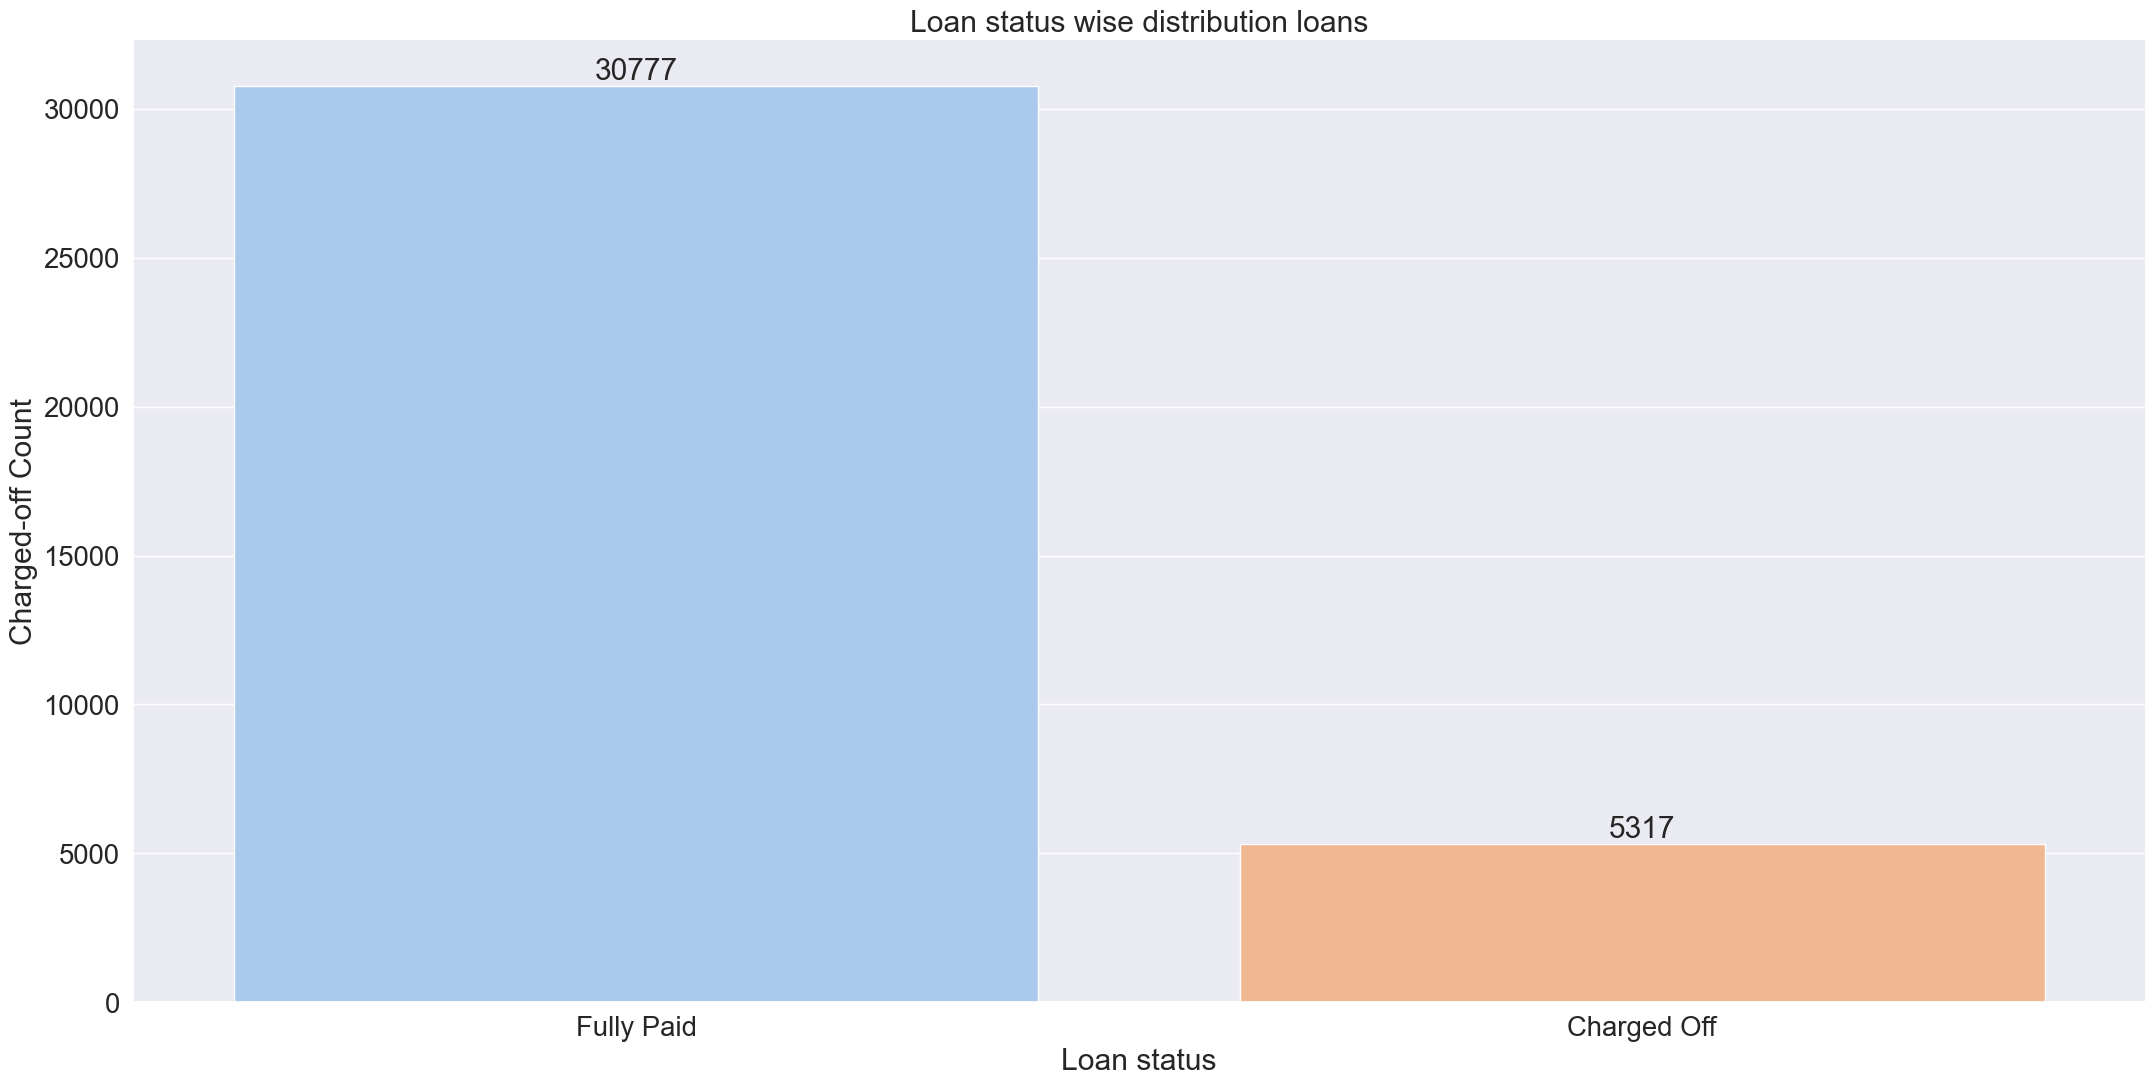

In [288]:
# Creating Seaborn categorical plot for Loan status wise distribution of loans
catplot=sns.catplot(x='loan_status',data=df_loan ,kind='count',palette='pastel',height=11, aspect=2.0)
catplot.set(title='Loan status wise distribution loans', xlabel='Loan status', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Comparatively majority of the loans are fully paid, which gives a positive indication about the process in place for lending club.

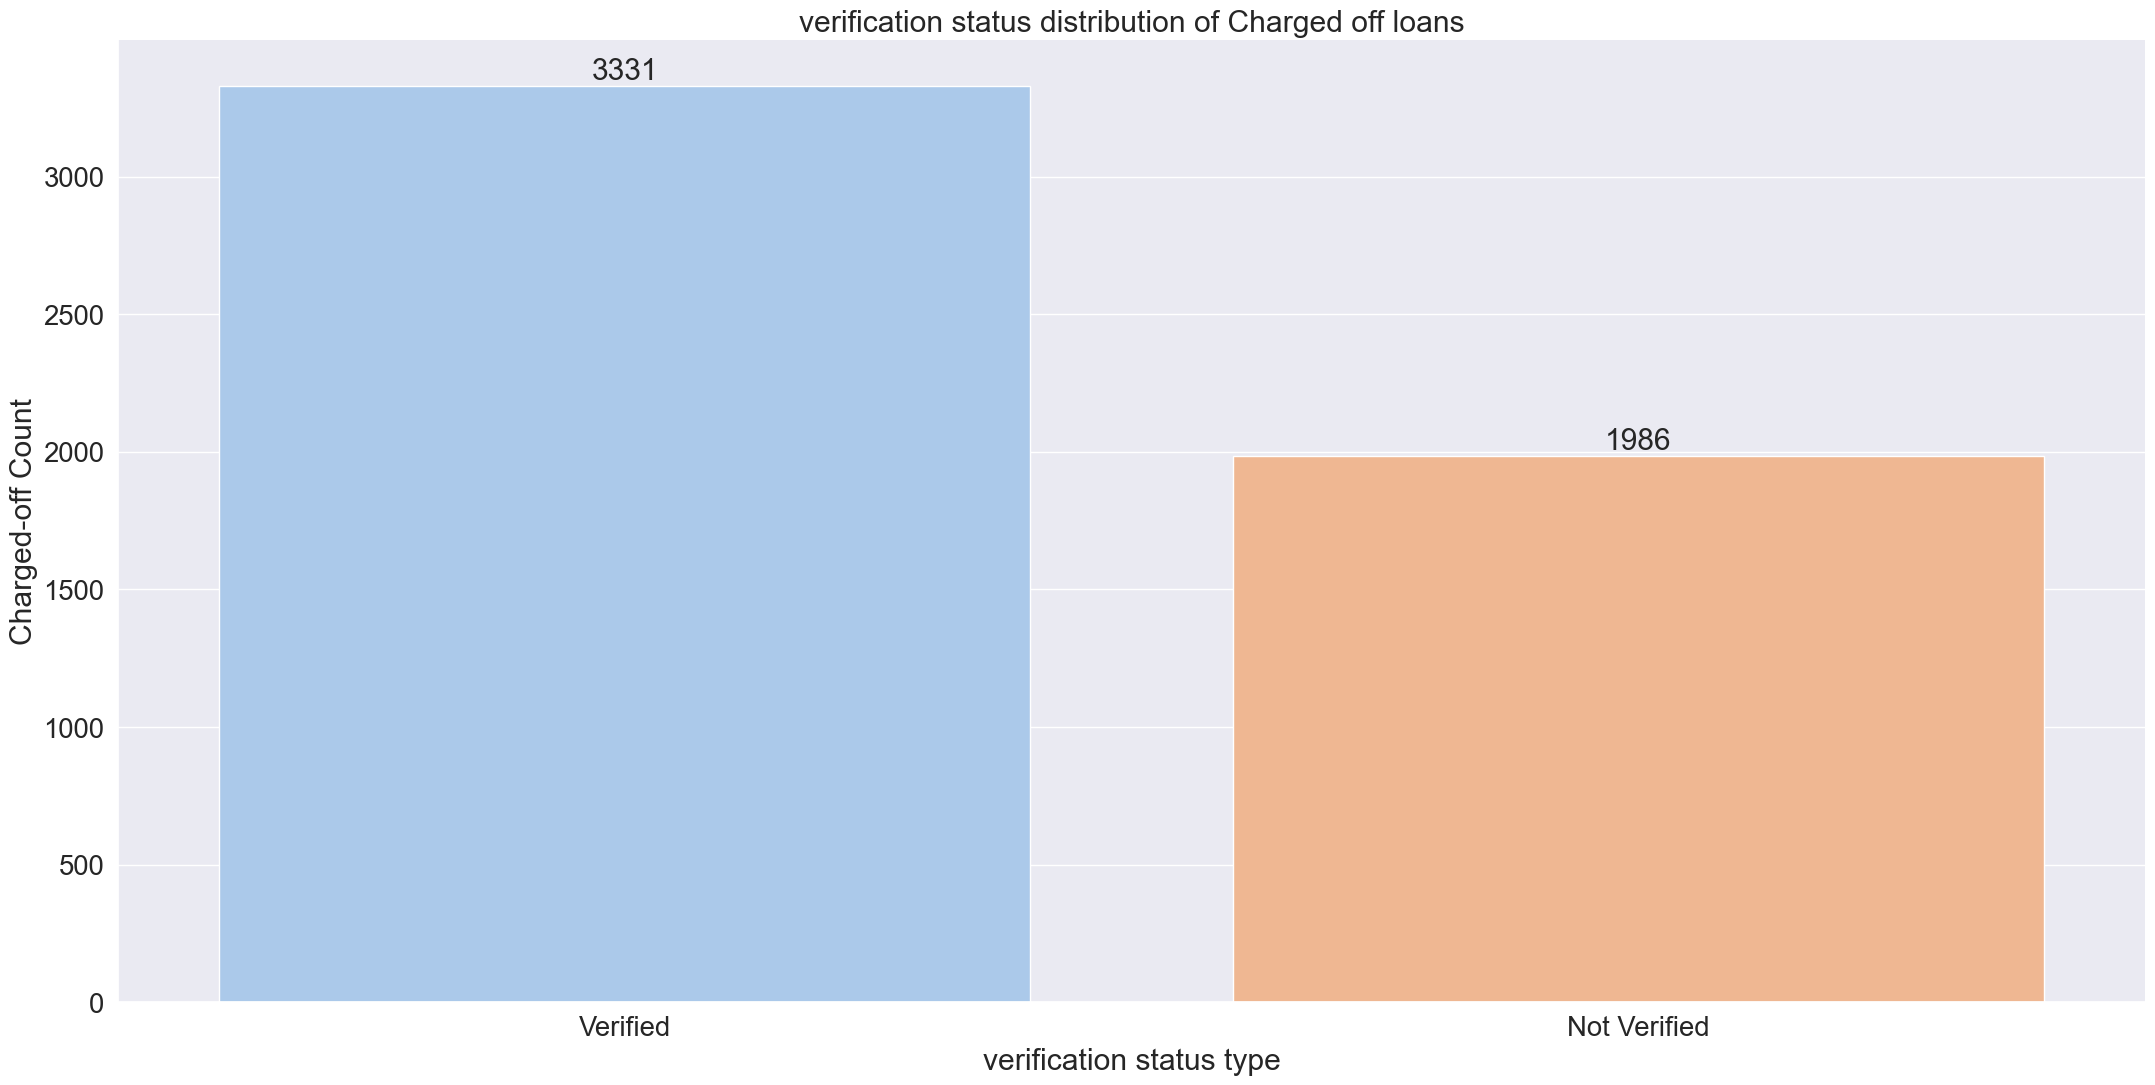

In [289]:
# Creating Seaborn categorical plot for verification status distribution of Charged off loans'
catplot=sns.catplot(x='verification_status',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0)
catplot.set(title='verification status distribution of Charged off loans', xlabel='verification status type', ylabel='Charged-off Count')
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* 3331 Loans are defaulted which is also verified. This indicates lending club needs to revisit verification process and identify and fix gaps wherever required.

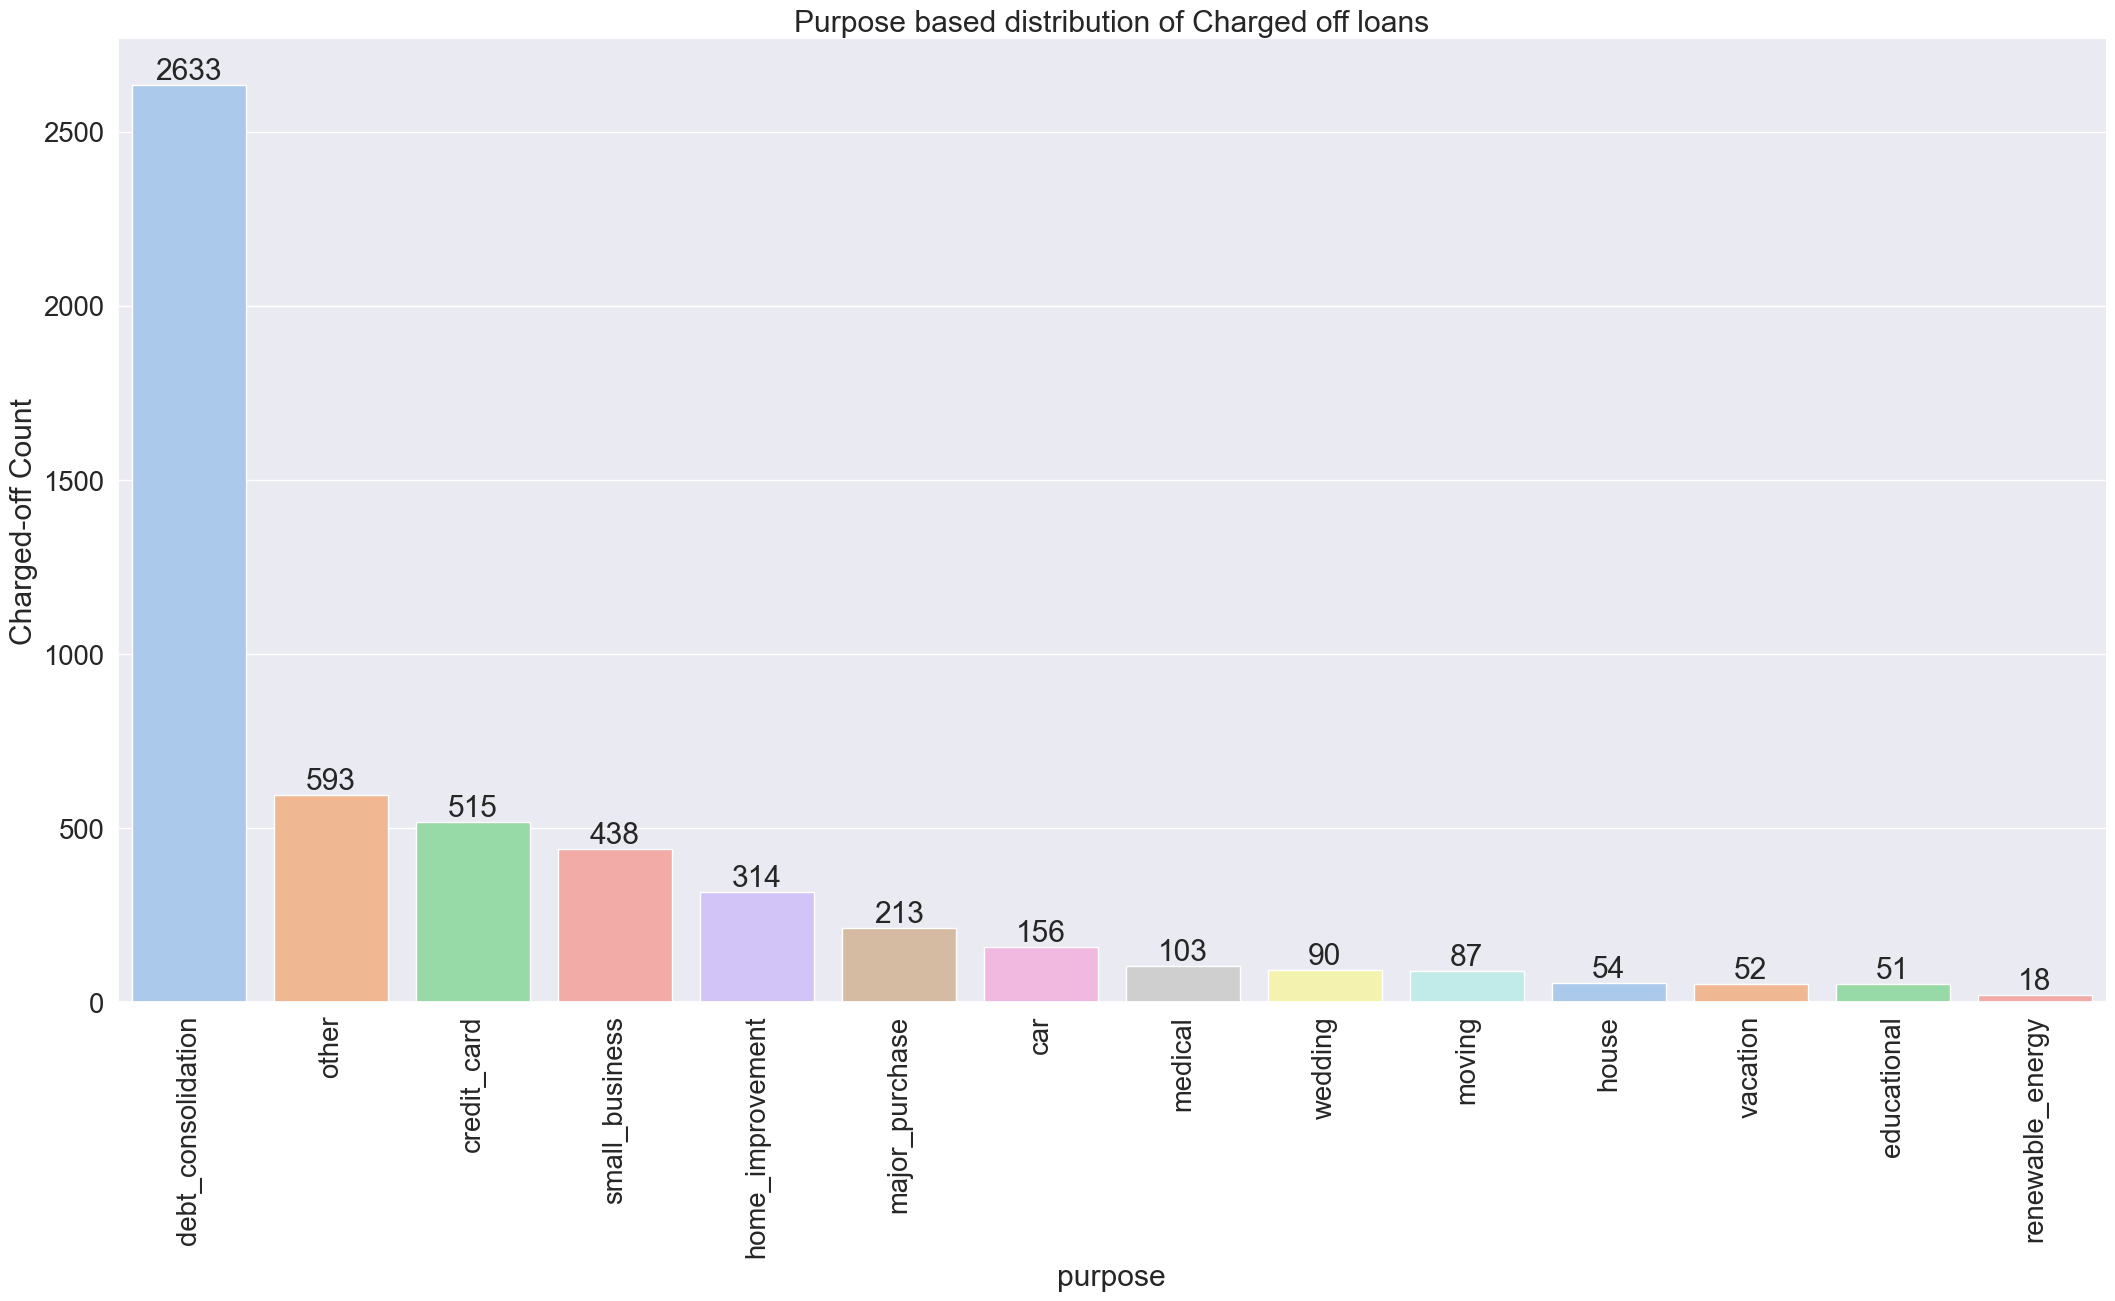

In [290]:
# Creating Seaborn categorical plot for Purpose based distribution of Charged off loans
catplot=sns.catplot(x='purpose',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0 , 
                    order =df_loan_chargedoff['purpose'].value_counts().index)
catplot.set(title='Purpose based distribution of Charged off loans', xlabel='purpose', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=90)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Majority of loan got defaulted due to Debt consolidation. 2633 loans got defaulted. This indicates that when the loan is granted for this purpose the lending club has to ensure that the applicant has the capability to pay the loan as well.

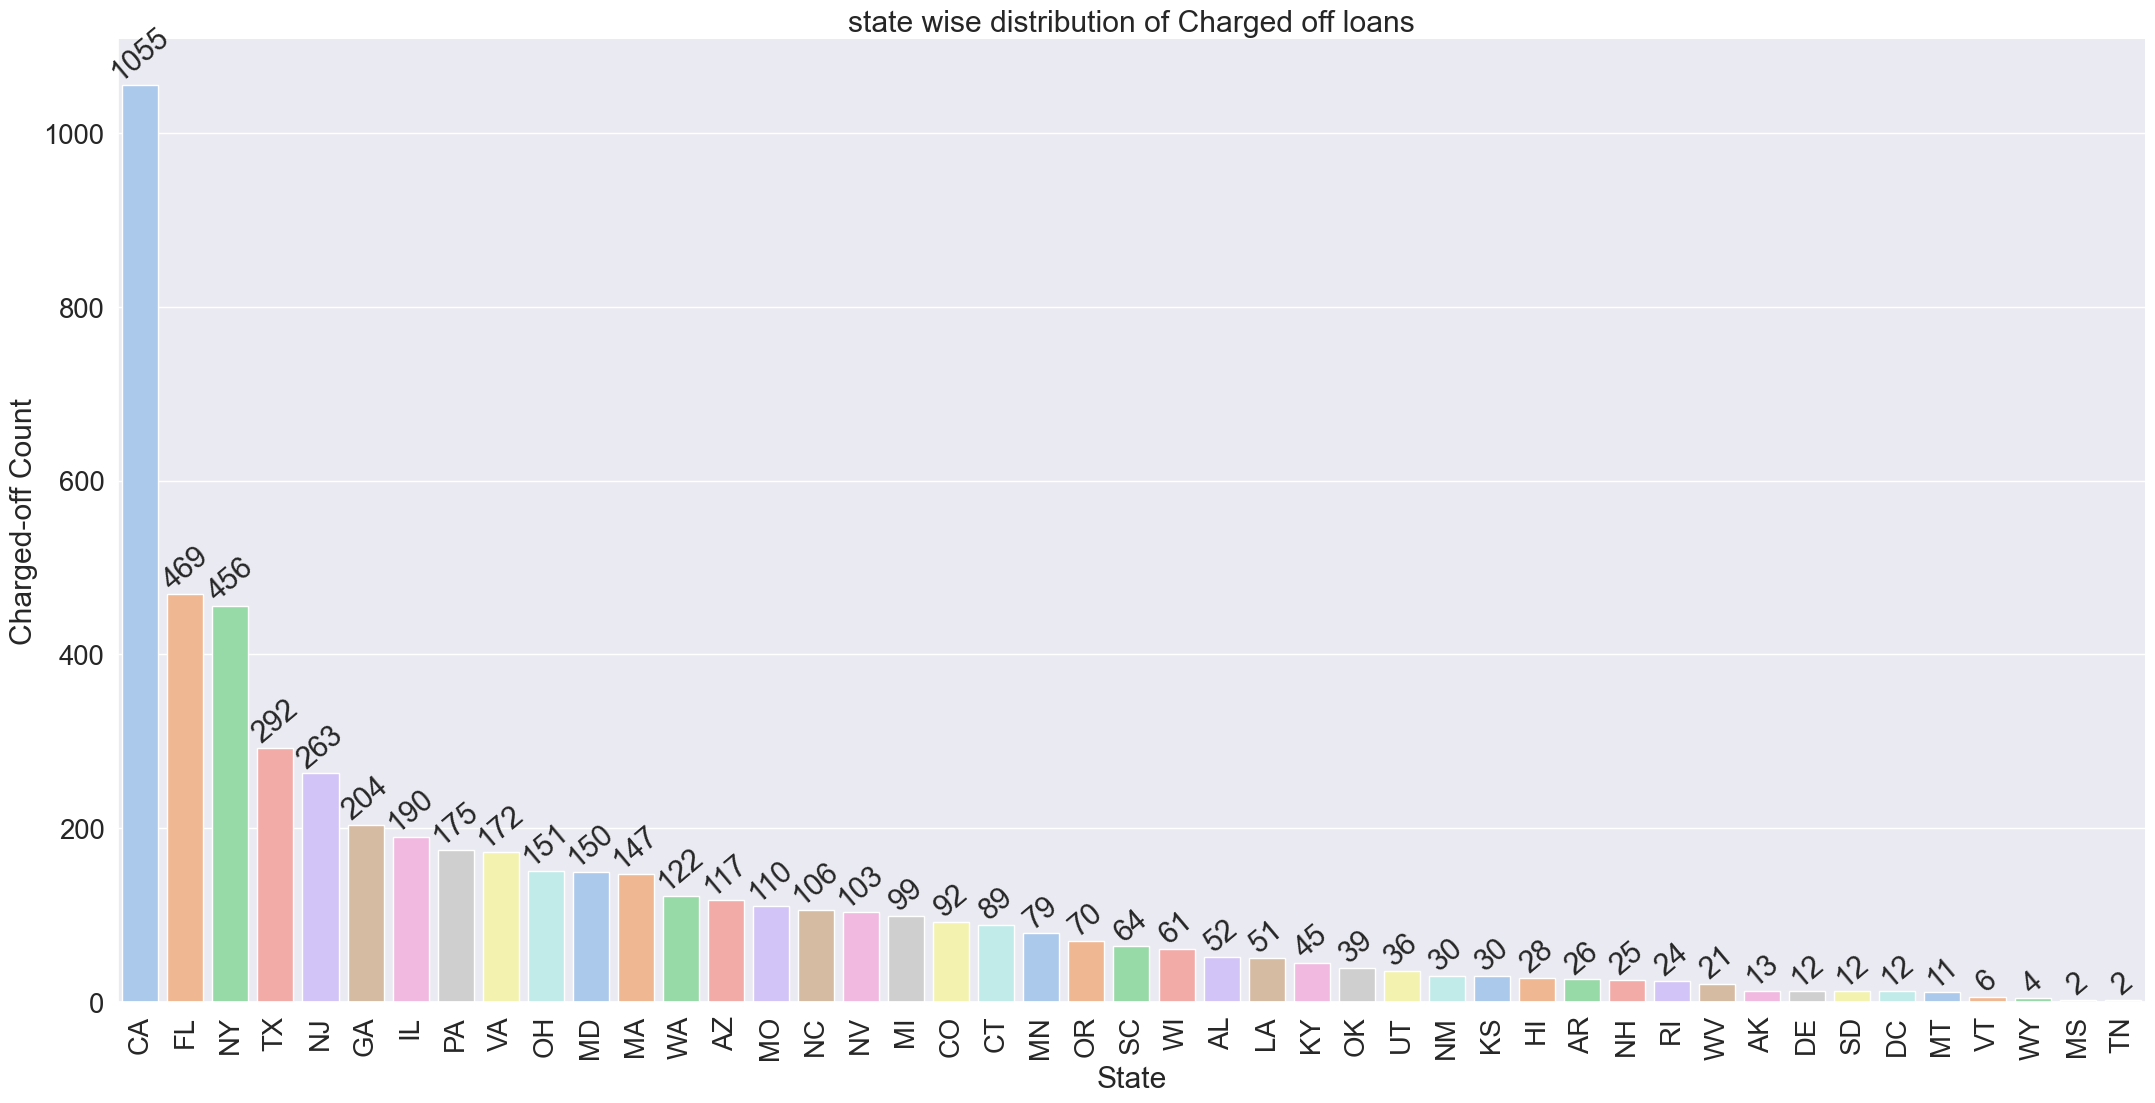

In [291]:
catplot=sns.catplot(x='addr_state',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                    order =df_loan_chargedoff['addr_state'].value_counts().index)
catplot.set(title='state wise distribution of Charged off loans', xlabel='State', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=90)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=40)
plt.show()

* The state of CA contributes to the majority of defaulters. Lending club should be more cautious when we approve loan in this State.

#### Observations and Inferences from Un-Ordered categorical Variables analysis
* Rented accommodation has the highest defaulters, which is 2715 loans. Lending club should take necessary caution on approving loans for those who are living in rented house as this can likely get defaulted.
* Comparatively majority of the loans are fully paid, which gives a positive indication about the process in place for lending club.
* 3331 Loans are defaulted which is also verified. This indicates lending club needs to revisit verification process and identify and fix gaps wherever required.
* Majority of loan got defaulted due to Debt consolidation. 2633 loans got defaulted. This indicates that when the loan is granted for this purpose the lending club has to ensure that the applicant has the capability to pay the loan as well.
* The state of CA contributes to the majority of defaulters. Lending club should be more cautious when we approve loan in this State.

### 6.3 Quantitative variables
1. installment - Loan installment
2. Loanamt_bucket - Loan amount in multiple bins
3. funded_amnt_bucket - Funded amount in multiple bins
4. annual_inc_bucket - Annual income in multiple bins
5. int_rate_bucket - Rate of interest in multiple bins
6. dti_bucket - Debt to income in multiple bins
   

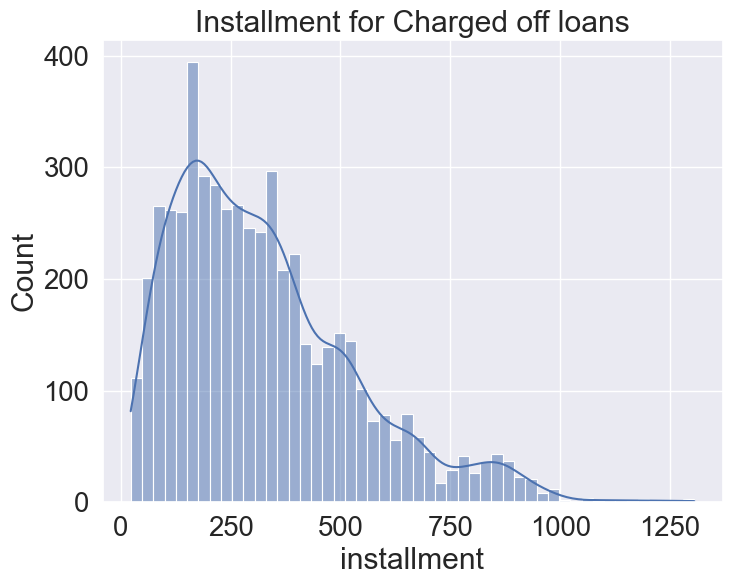

In [292]:
# Plotting installments
plt.figure(figsize=(8,6))
sns.histplot(df_loan_chargedoff,x='installment',bins=50,kde=True)
plt.title('Installment for Charged off loans')
plt.show()

* Majority of loan installment for defaulters lies between 160-400. This gives an indication for Lending company to monitor closely on these applicants with similar installments

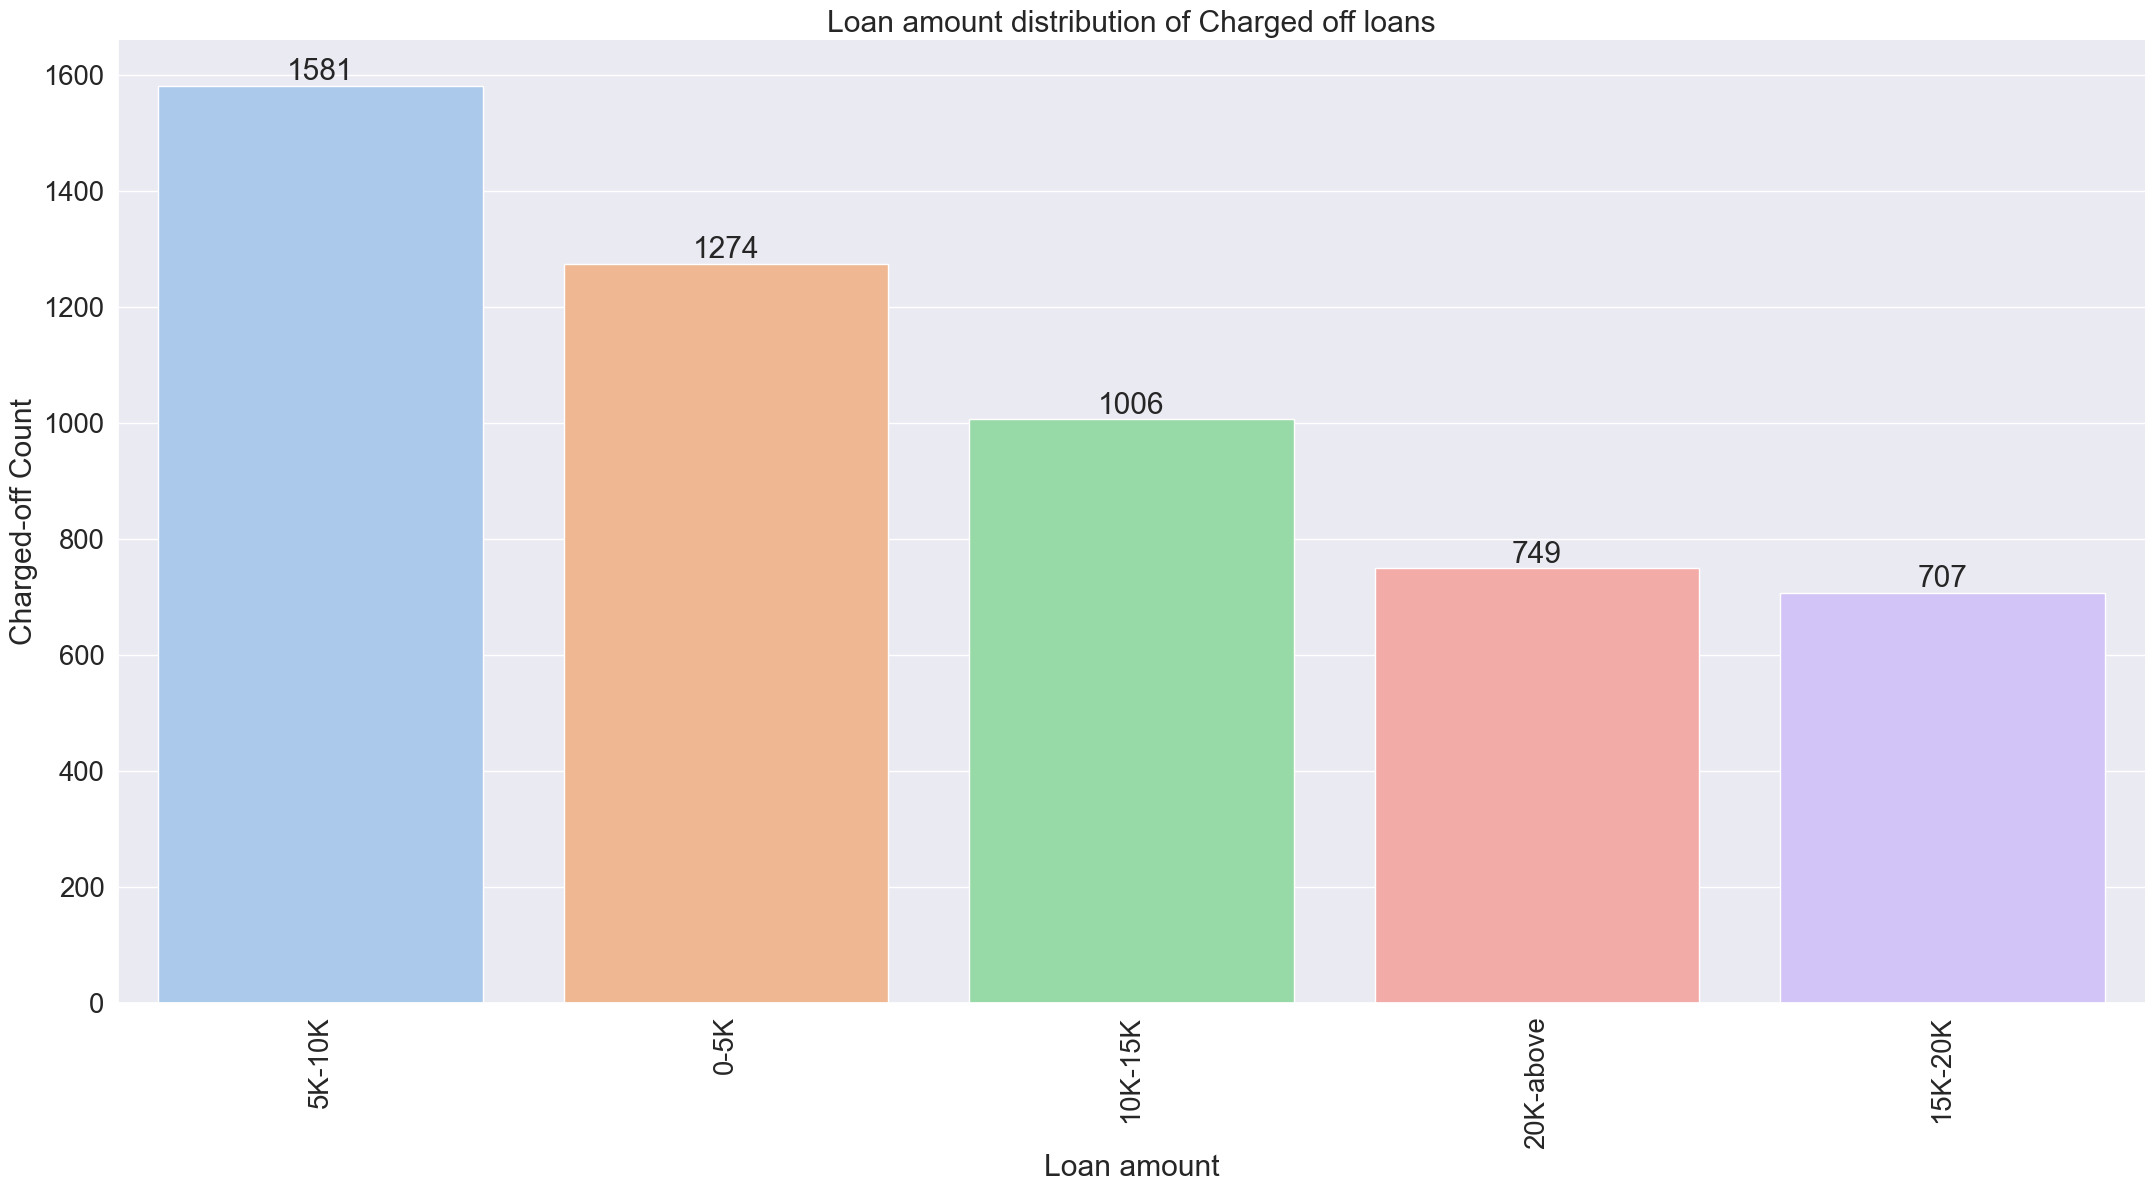

In [293]:
# Plotting Loan amount from the derived column Loanamt_bucket of defaulters
catplot=sns.catplot(x='Loanamt_bucket',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                    order =df_loan_chargedoff['Loanamt_bucket'].value_counts().index)
catplot.set(title='Loan amount distribution of Charged off loans', xlabel='Loan amount', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=90)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Most defaulters are those with loan amount beween 5K to 10K . The lending company should evaluate applicants who apply for bigger amount. Should verify repayment capability as well.


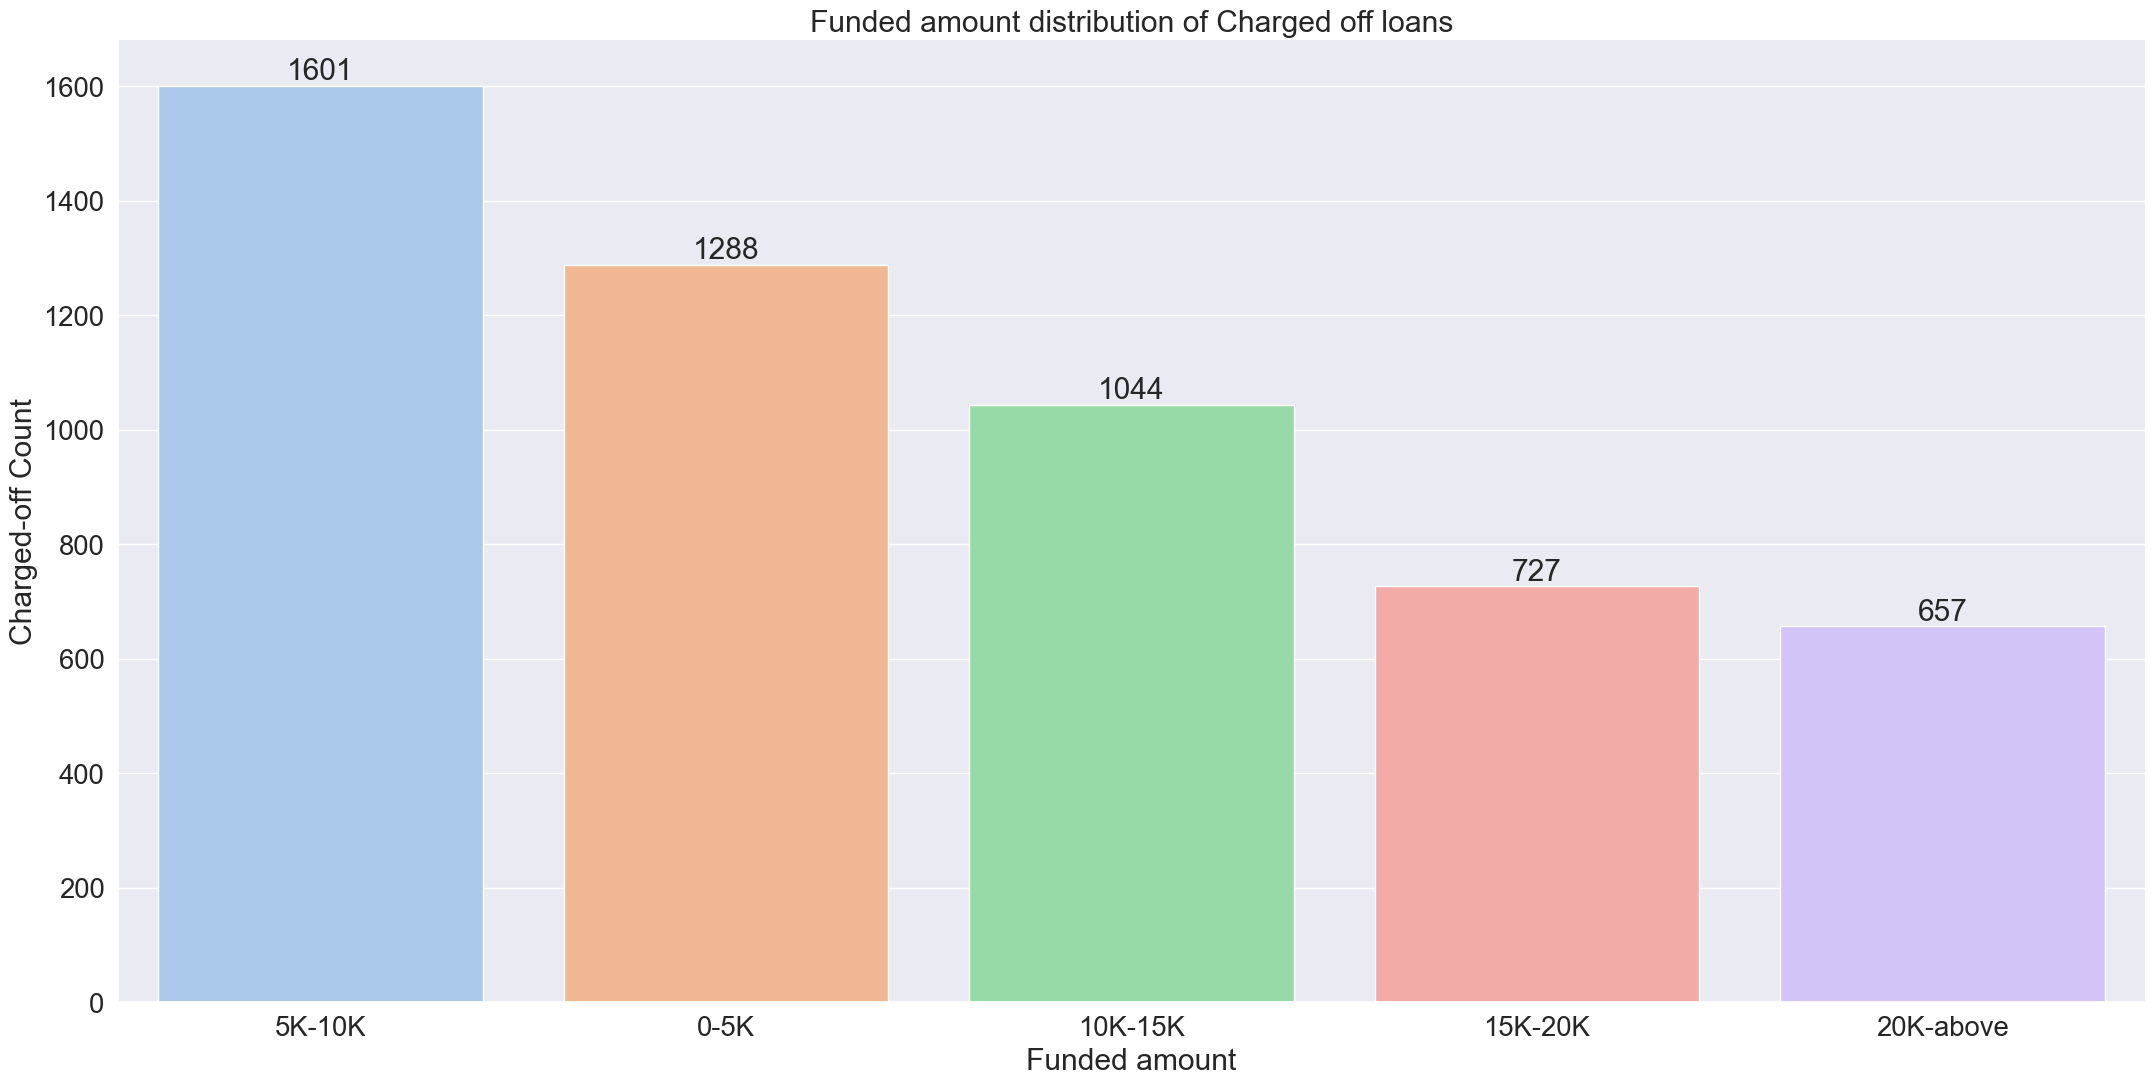

In [294]:
catplot=sns.catplot(x='funded_amnt_bucket',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                    order =df_loan_chargedoff['funded_amnt_bucket'].value_counts().index)
catplot.set(title='Funded amount distribution of Charged off loans', xlabel='Funded amount', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* 1601 Loan applicants who received funds between 5K to 10K are most of the defaulters. The lending company should be cautious on providing large funds to applicants. Lending company should verify the repayment capebility before approval.

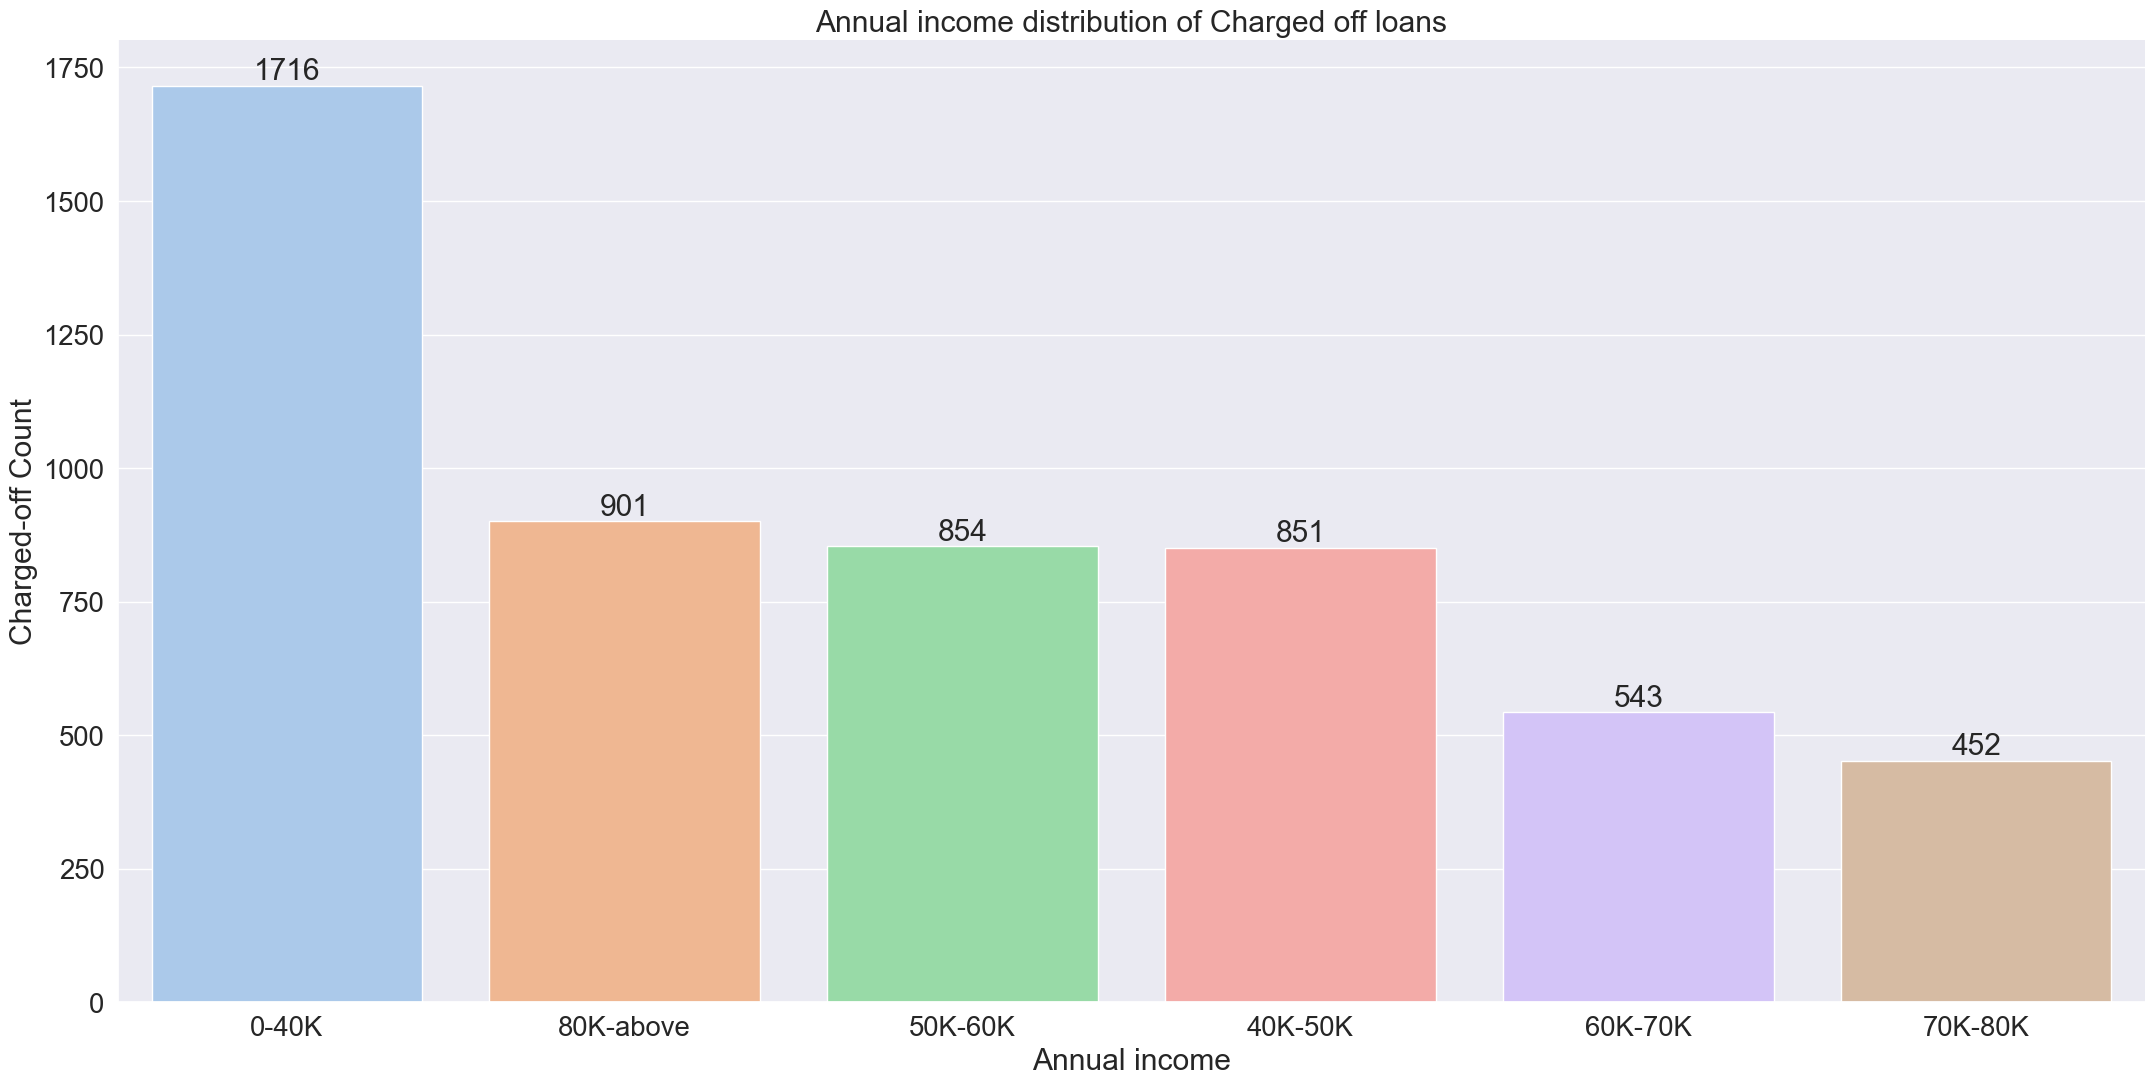

In [295]:
catplot=sns.catplot(x='annual_inc_bucket',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                    order =df_loan_chargedoff['annual_inc_bucket'].value_counts().index)
catplot.set(title='Annual income distribution of Charged off loans', xlabel='Annual income', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* 1716 Loan applicants with salary range from 0-40K are most of the defaulters. Lending company should check the repayment capability of employee who is in the lower salary band.

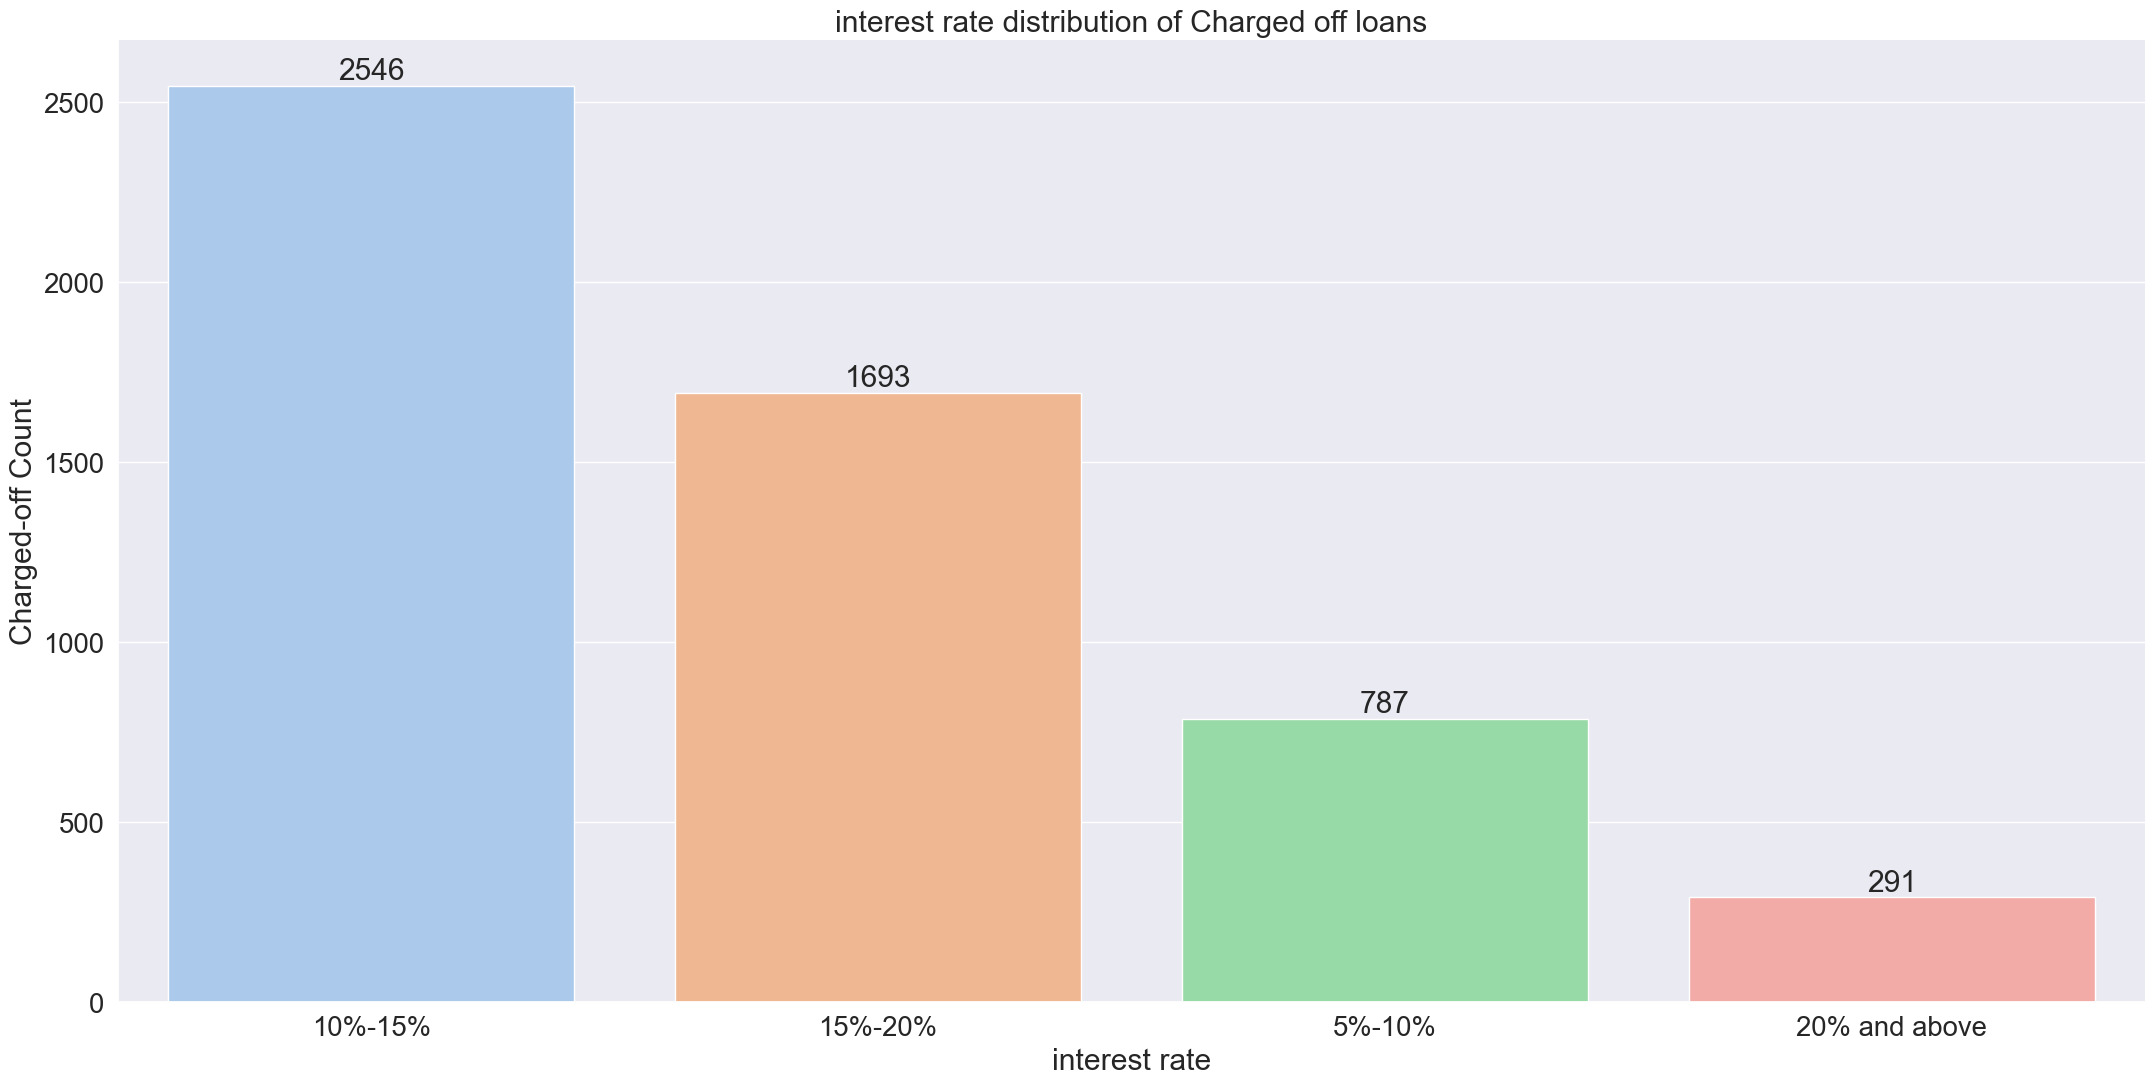

In [296]:
catplot=sns.catplot(x='int_rate_bucket',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                    order =df_loan_chargedoff['int_rate_bucket'].value_counts().index)
catplot.set(title='interest rate distribution of Charged off loans', xlabel='interest rate', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* 2546 Loan applicants having 10-15% interest rate contribute to the majority of charged off loans. A lower interest rate could possibly mitigate the risk of credit loss.

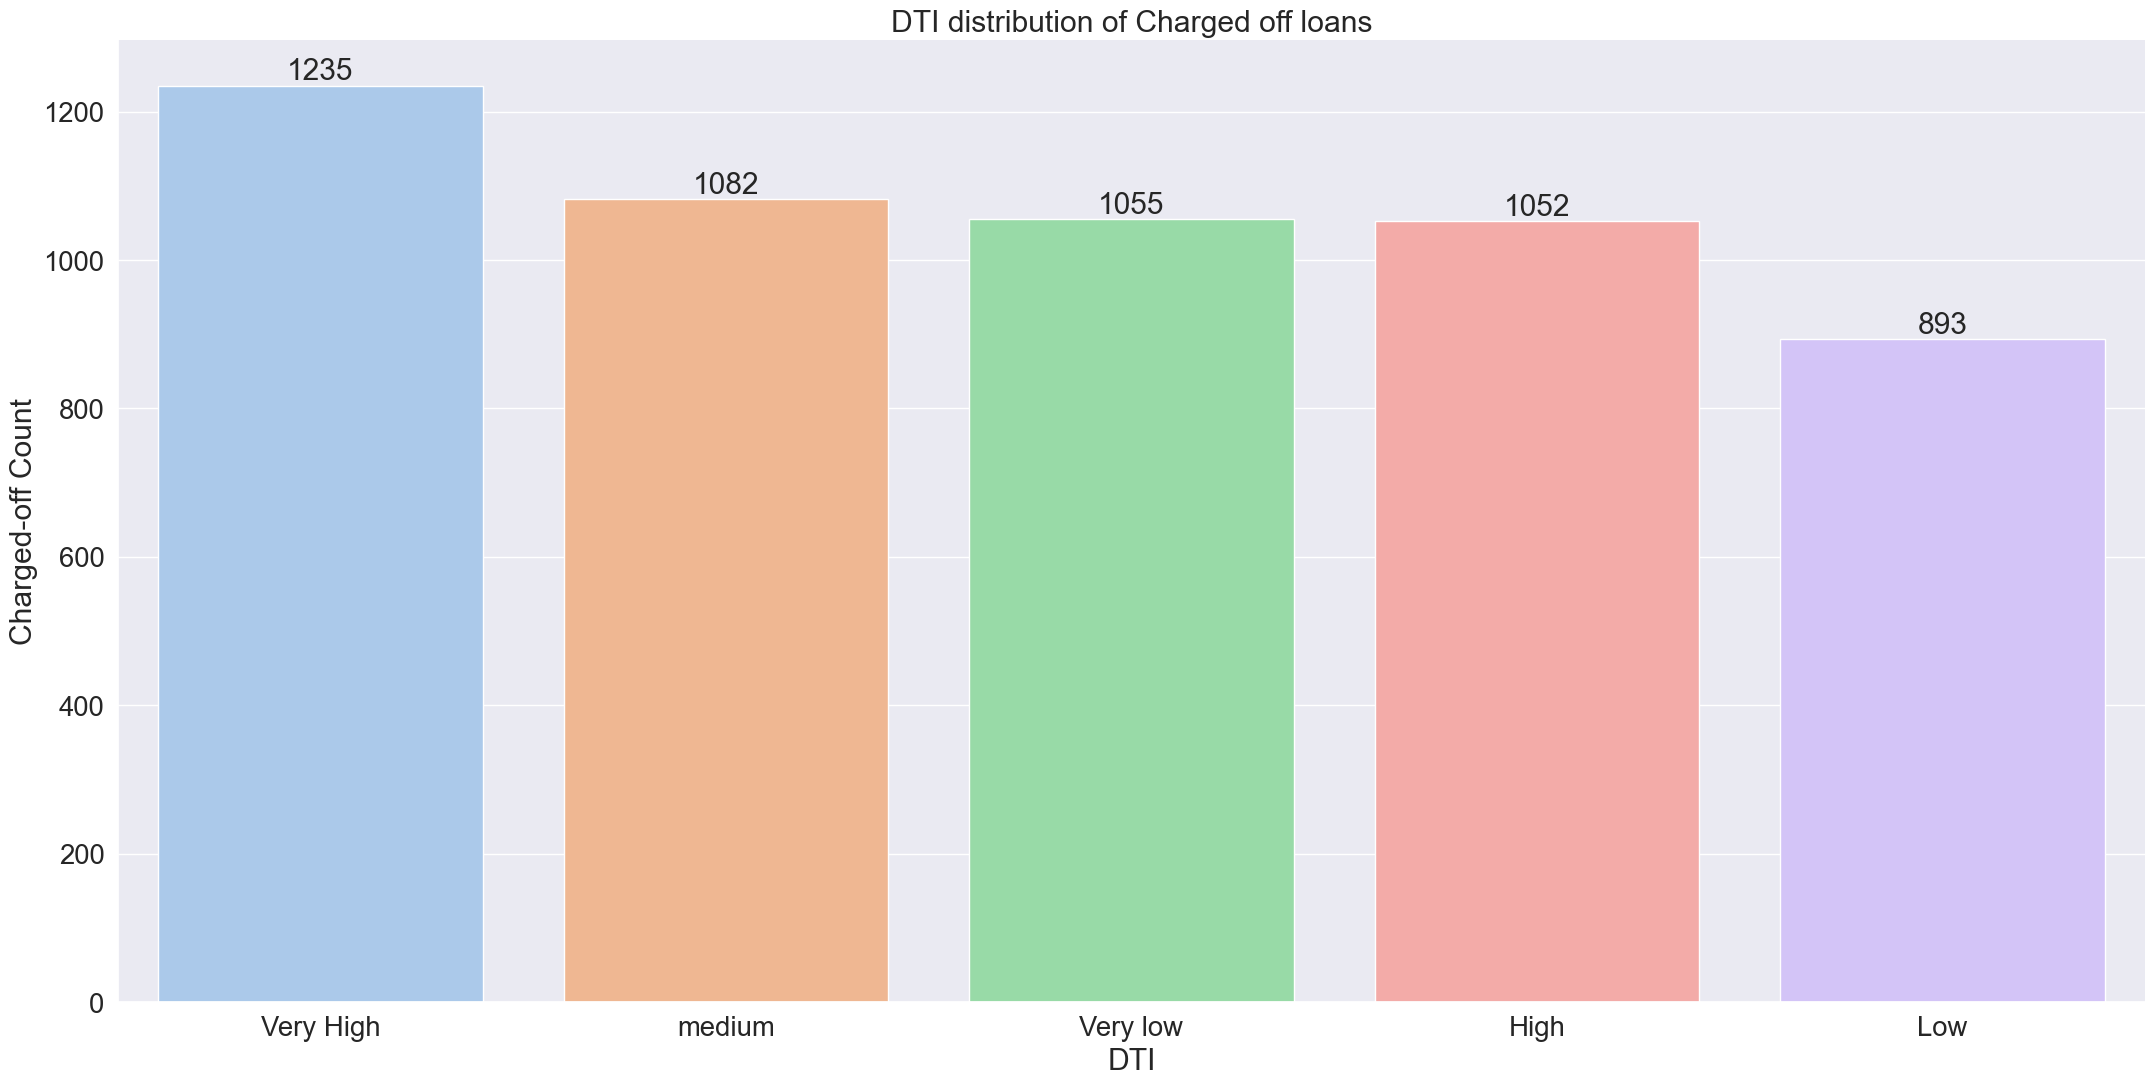

In [297]:
catplot=sns.catplot(x='dti_bucket',data=df_loan_chargedoff ,kind='count',palette='pastel',height=11, aspect=2.0,
                    order =df_loan_chargedoff['dti_bucket'].value_counts().index)
catplot.set(title='DTI distribution of Charged off loans', xlabel='DTI', ylabel='Charged-off Count')
catplot.set_xticklabels(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* 1235 Applicants have very high Debt-to-income ratio. The lending company should put strict debt to income ratio requirements in order to have sustainable levels for the debt against income.

#### Observations and Inferences from Quantitative analysis
* Majority of loan installment for defaulters lies between 160-400. This gives an indication for Lending company to monitor closely on these applicants with similar installments.
* Most defaulters are those with loan amount beween 5K to 10K . The lending company should evaluate applicants who apply for bigger amount. Should verify repayment capability as well.
* 1601 Loan applicants who received funds between 5K to 10K are most of the defaulters. The lending company should be cautious on providing large funds to applicants. Lending company should verify the repayment capebility before approval.
* 1716 Loan applicants with salary range from 0-40K are most of the defaulters. Lending company should check the repayment capability of employee who is in the lower salary band.
* 2546 Loan applicants having 10-15% interest rate contribute to the majority of charged off loans. A lower interest rate could possibly mitigate the risk of credit loss.
* 1235 Applicants have very high Debt-to-income ratio. The lending company should put strict debt to income ratio requirements in order to have sustainable levels for the debt against income.

## 7 Bivariate analysis

##### Ordered , Unordered & Quantitative variables will be analysed against `Loan status`
1. **Ordered categorical variable**
    1. term -- The number of payments on the loan.
    2. grade -- LC assigned loan grade.
    3. sub_grade -- LC assigned loan subgrade.
    4. emp_length -- Employment length in years.
    5. mnth_issued -- Month in which loan issued.
    6. yr_issued -- Year in which loan issued.
    7. quarter -- in which quarter loan is issued.
2. **Unordered categorical variables**
    1. Home Ownership - Whether the home is Rented / own house / under mortgage.
    2. Verification status - whether loan is Verified / Not verified.
    3. purpose - Reason for taking loan.
    4. State - The state to which loan applicant belongs.
3. **Quantitative variables**
   1. Loanamt_bucket - Loan amount in multiple bins.
   2. funded_amnt_bucket - Funded amount in multiple bins.
   3. annual_inc_bucket - Annual income in multiple bins.
   4. int_rate_bucket - Rate of interest in multiple bins.
   5. dti_bucket - Debt to income in multiple bins.

### 7.1 Ordered categorical variable against loan status

#### Grade v/s Loan status

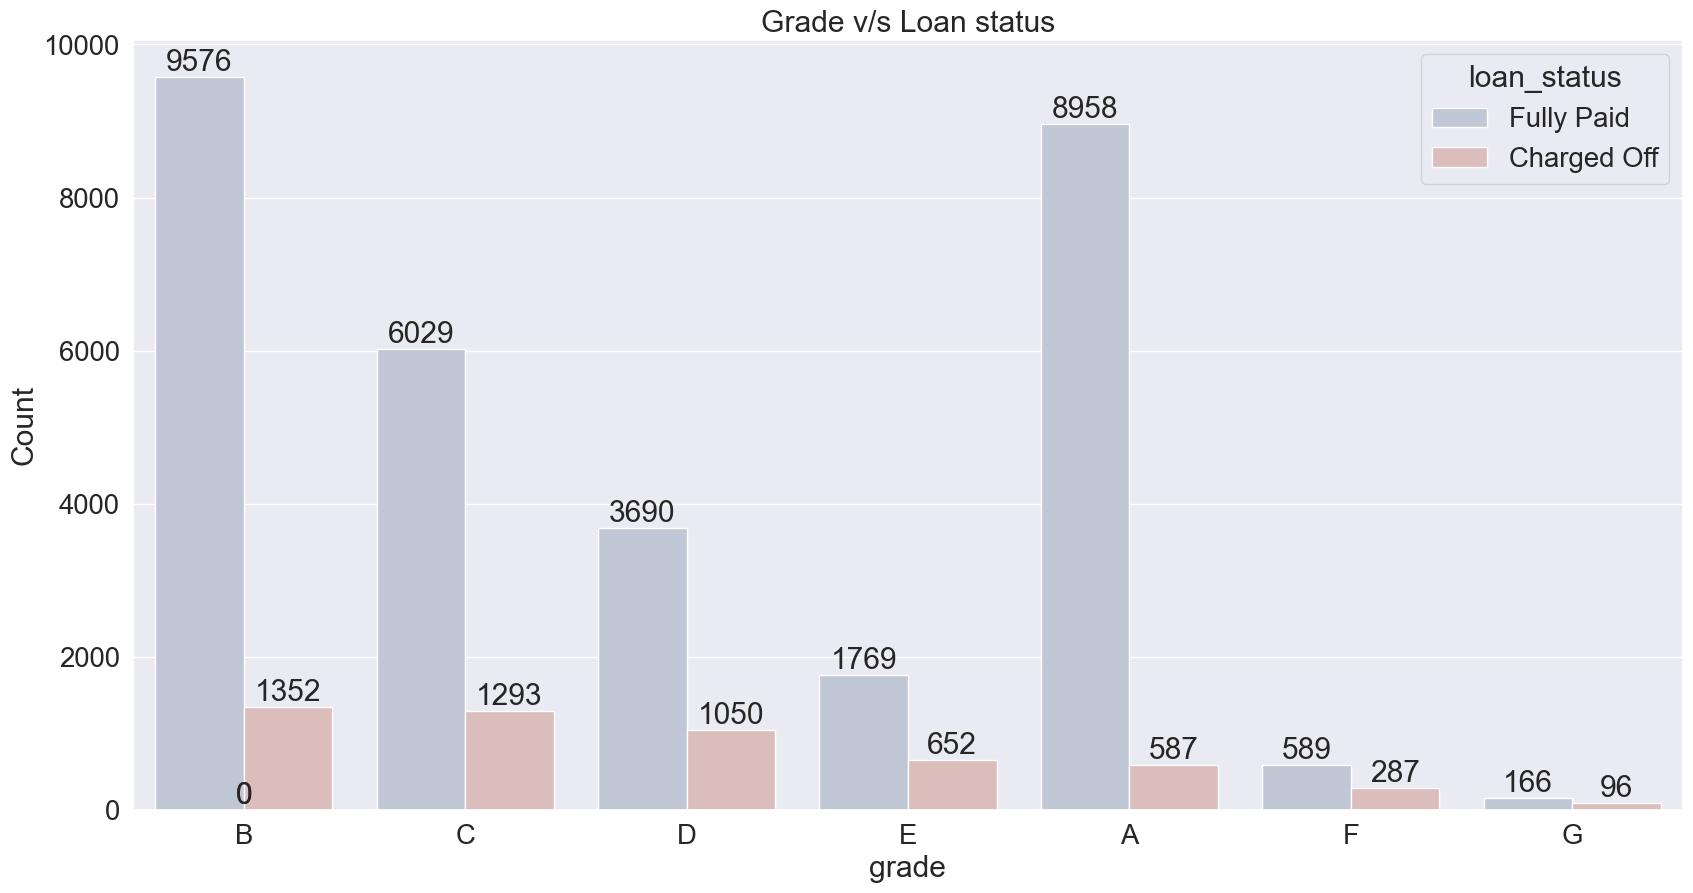

In [298]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='grade',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['grade'].value_counts().index,palette='vlag')
ax.set_xlabel('grade')
ax.set_ylabel('Count')
ax.set_title('Grade v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Loan applicants in Grades B, C, and D account for the majority of ‘Charged Off’ loans. However, Grades A and B make up the largest portion of total loan applicants. This indicates that Grade A applicants positively impact the business, while caution is needed when approving loans for Grade B, C and D applicants.

#### subgrade v/s loan status

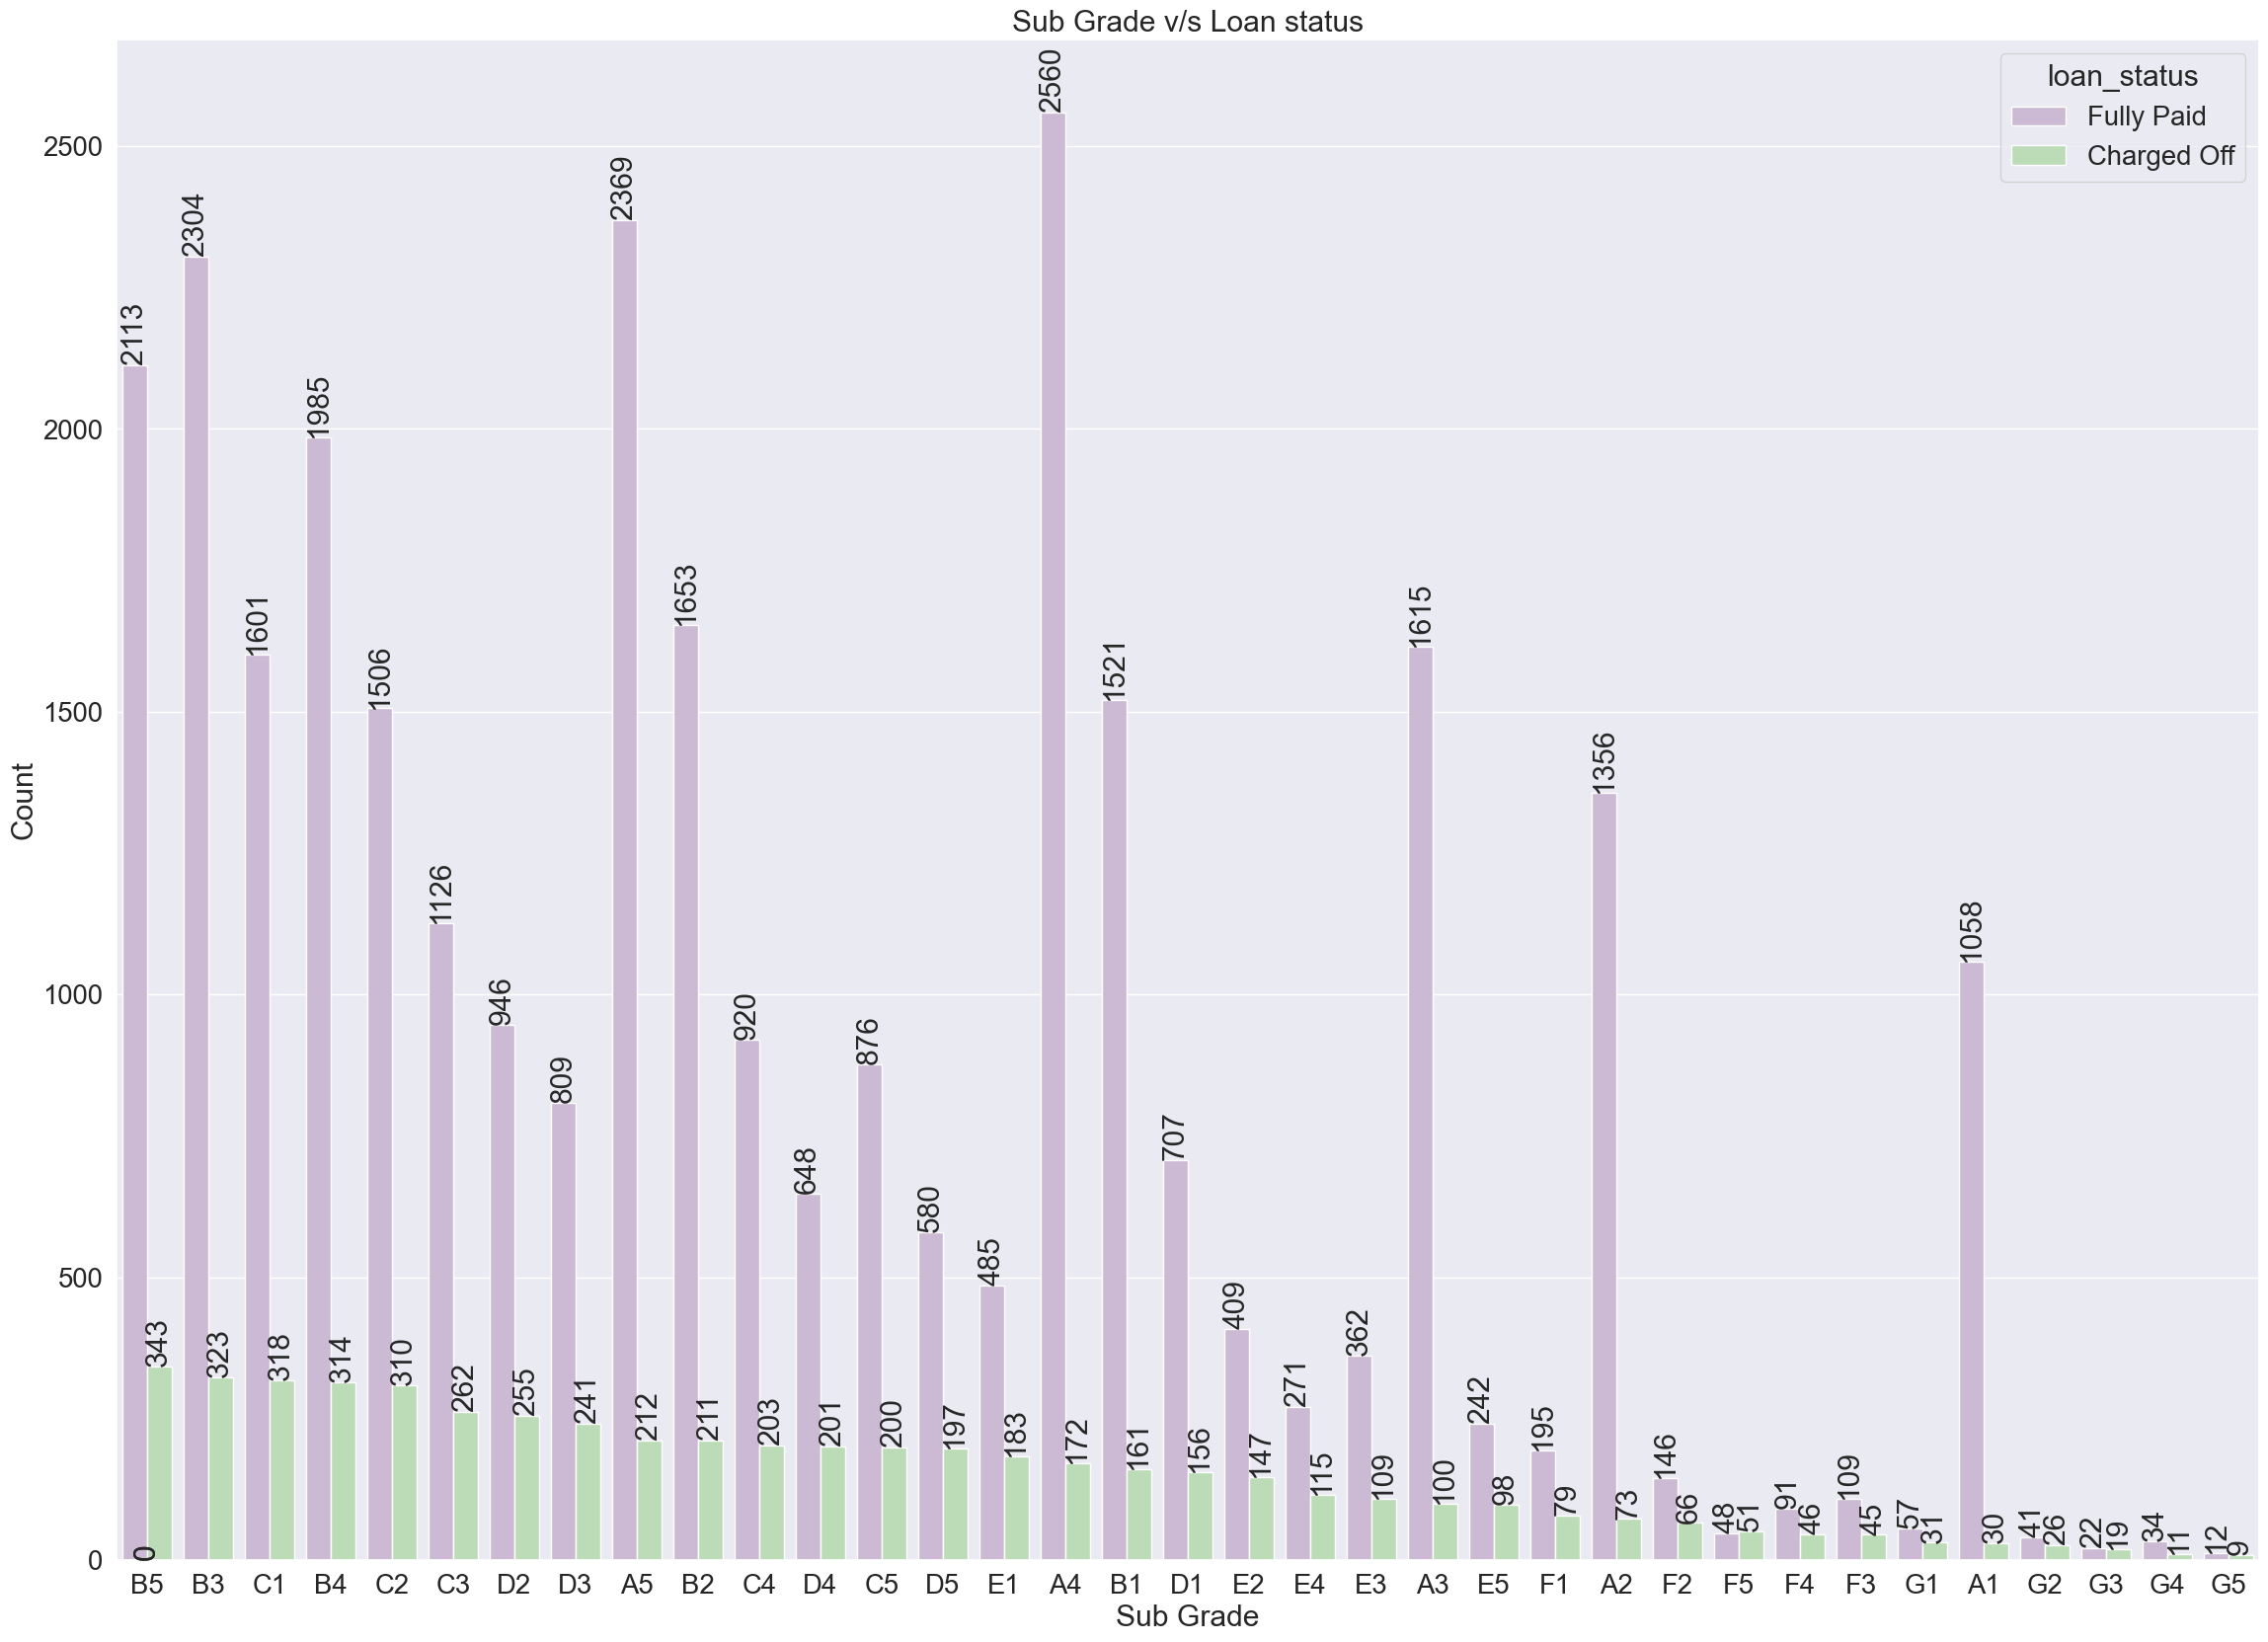

In [299]:
fig, ax = plt.subplots(figsize=(28,20), dpi=100)
sns.countplot(x='sub_grade',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['sub_grade'].value_counts().index,palette='PRGn')
ax.set_xlabel('Sub Grade')
ax.set_ylabel('Count')
ax.set_title('Sub Grade v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=90)
plt.show()

* Loan subgrade B3,B4,B5,C1,C2,C3 & D2 contribute to most of Charged off loans.

#### Term v/s Loan status

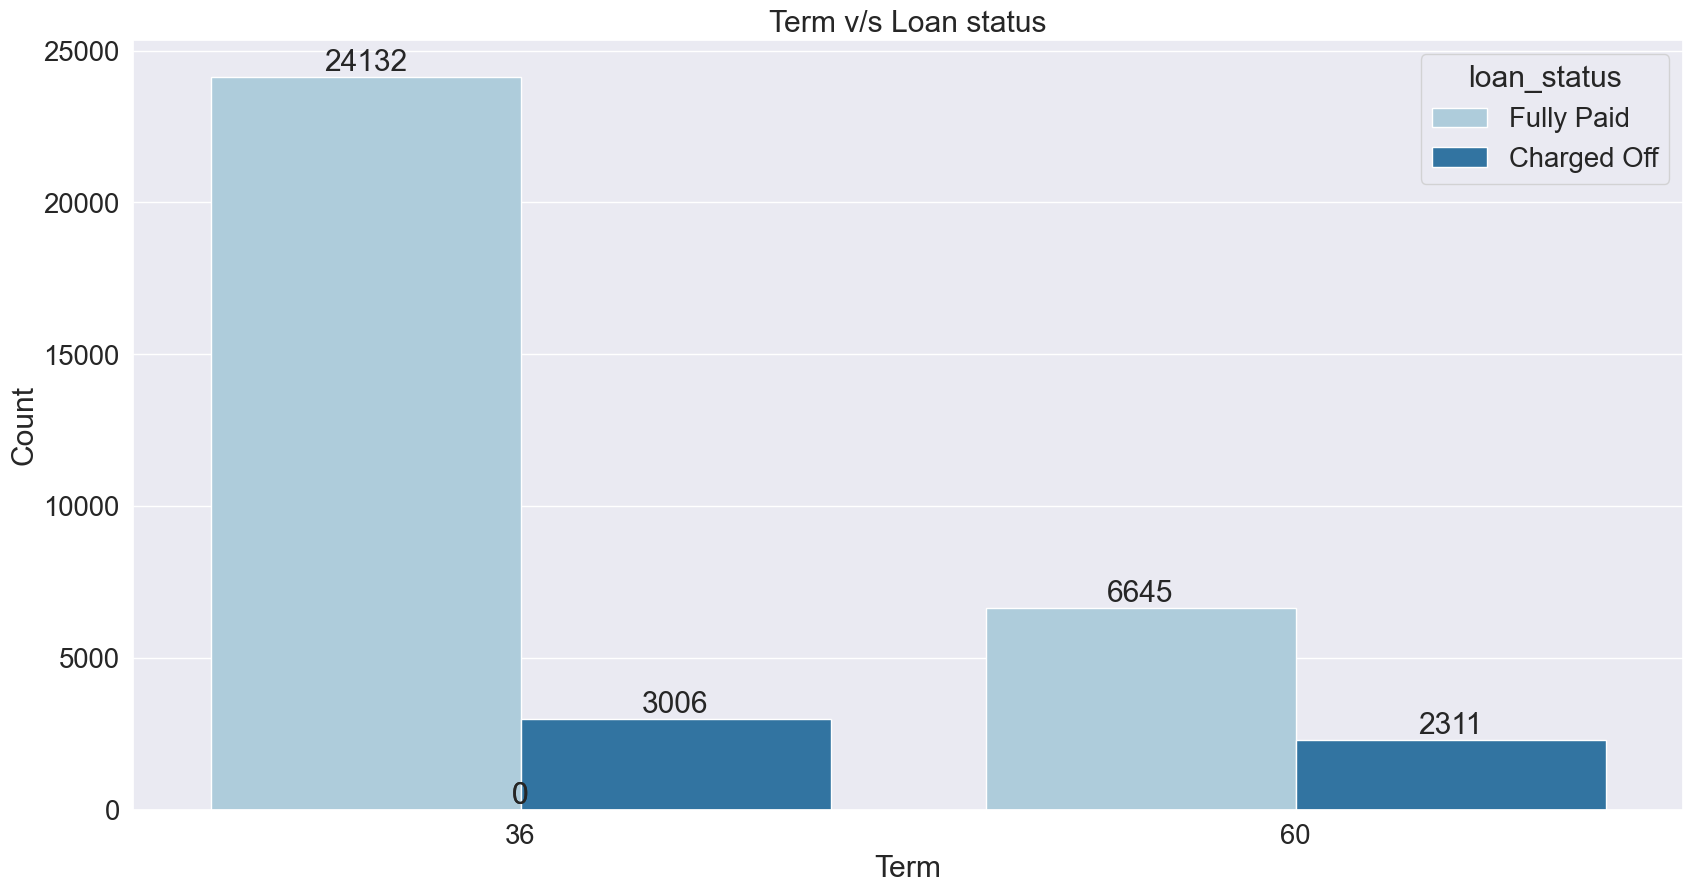

In [300]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='term',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['term'].value_counts().index,palette='Paired')
ax.set_xlabel('Term')
ax.set_ylabel('Count')
ax.set_title('Term v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Most charged-off loans are short-term. However, when comparing the total loans for each term, the percentage of long-term loans being charged off is higher than that of short-term loans. 

#### Employee length v/s Loan status

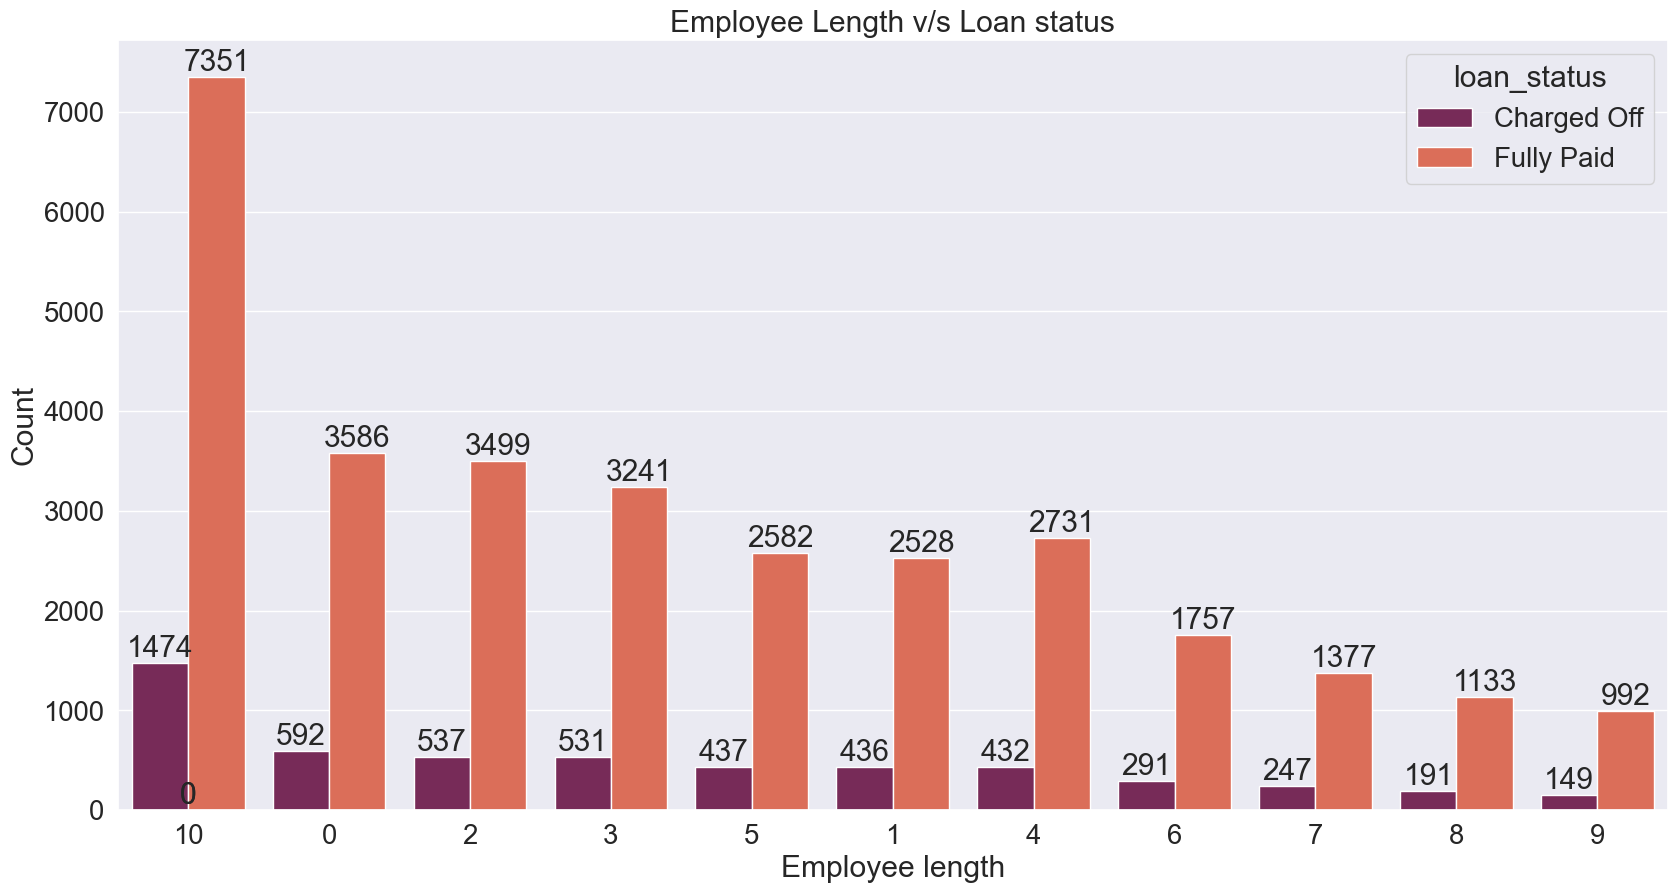

In [301]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='emp_length',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['emp_length'].value_counts().index,palette='rocket')
ax.set_xlabel('Employee length')
ax.set_ylabel('Count')
ax.set_title('Employee Length v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Employees having 10 or more years of experience are majority of loan applicants. They are also most likely to be defaulters.

#### Month v/s loan status

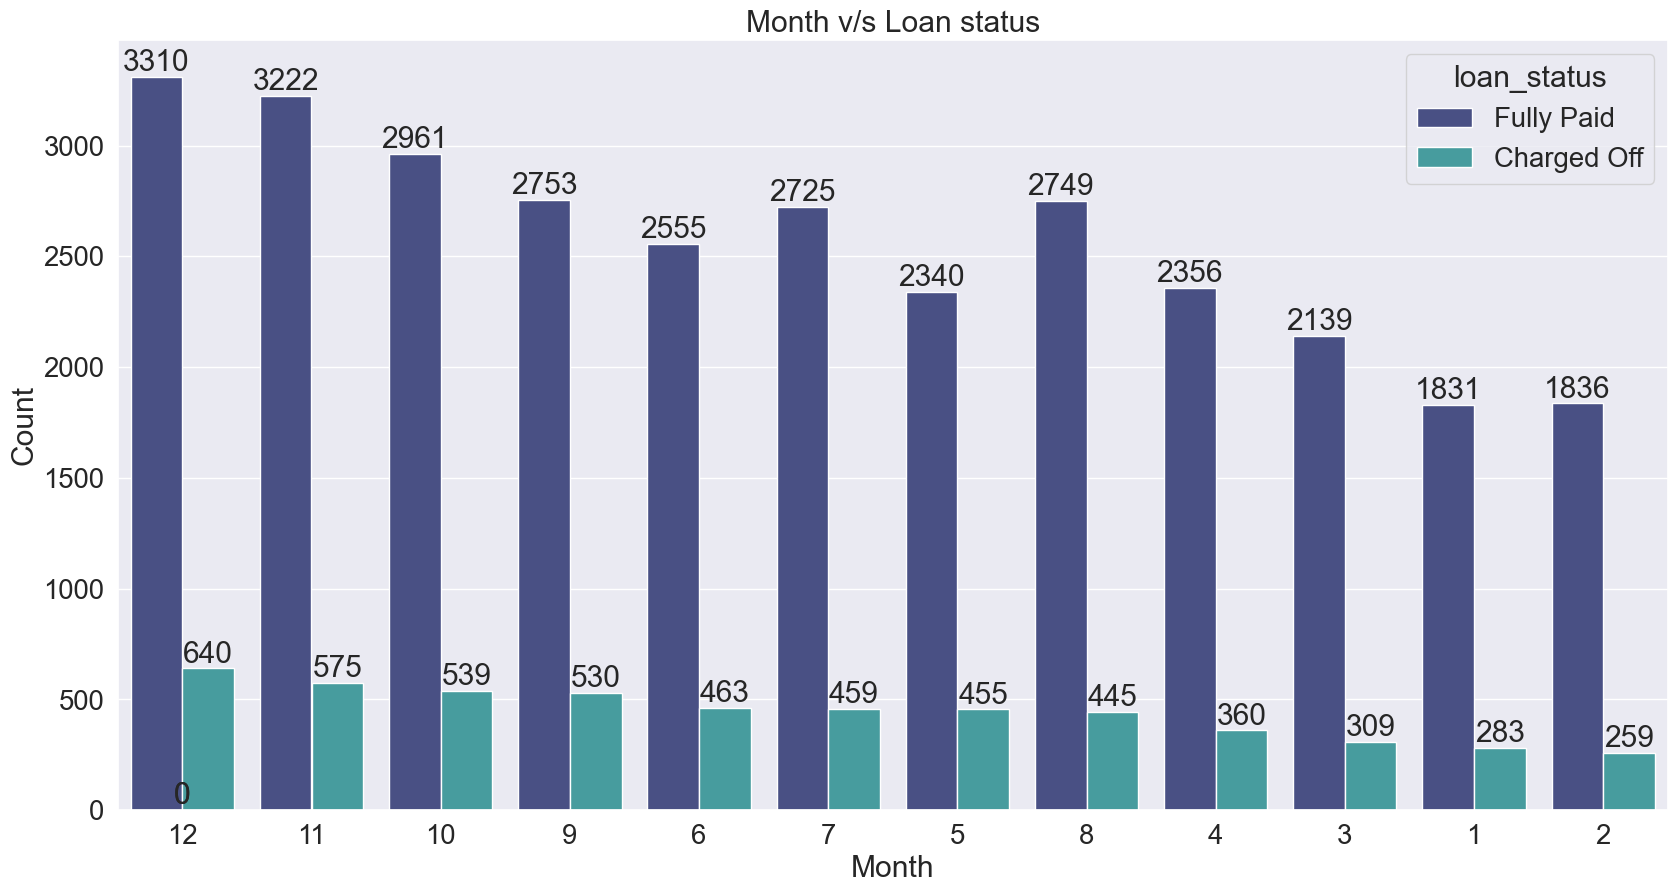

In [302]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='mnth_issued',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['mnth_issued'].value_counts().index,palette='mako')
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Month v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* December month is the month with the maximum loan applicants.

#### Year v/s Loan status

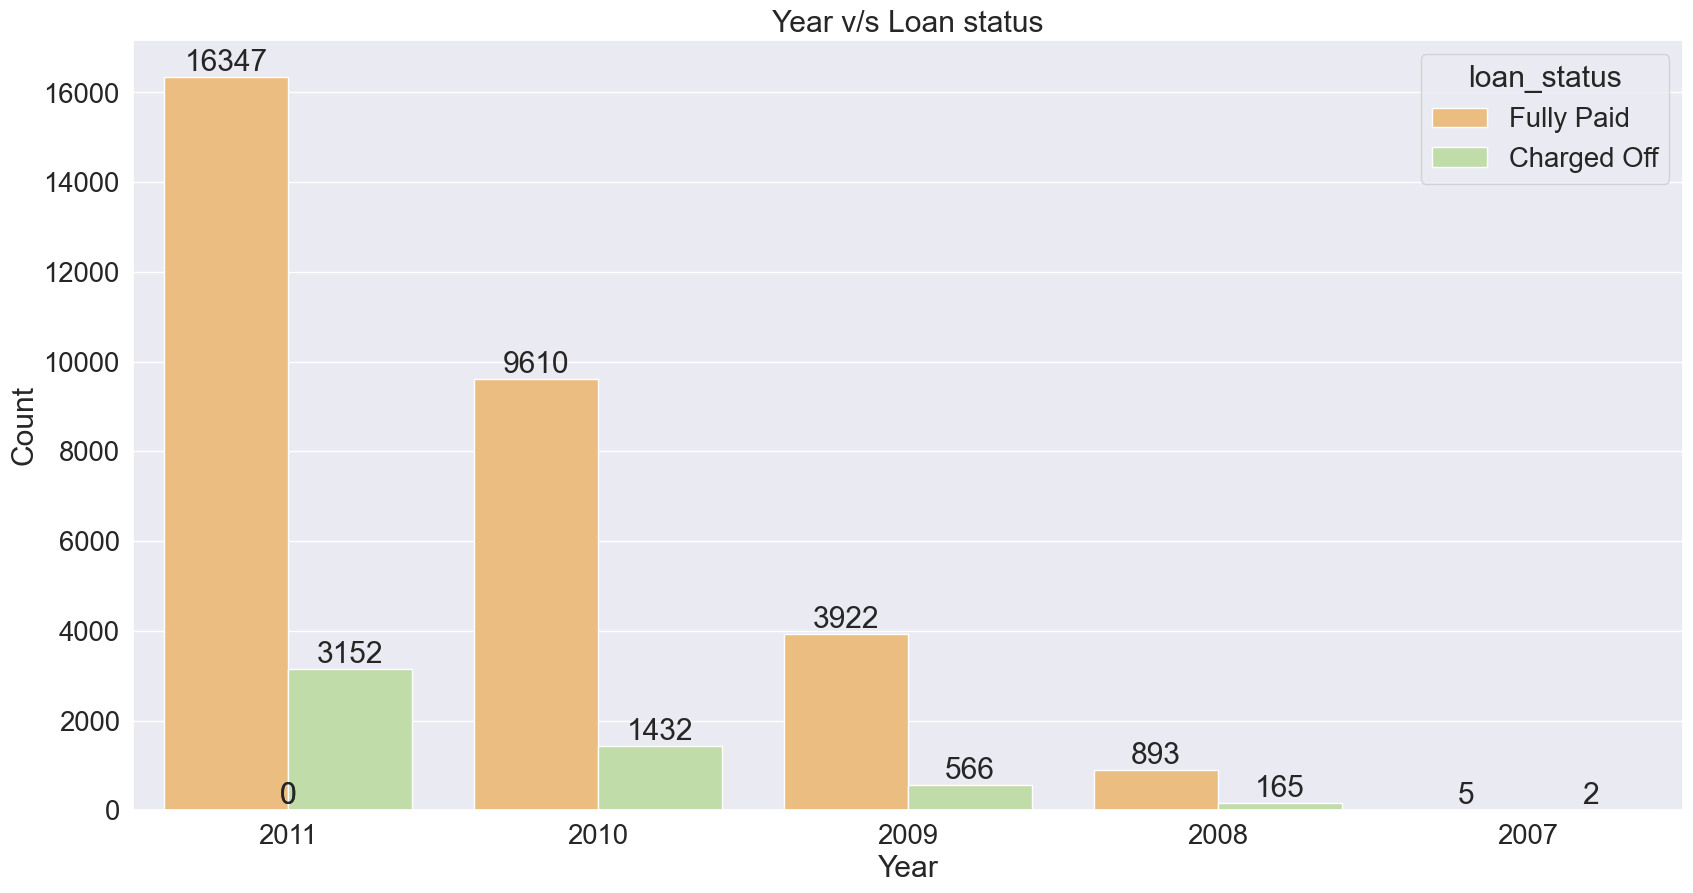

In [303]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='yr_issued',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['yr_issued'].value_counts().index,palette='Spectral')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Year v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* From 2007 to 2011 there is a positive trend of loan applicants. This shows there is a positive trend of more applicants in upcoming years.

#### Quarter v/s loan status

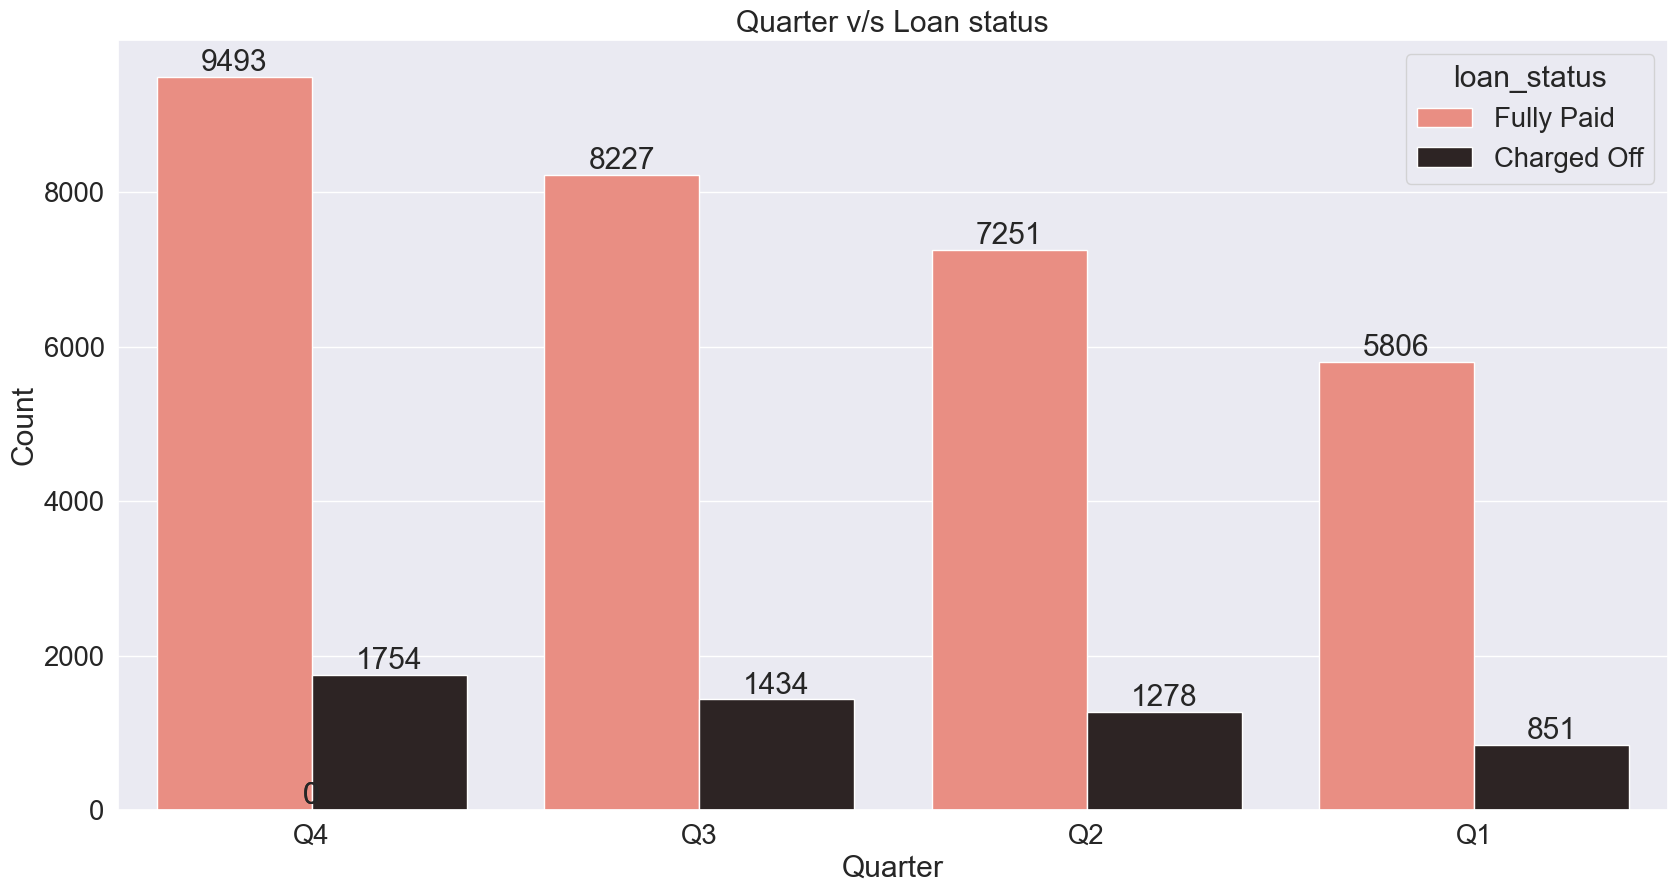

In [304]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='quarter',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['quarter'].value_counts().index,palette='dark:salmon_r')
ax.set_xlabel('Quarter')
ax.set_ylabel('Count')
ax.set_title('Quarter v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* 4th Quarter indicates receiving maximum loan applications. This may be because of the holiday season.

### 7.2 Unordered categorical variable against loan status

#### Home ownership v/s loan status

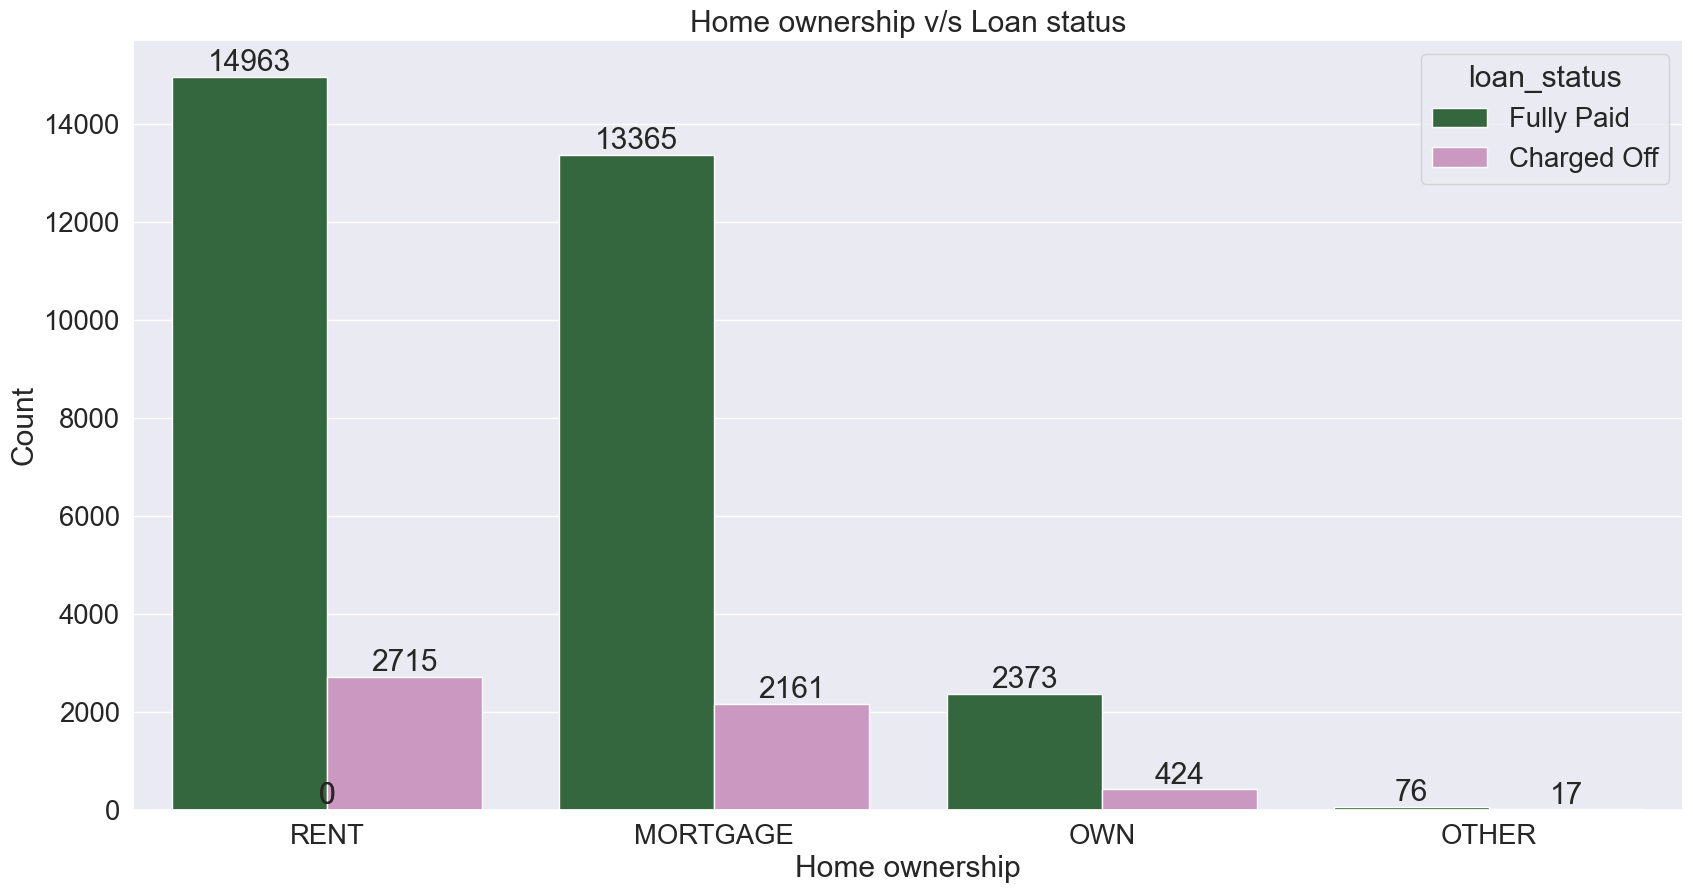

In [305]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='home_ownership',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['home_ownership'].value_counts().index,palette='cubehelix')
ax.set_xlabel('Home ownership')
ax.set_ylabel('Count')
ax.set_title('Home ownership v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()


* Loan applications received from those living in rented house and mortgage contribute to the majority and they are more likely to be defaulters.

#### Verification status v/s loan status

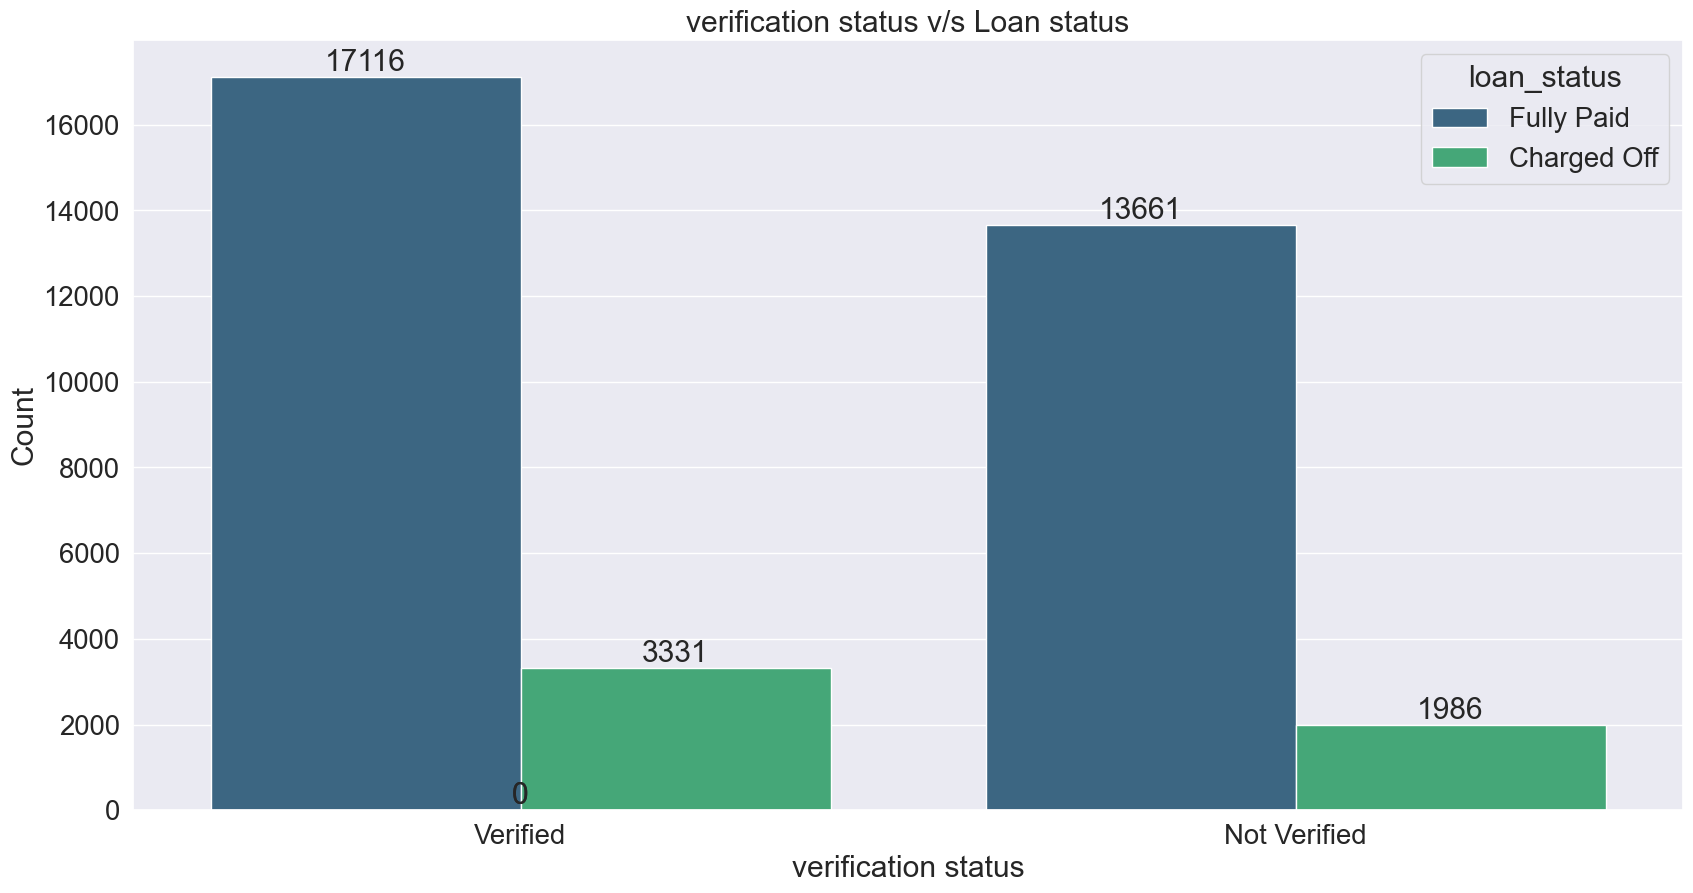

In [306]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.countplot(x='verification_status',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['verification_status'].value_counts().index,palette='viridis')
ax.set_xlabel('verification status')
ax.set_ylabel('Count')
ax.set_title('verification status v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Even the verified loans are getting defaulted. The verification process needs to be strengthened.

#### Purpose v/s loan status

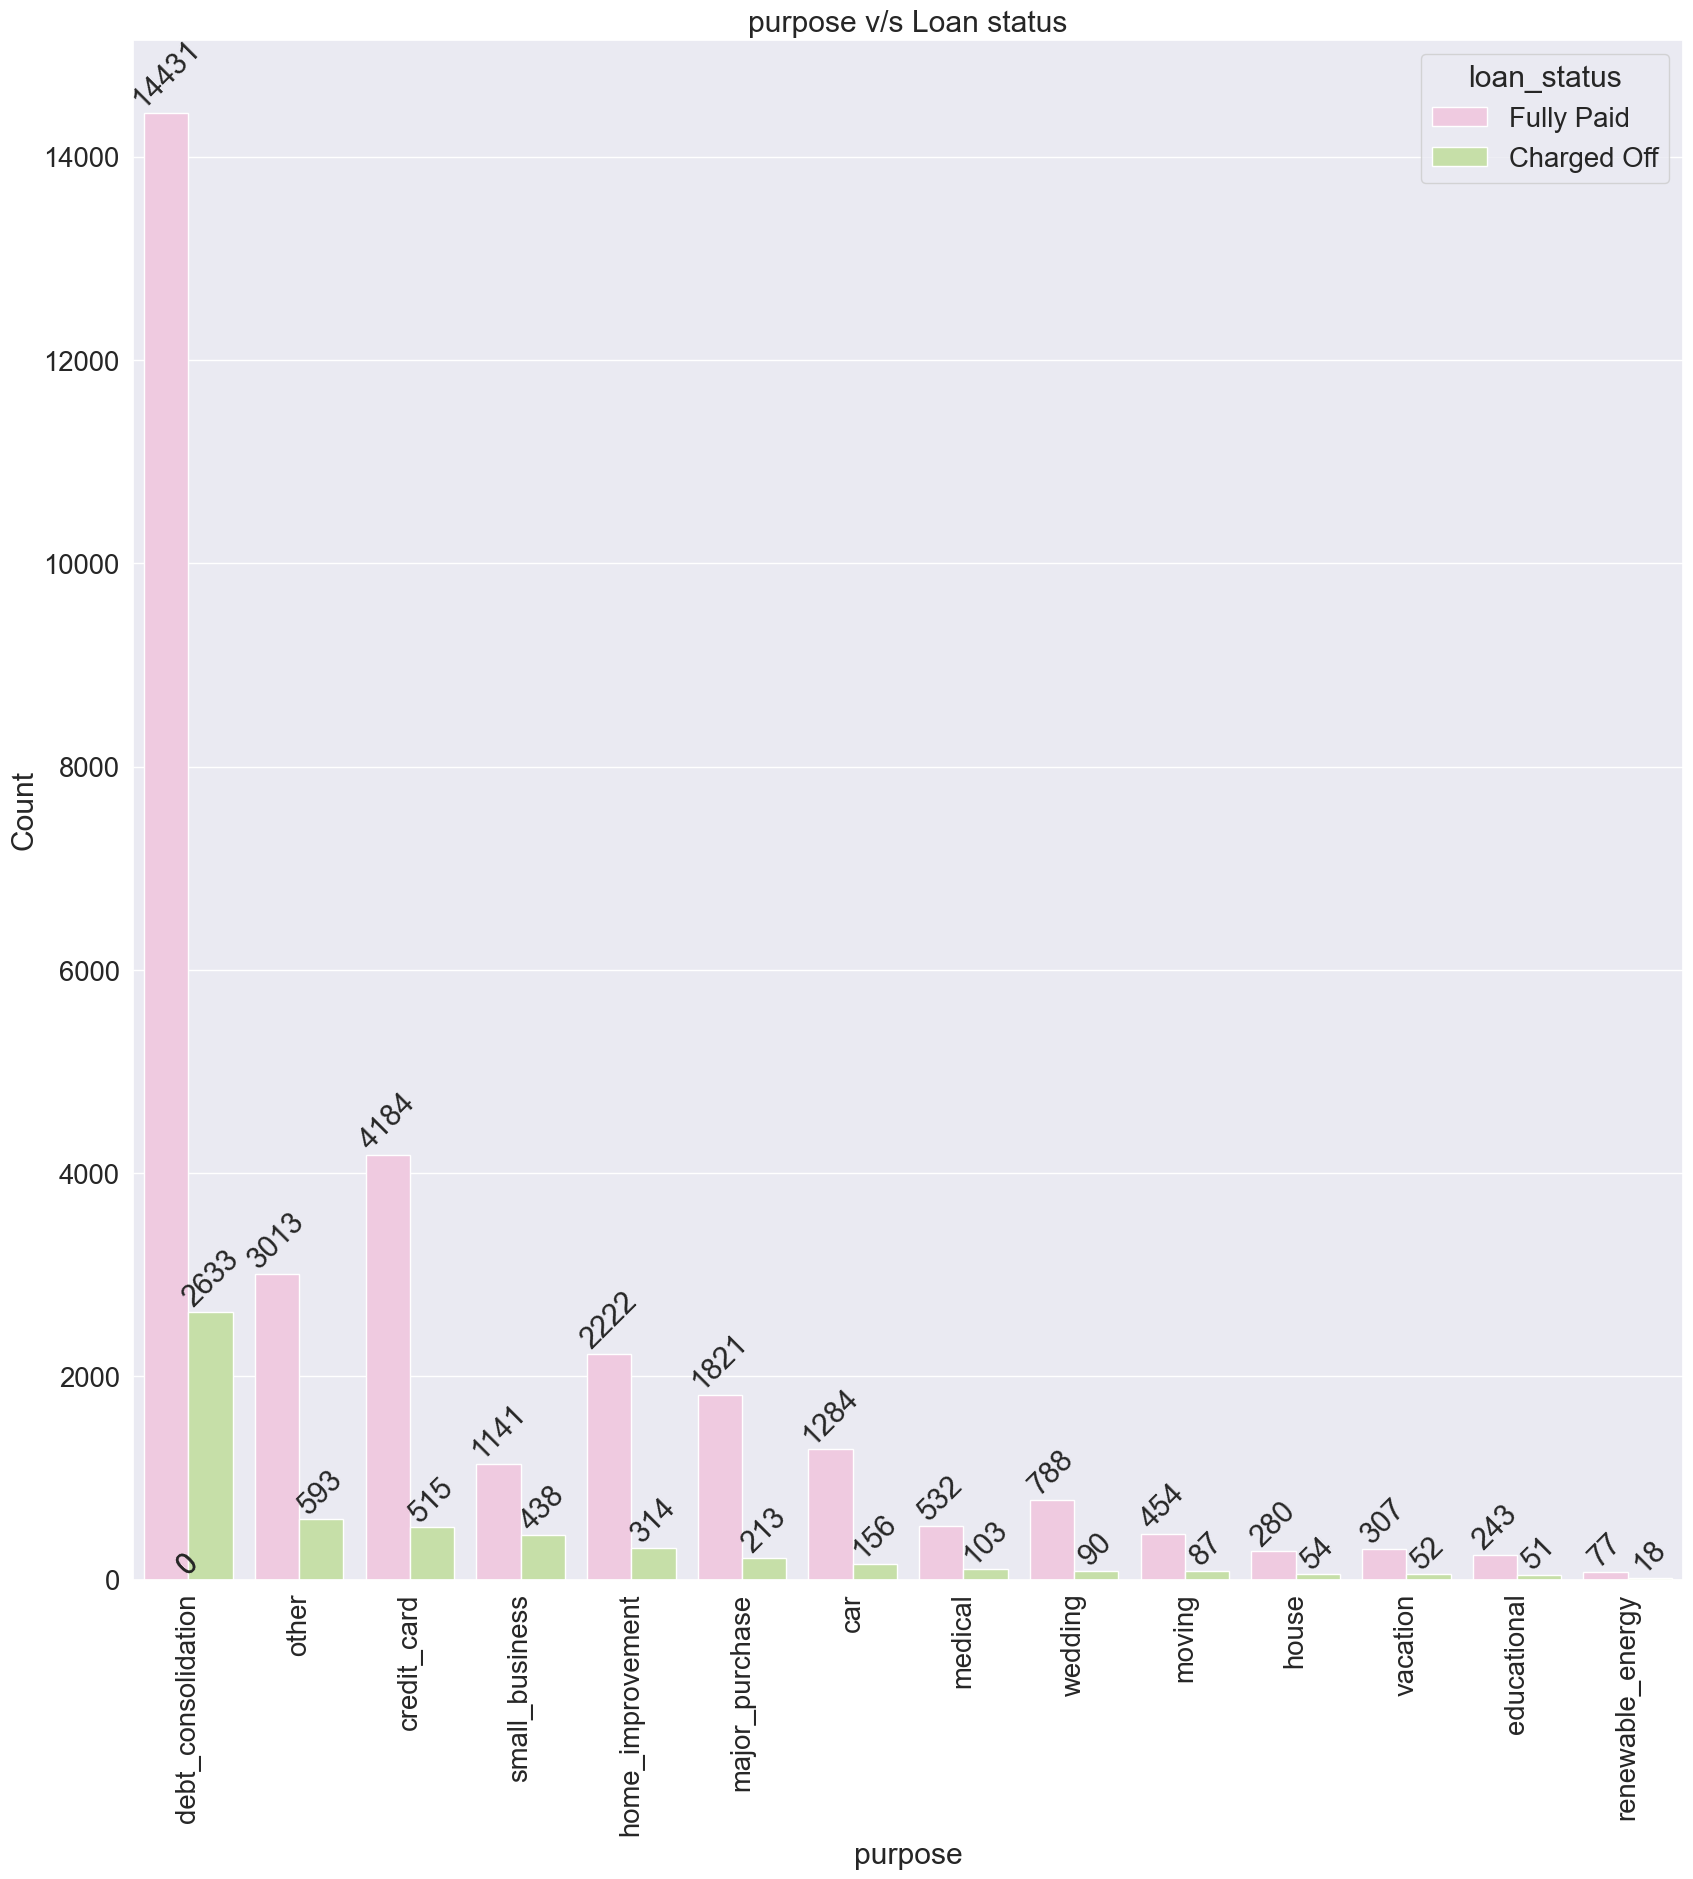

In [307]:
fig, ax = plt.subplots(figsize=(20,20), dpi=100)
sns.countplot(x='purpose',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['purpose'].value_counts().index,palette='PiYG')
ax.set_xlabel('purpose')
ax.set_ylabel('Count')
ax.set_title('purpose v/s Loan status')
plt.xticks(rotation=90)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=45)
plt.show()

* Majority loan has been approved on debt consolidation and this mostly contributes to charged off loans.

#### State v/s loan status

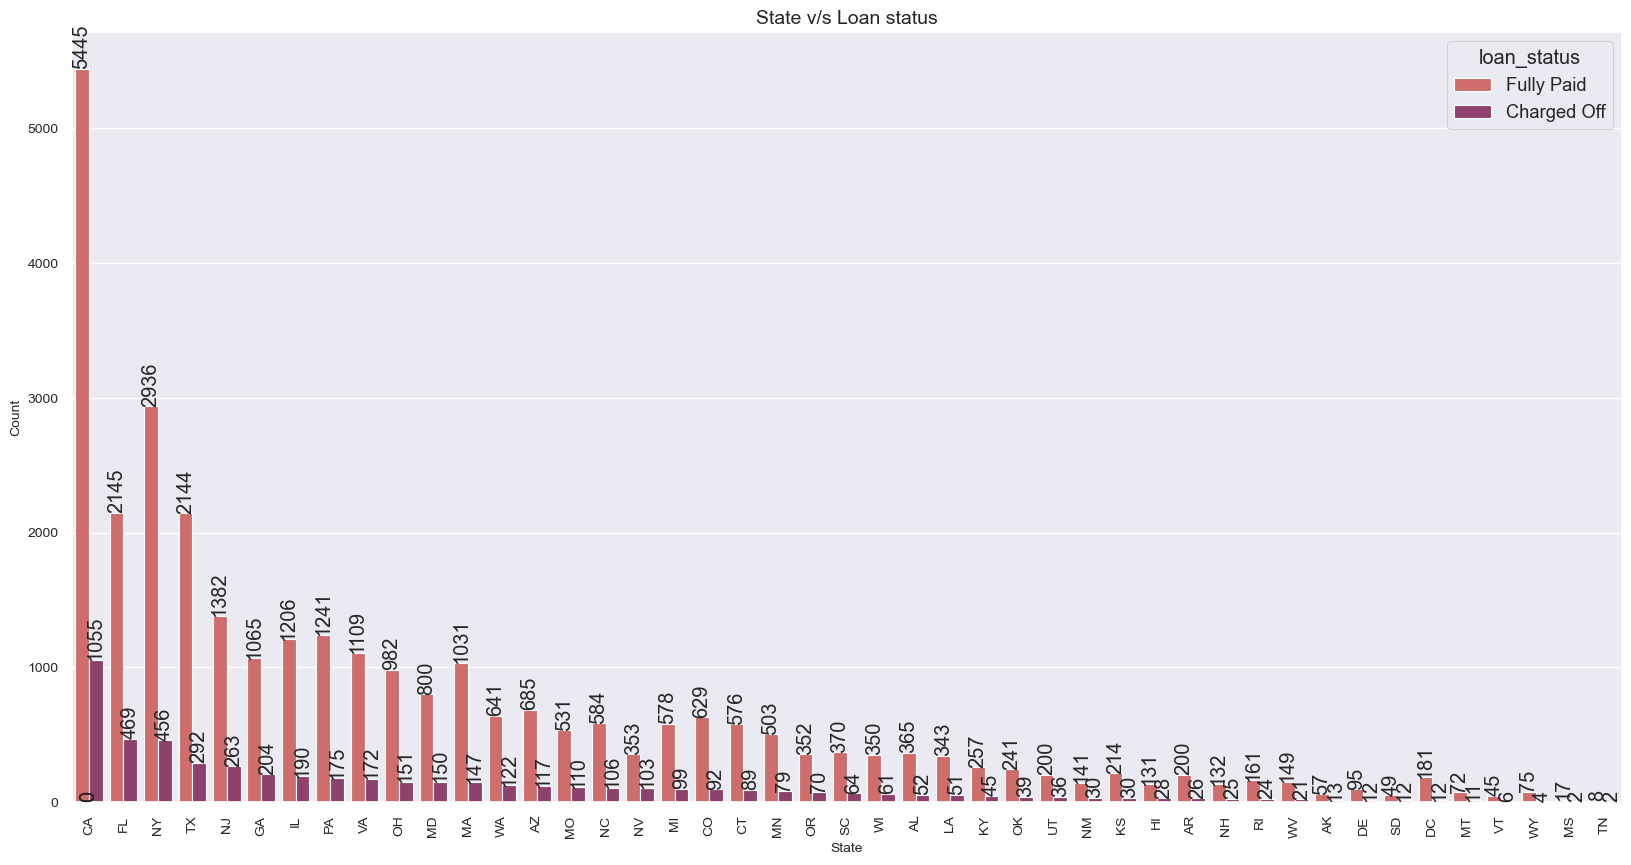

In [308]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
sns.set_context("paper", font_scale=1.5)
sns.countplot(x='addr_state',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['addr_state'].value_counts().index,palette='flare')
ax.set_xlabel('State',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
ax.set_title('State v/s Loan status' ,fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=90)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=90)
plt.show()

* There are more loan applicants from States CA, FL & NY and they make to the majority of the defaulters list. Going forward there will be more defaulters from the above mentioned states.

### 7.3 Quantitative variables against Loan status

#### Loan amount v/s loan status

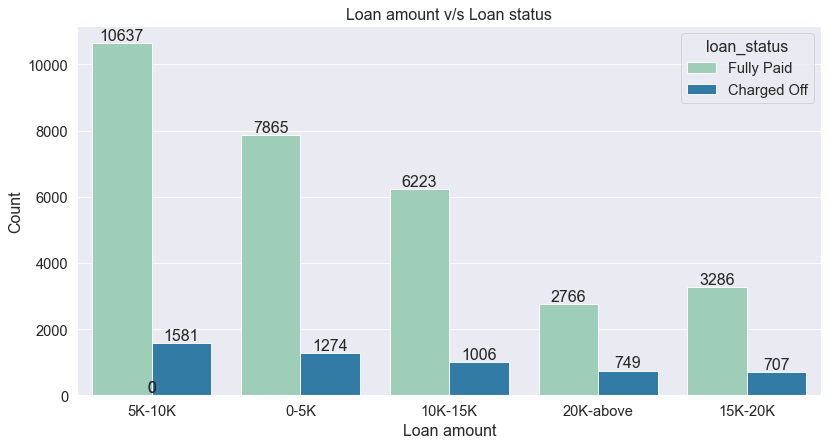

In [309]:
fig, ax = plt.subplots(figsize=(12,6), dpi=80)
sns.countplot(x='Loanamt_bucket',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['Loanamt_bucket'].value_counts().index,palette='YlGnBu')
ax.set_xlabel('Loan amount')
ax.set_ylabel('Count')
ax.set_title('Loan amount v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Majority of loan amount applied is between 5K to 10K and the majority defaulters are in this category.This pattern could continue as trend. The lending company should be cautious when approving higher amount loans.

#### Funded amount v/s Loan status

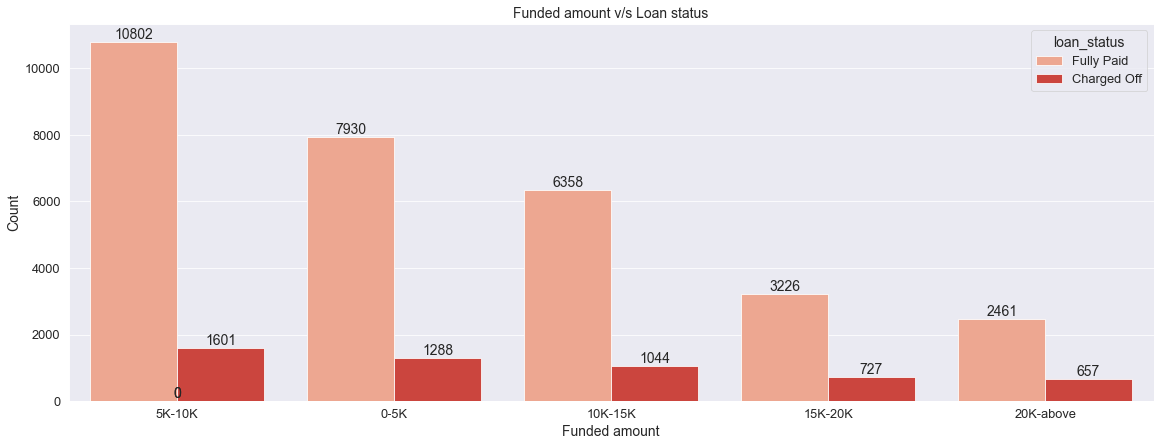

In [310]:
fig, ax = plt.subplots(figsize=(20,7), dpi=70)
sns.countplot(x='funded_amnt_bucket',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['funded_amnt_bucket'].value_counts().index,palette='Reds')
ax.set_xlabel('Funded amount')
ax.set_ylabel('Count')
ax.set_title('Funded amount v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Majority of loan approved are in the range of 5K-10K. Defaulters being majority in this category the lending company should perform proper check before loan approval. 

#### Annual income v/s Loan status

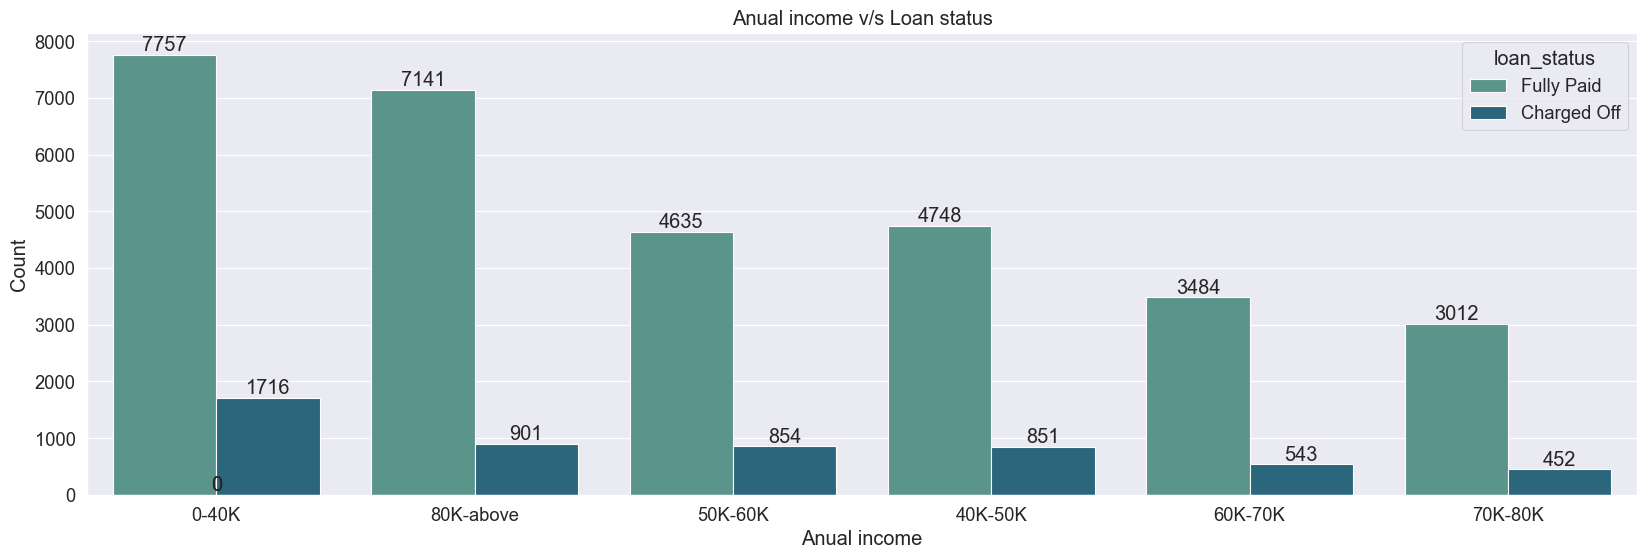

In [311]:
fig, ax = plt.subplots(figsize=(20,6), dpi=100)
sns.countplot(x='annual_inc_bucket',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['annual_inc_bucket'].value_counts().index,palette='crest')
ax.set_xlabel('Anual income')
ax.set_ylabel('Count')
ax.set_title('Anual income v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* Majority of loan applicants are with salary less than 40000 and they contribute to most of the charged off loans. Less annual income leads to defaulting tendency.

#### DTI v/s Loan status

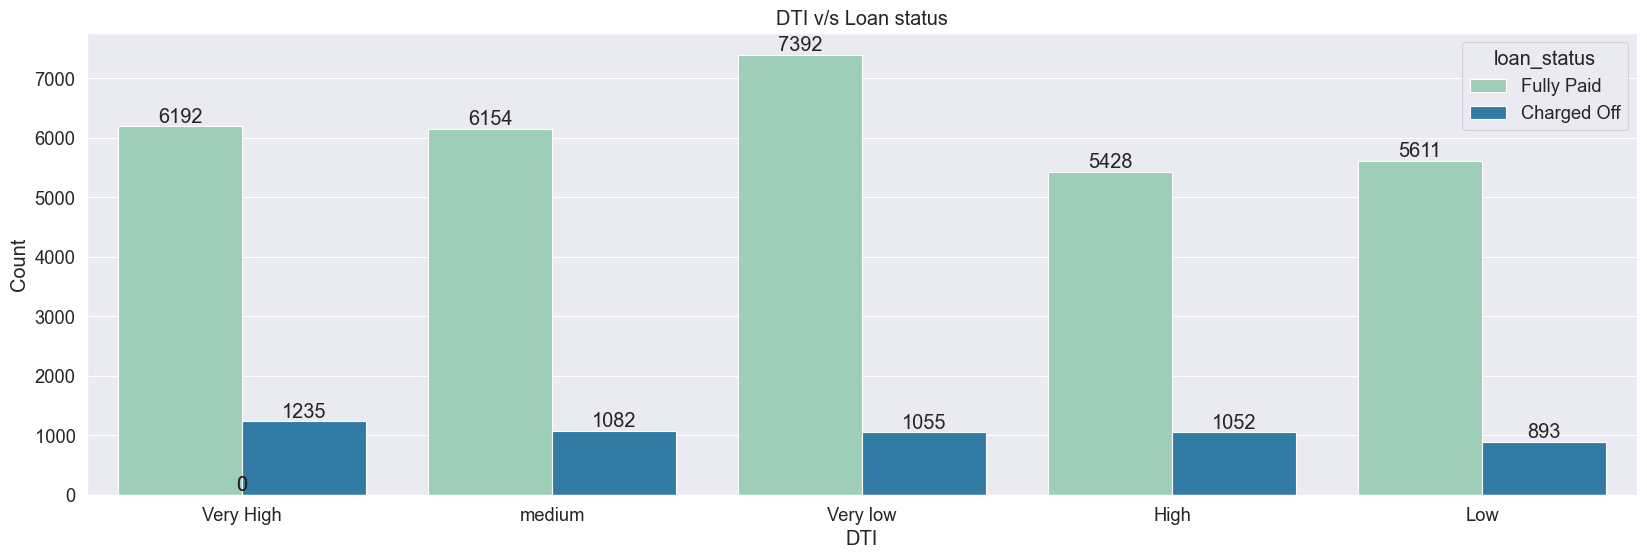

In [312]:
fig, ax = plt.subplots(figsize=(20,6), dpi=100)
sns.countplot(x='dti_bucket',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['dti_bucket'].value_counts().index,palette='YlGnBu')
ax.set_xlabel('DTI')
ax.set_ylabel('Count')
ax.set_title('DTI v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center',va='bottom',rotation=0)
plt.show()

* High count of loans get charged off in cases where the Debt-to-income ratio is very high. Lending company should focus on granting loans for applicants with low DTI to reduce credit loss.

#### Interest rate V/s Loan status

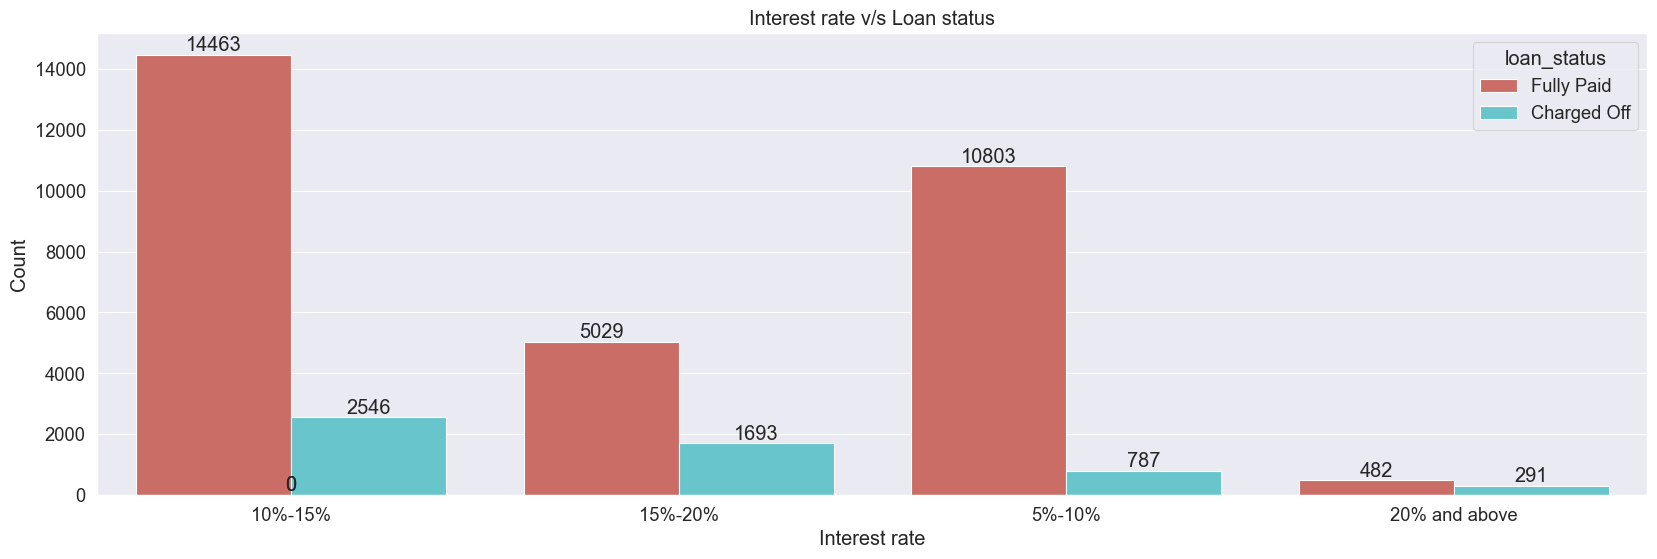

In [313]:
fig, ax = plt.subplots(figsize=(20,6), dpi=100)
sns.countplot(x='int_rate_bucket',hue='loan_status',data=df_loan,
              order=df_loan_chargedoff['int_rate_bucket'].value_counts().index,palette='hls')
ax.set_xlabel('Interest rate')
ax.set_ylabel('Count')
ax.set_title('Interest rate v/s Loan status')
plt.xticks(rotation=0)
for p in plt.gca().patches:
     plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() + p.get_width() / 2,p.get_height()), 
                        ha='center',va='bottom',rotation=0)
plt.show()

* A significant count of loan defaulters received loans with interest rates falling within the range of 10% to 15%.Lending company should modify the interest rates such that the customer can repay and the risk on credit loss can be avoided.

### 7.4 Observations and inferences from Bivariate analysis
* **Ordered categorical variable**
    * Loan applicants in Grades B, C, ano D account for the majority of ‘Charged Off’ loans. However, Grades A and B make up the largest portion of total loan applicants. This indicates that Grade A applicants positively impact the business, while caution is needed when approving loans for Grade B, C and D applicants.
    * Loan subgrade B3,B4,B5,C1,C2,C3 & D2 contribute to most of Charged off loans.
    * Most charged-off loans are short-term. However, when comparing the total loans for each term, the percentage of long-term loans being charged off is higher than that of short-term loans. In this case company should assess risk with long term loan and adjust term or the interest rate accordingly.
    * Employees having 10 or more years of experience are majority of loan applicants. They are also most likely to be defaulters. Experience should not be the only criteria for approving loans.
    * December month is the month with the maximum number of loan applicants. The company should adopt efficient way to meet customer needs with minimal risk on credit loss.   
    * From 2007 to 2011 there is a positive trend of loan applicants. This shows there is a positive trend of more applicants in upcoming years. The company should also note that with increasing trend of loan applicants, robust risk mitigation measures should be adopted.    
    
* **Unordered categorical variable**
    * Loan applications received from those living in rented houoe and mortgage contribute to the majority and they are more likely to be defaulters. The lending company should take appropriate measures while lending loans to applicants with rented houses and mortgage.
    *  Verified loans are also getting defaulted. The Verification process need to be strengthened.
    * Majority loan has been approved on debt consolidation and this mostly contributes to charged off loans. To manage this situation, company should take appropriate measures to ensure loan repayment.
    * There are more loan applicants from States CA, FL & NY and they make to the majority of the defaulters list. Going forward there will be more defaulters from the above mentioned states.Company should take more stringent rules and efficient methodology while approving loans to applicants from these states.
    * High count of loans get charged off in cases where the Debt-to-income ratio is very high. Lending company should focus on granting loans for applicants with low DTI to reduce credit loss.
    * A significant count of loan defaulters received loans with interest rates falling within the range of 10% to 15%. Lending company should modify the interest rates such that the customer can repay and the risk on credit loss can be avoided.
     
* **Quantitative Variables**
  * Majority of loan amount applied is between 5K to 10K and the majority defaulters are in this category.This pattern could continue as trend. The lending company should be cautious when approving higher amount loans.
   * Majority of loan applicants are with salary less than 40000 and they contribute to most of the charged off loans. Less annual income leads to defaulting tendency. The company should implement a cap on loan amounts based on income levels to ensure affordability for the borrower.
   * Higher DTI and interest rate ranging from 10 to 15% are likely to contribute to loan default. Company should evaluvate on DTI and adjust interest rates accordingly so that customer can repay and the risk on credit loss can be avoided.

## 8. Correlation Analysis

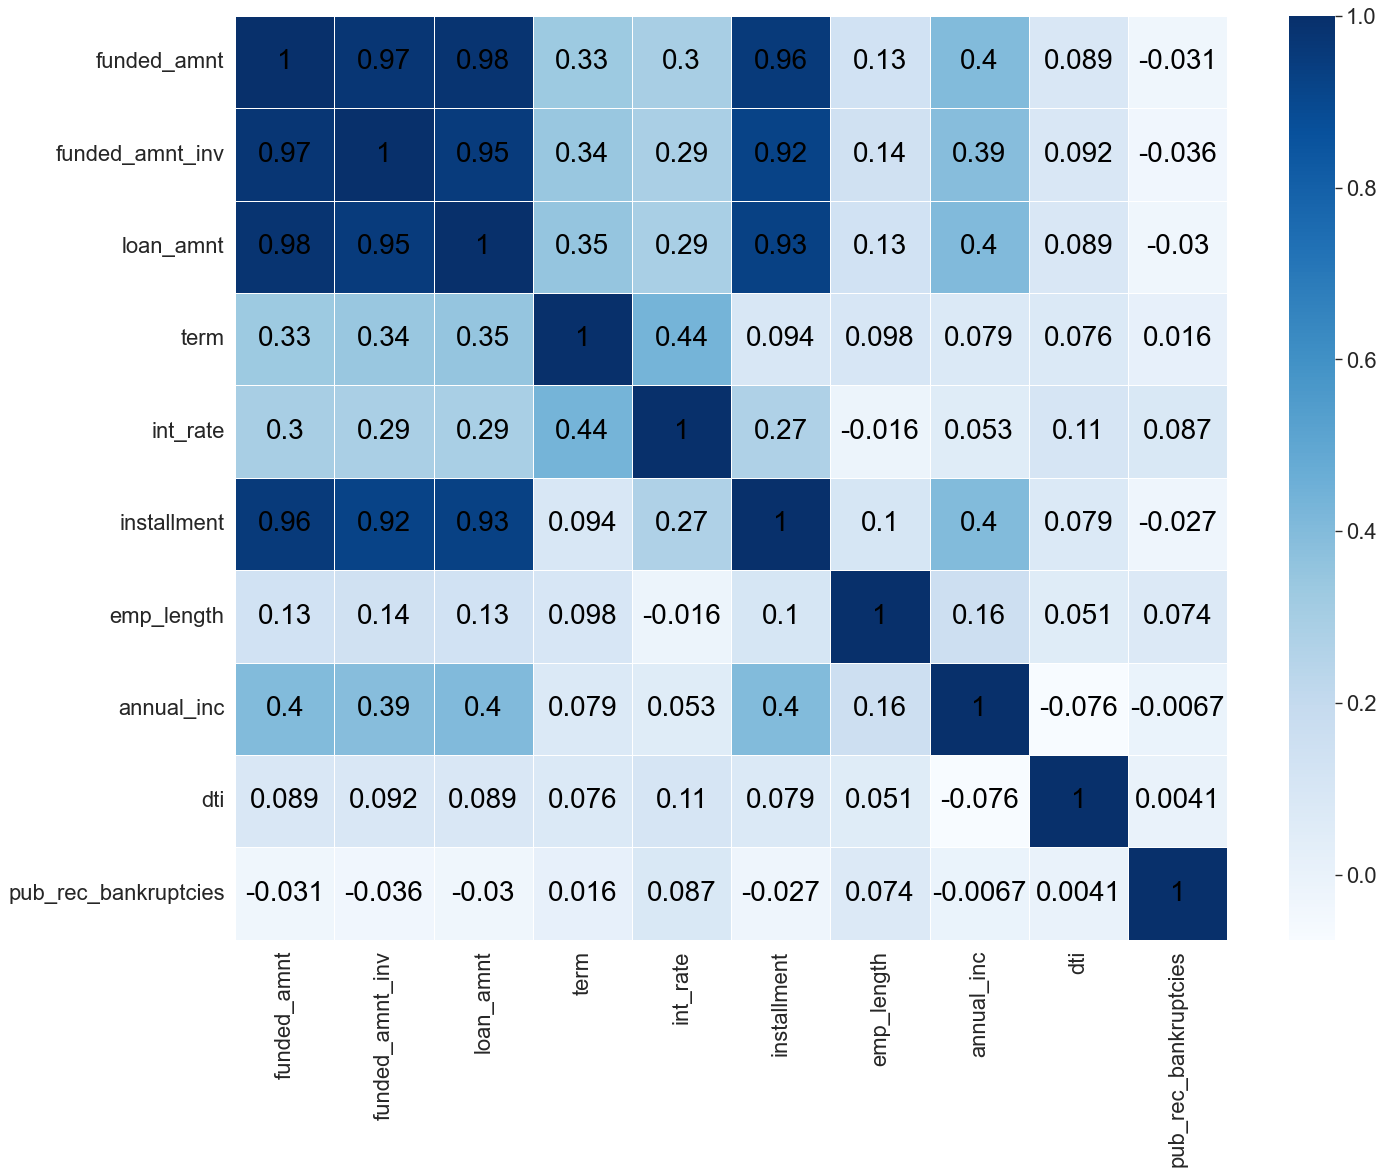

In [314]:
df_corr = df_loan[['funded_amnt', 'funded_amnt_inv' ,'loan_amnt','term' , 'int_rate','installment','emp_length',
                   'annual_inc','dti','pub_rec_bankruptcies']]

corr=df_corr.corr()

plt.figure(figsize = (20,15),dpi=80)
sns.set(font_scale=1.8)
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values,linewidths=.5,cmap="Blues",
            annot_kws={"size": 25 ,"color": "black"})
plt.show()

### 8.1 Inference from Correlation Analysis

* **Strong correlation**
    * installment has strong correlation with loan_amnt, funded_amnt_inv and funded_amnt.
    * loan_amnt has strong correlation with funded_amnt and funded_amnt_inv.
* **Weak correlation**
    * dti has weak correlation with most of the columns.
    * emp_length has weak correlation with most of the columns.
* **Negative correlation**
    * pub_rec_bankruptcies has negative correlation with most of the fields
    * emp_length has negative correlation with int_rate.
    * annual_inc has negative correlation with dti.

## 9 Multivariate analysis

##### Mutivariate analysis will be done for the following columns against the Loan status and Charge off %
1. grade
2. Sub Grade
3. Emp_length
4. State
5. Purpose
6. Home ownership
7. verification status
8. anual income
9. DTI
10. interest rate

### 9.1 Getting required details

In [315]:
def getChargeoffPercentage ( columnName):
    
    chargeoff_dt= pd.crosstab(df_loan[columnName],df_loan['loan_status'],margins=True)
    chargeoff_dt.rename(columns={'All':'Total'},inplace=True)
    chargeoff_dt['Charged Off %'] =  round((chargeoff_dt['Charged Off'] * 100 / chargeoff_dt['Total']), 2)
    chargeoff_dt = chargeoff_dt[0:-1]
    chargeoff_lineplot= chargeoff_dt ['Charged Off %'] 
    chargeoff_barplot = chargeoff_dt.iloc[:, 0:3]

    return chargeoff_lineplot,chargeoff_barplot,chargeoff_dt

### 9.2 Grade

In [316]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'grade' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status  Charged Off  Fully Paid  Total  Charged Off %
grade                                                     
G                     96         166    262          36.64
F                    287         589    876          32.76
E                    652        1769   2421          26.93
D                   1050        3690   4740          22.15
C                   1293        6029   7322          17.66
B                   1352        9576  10928          12.37
A                    587        8958   9545           6.15

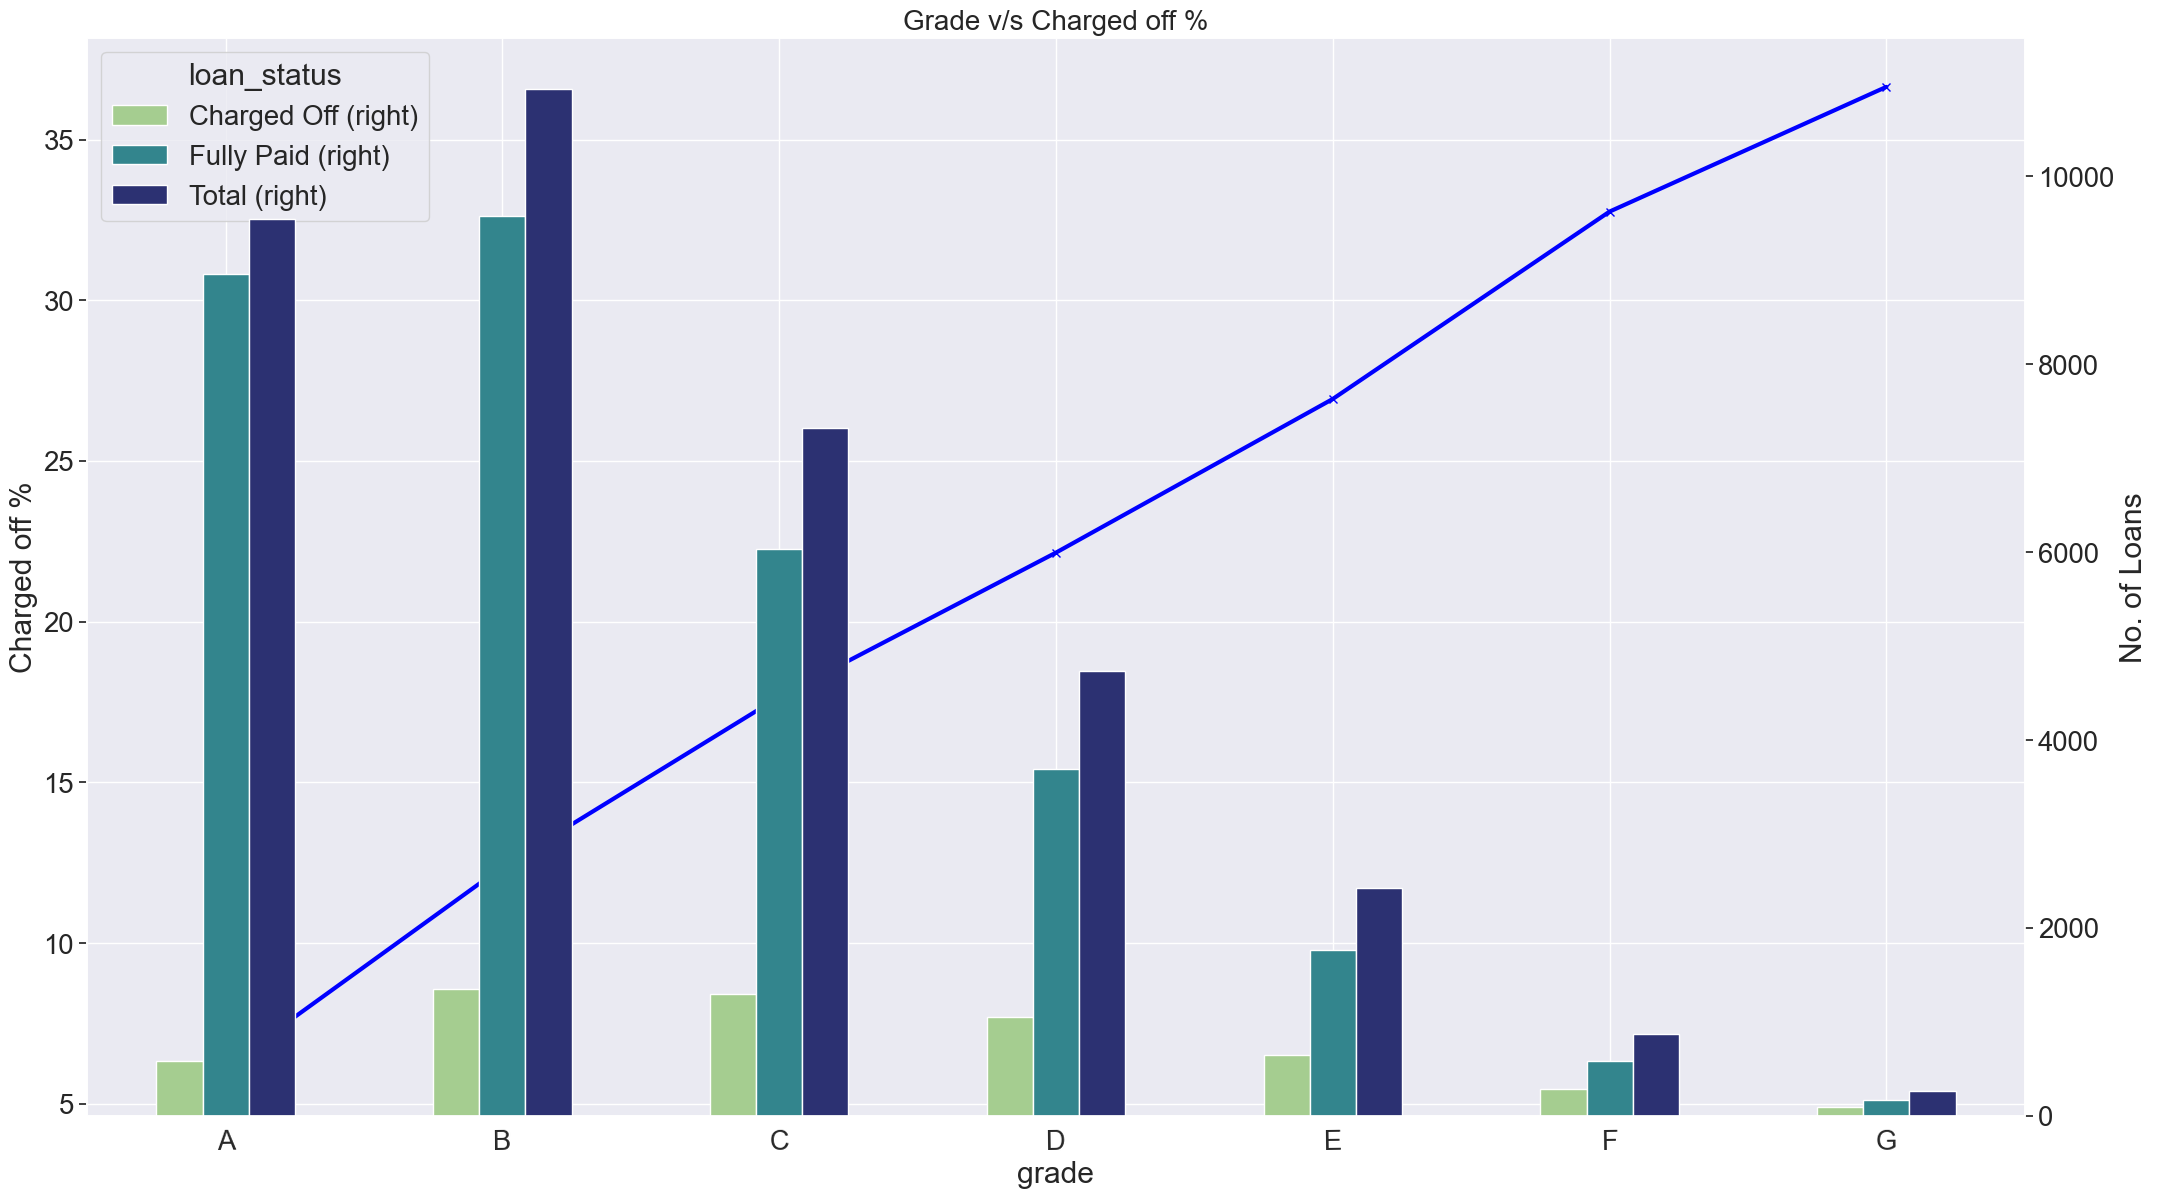

In [317]:
fig ,lnax = plt.subplots(figsize=(25,14) ,dpi=100)
line = chargeoff_lineplot.plot(ax=lnax,marker ='x',color='blue',lw=3)
line.set_title('Grade v/s Charged off %',fontsize=20)

line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=1,secondary_y=True,stacked=False ,colormap='crest')

brax.set_ylabel("No. of Loans")
plt.show()


* The tendency to default is higher for Grades B, C, and D. However, the charge-off percentages relative to the total number of loans are highest for Grades G and F, at 36.6% and 32.8%, respectively. Despite having fewer loans in Grades G and F, caution should be applied when approving loans on these grades too as the likelihood of default is higher in these grades as well.

### 9.2 Sub-Grade

In [318]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'sub_grade' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status  Charged Off  Fully Paid  Total  Charged Off %
sub_grade                                                 
F5                    51          48     99          51.52
G3                    19          22     41          46.34
G5                     9          12     21          42.86
G2                    26          41     67          38.81
G1                    31          57     88          35.23
F4                    46          91    137          33.58
F2                    66         146    212          31.13
E4                   115         271    386          29.79
F3                    45         109    154          29.22
F1                    79         195    274          28.83
E5                    98         242    340          28.82
E1                   183         485    668          27.40
E2                   147         409    556          26.44
D5                   197         580    777          25.35
G4                    11          34     45          24.44
D4                   201         648    849          23.67
E3                   109         362    471          23.14
D3                   241         809   1050          22.95
D2                   255         946   1201          21.23
C3                   262        1126   1388          18.88
C5                   200         876   1076          18.59
D1                   156         707    863          18.08
C4                   203         920   1123          18.08
C2                   310        1506   1816          17.07
C1                   318        1601   1919          16.57
B5                   343        2113   2456          13.97
B4                   314        1985   2299          13.66
B3                   323        2304   2627          12.30
B2                   211        1653   1864          11.32
B1                   161        1521   1682           9.57
A5                   212        2369   2581           8.21
A4                   172        2560   2732           6.30
A3                   100        1615   1715           5.83
A2                    73        1356   1429           5.11
A1                    30        1058   1088           2.76

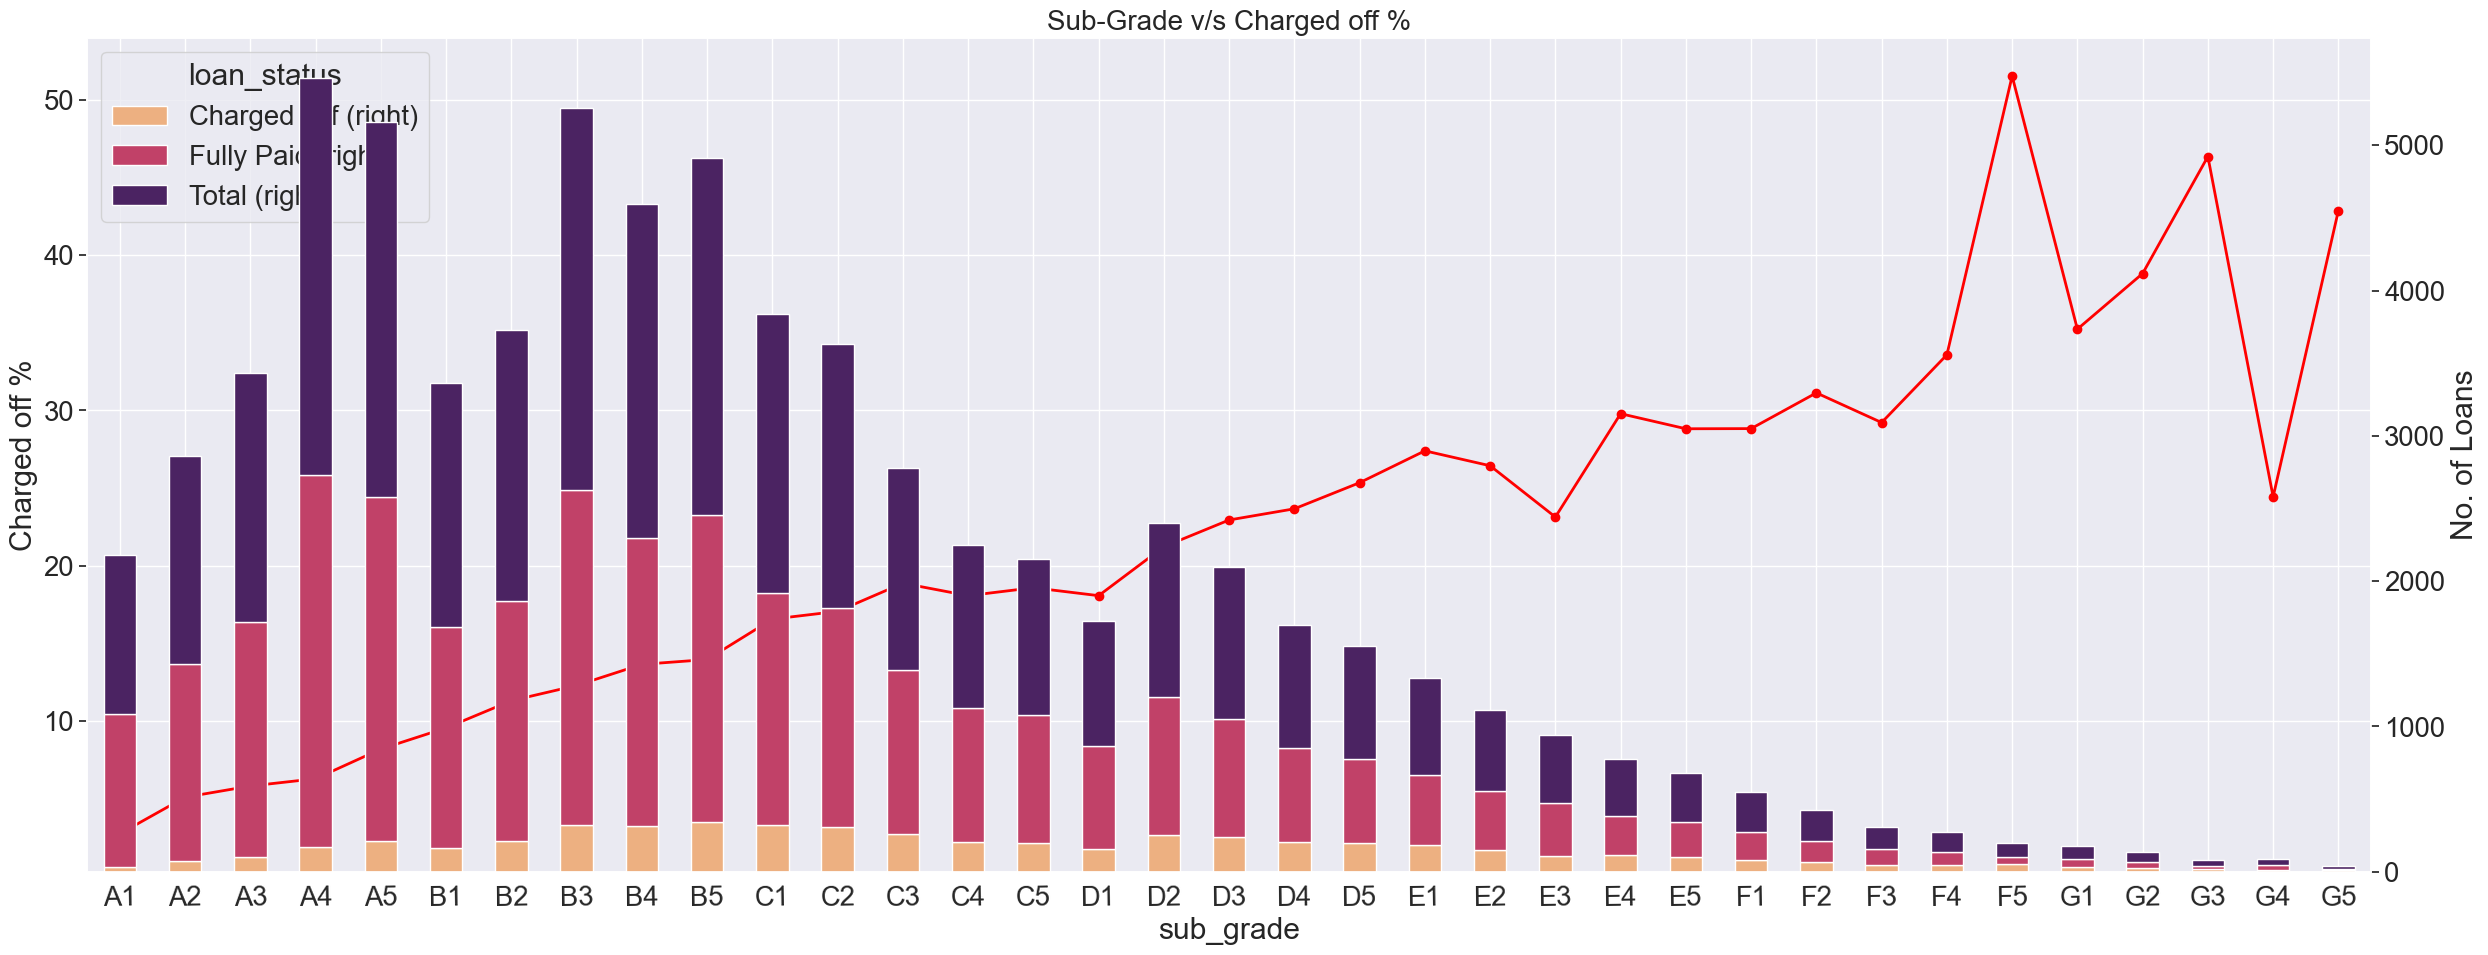

In [319]:
fig ,lnax = plt.subplots(figsize=(25,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='o',color='red',lw=2)
line.set_title('Sub-Grade v/s Charged off %',fontsize=20)
line.set_xlabel('Sub-Grade')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=1,secondary_y=True,stacked=True ,colormap='flare')
plt.tight_layout()
brax.set_ylabel("No. of Loans")
plt.show()

* Borrowers in sub-grades B3, B4, B5, C1, C2, and D2 are likely to default. However, in terms of charge-off percentage relative to the total number of loans, F5 and G3 have the highest rates. The best performance in this category is seen in grades A1 to A5, with less than 10% of borrowers defaulting. Company should also provide special attention to subgrades F5 and G3 while approving loans.


### 9.3 Employee Length of service

In [320]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'emp_length' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status  Charged Off  Fully Paid  Total  Charged Off %
emp_length                                                
10                  1474        7351   8825          16.70
7                    247        1377   1624          15.21
1                    436        2528   2964          14.71
5                    437        2582   3019          14.47
8                    191        1133   1324          14.43
6                    291        1757   2048          14.21
0                    592        3586   4178          14.17
3                    531        3241   3772          14.08
4                    432        2731   3163          13.66
2                    537        3499   4036          13.31
9                    149         992   1141          13.06

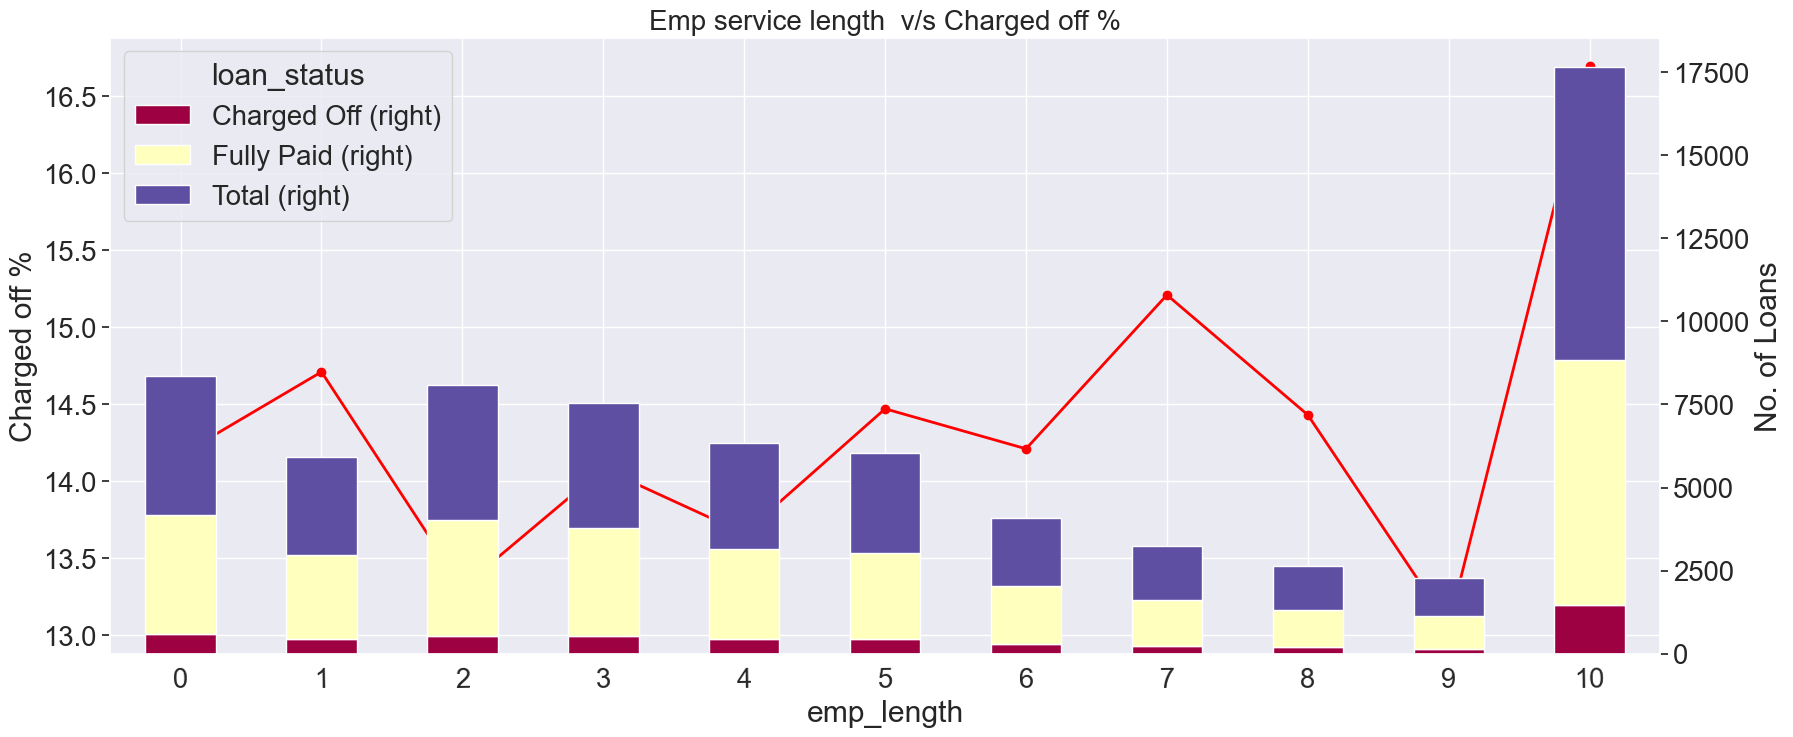

In [321]:
fig ,lnax = plt.subplots(figsize=(20,8))
line = chargeoff_lineplot.plot(ax=lnax,marker ='o',color='red',lw=2)
line.set_title('Emp service length  v/s Charged off %',fontsize=20)
line.set_xlabel('Employee length of service')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=1,secondary_y=True,stacked=True ,colormap='Spectral')
brax.set_ylabel("No. of Loans")
plt.show()

* Employees with over 10 years of service had a charge-off rate of 16.5%.This clearly indicates that the length of service is not a reliable criterion for loan approval.

### 9.4 State

In [322]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'addr_state' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status  Charged Off  Fully Paid  Total  Charged Off %
addr_state                                                
NV                   103         353    456          22.59
TN                     2           8     10          20.00
SD                    12          49     61          19.67
AK                    13          57     70          18.57
FL                   469        2145   2614          17.94
HI                    28         131    159          17.61
NM                    30         141    171          17.54
MO                   110         531    641          17.16
OR                    70         352    422          16.59
CA                  1055        5445   6500          16.23
GA                   204        1065   1269          16.08
WA                   122         641    763          15.99
NJ                   263        1382   1645          15.99
NH                    25         132    157          15.92
MD                   150         800    950          15.79
NC                   106         584    690          15.36
UT                    36         200    236          15.25
KY                    45         257    302          14.90
WI                    61         350    411          14.84
SC                    64         370    434          14.75
MI                    99         578    677          14.62
AZ                   117         685    802          14.59
OK                    39         241    280          13.93
IL                   190        1206   1396          13.61
MN                    79         503    582          13.57
NY                   456        2936   3392          13.44
VA                   172        1109   1281          13.43
CT                    89         576    665          13.38
OH                   151         982   1133          13.33
MT                    11          72     83          13.25
RI                    24         161    185          12.97
LA                    51         343    394          12.94
CO                    92         629    721          12.76
MA                   147        1031   1178          12.48
AL                    52         365    417          12.47
PA                   175        1241   1416          12.36
WV                    21         149    170          12.35
KS                    30         214    244          12.30
TX                   292        2144   2436          11.99
VT                     6          45     51          11.76
AR                    26         200    226          11.50
DE                    12          95    107          11.21
MS                     2          17     19          10.53
DC                    12         181    193           6.22
WY                     4          75     79           5.06
NE                     0           1      1           0.00
IN                     0           1      1           0.00
ID                     0           3      3           0.00
IA                     0           1      1           0.00

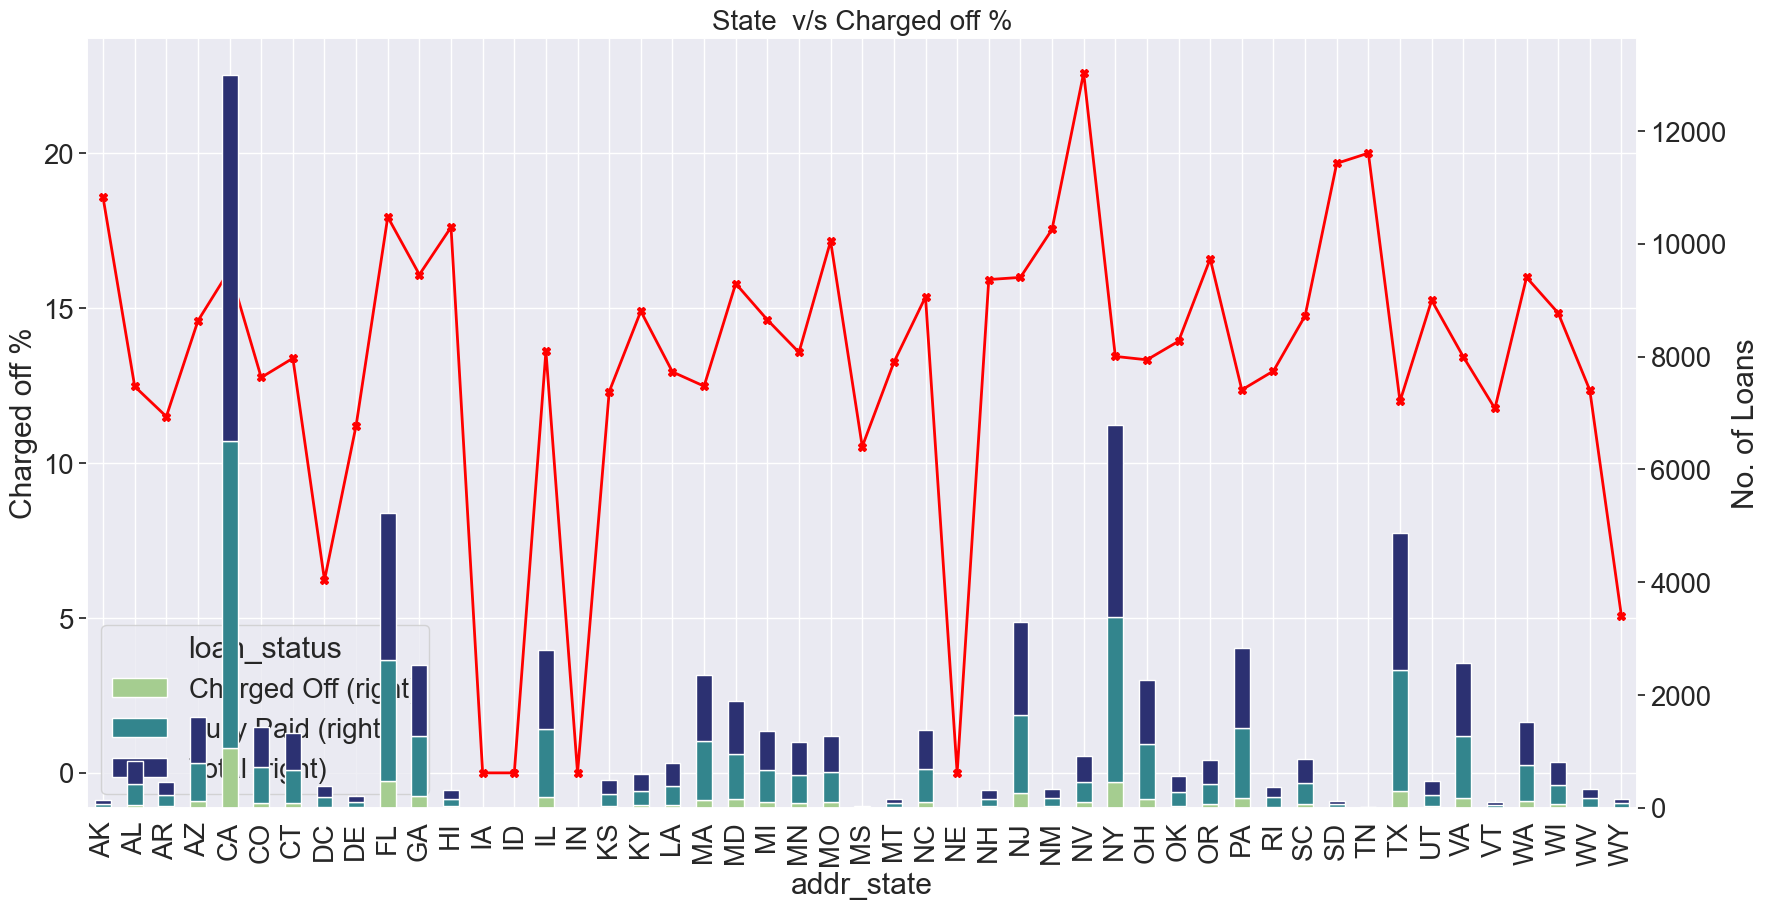

In [323]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('State  v/s Charged off %',fontsize=20)
line.set_xlabel('State')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=90,secondary_y=True,stacked=True ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

* Although the majority of loan defaulters are from CA, FL, and NY, there are 17 states with a charge-off rate more than 15%. The company should implement an efficient methodology to thoroughly evaluate loan applicants from these states before approving loans.

### 9.5 Purpose

In [324]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'purpose' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status         Charged Off  Fully Paid  Total  Charged Off %
purpose                                                          
small_business              438        1141   1579          27.74
renewable_energy             18          77     95          18.95
educational                  51         243    294          17.35
other                       593        3013   3606          16.44
medical                     103         532    635          16.22
house                        54         280    334          16.17
moving                       87         454    541          16.08
debt_consolidation         2633       14431  17064          15.43
vacation                     52         307    359          14.48
home_improvement            314        2222   2536          12.38
credit_card                 515        4184   4699          10.96
car                         156        1284   1440          10.83
major_purchase              213        1821   2034          10.47
wedding                      90         788    878          10.25

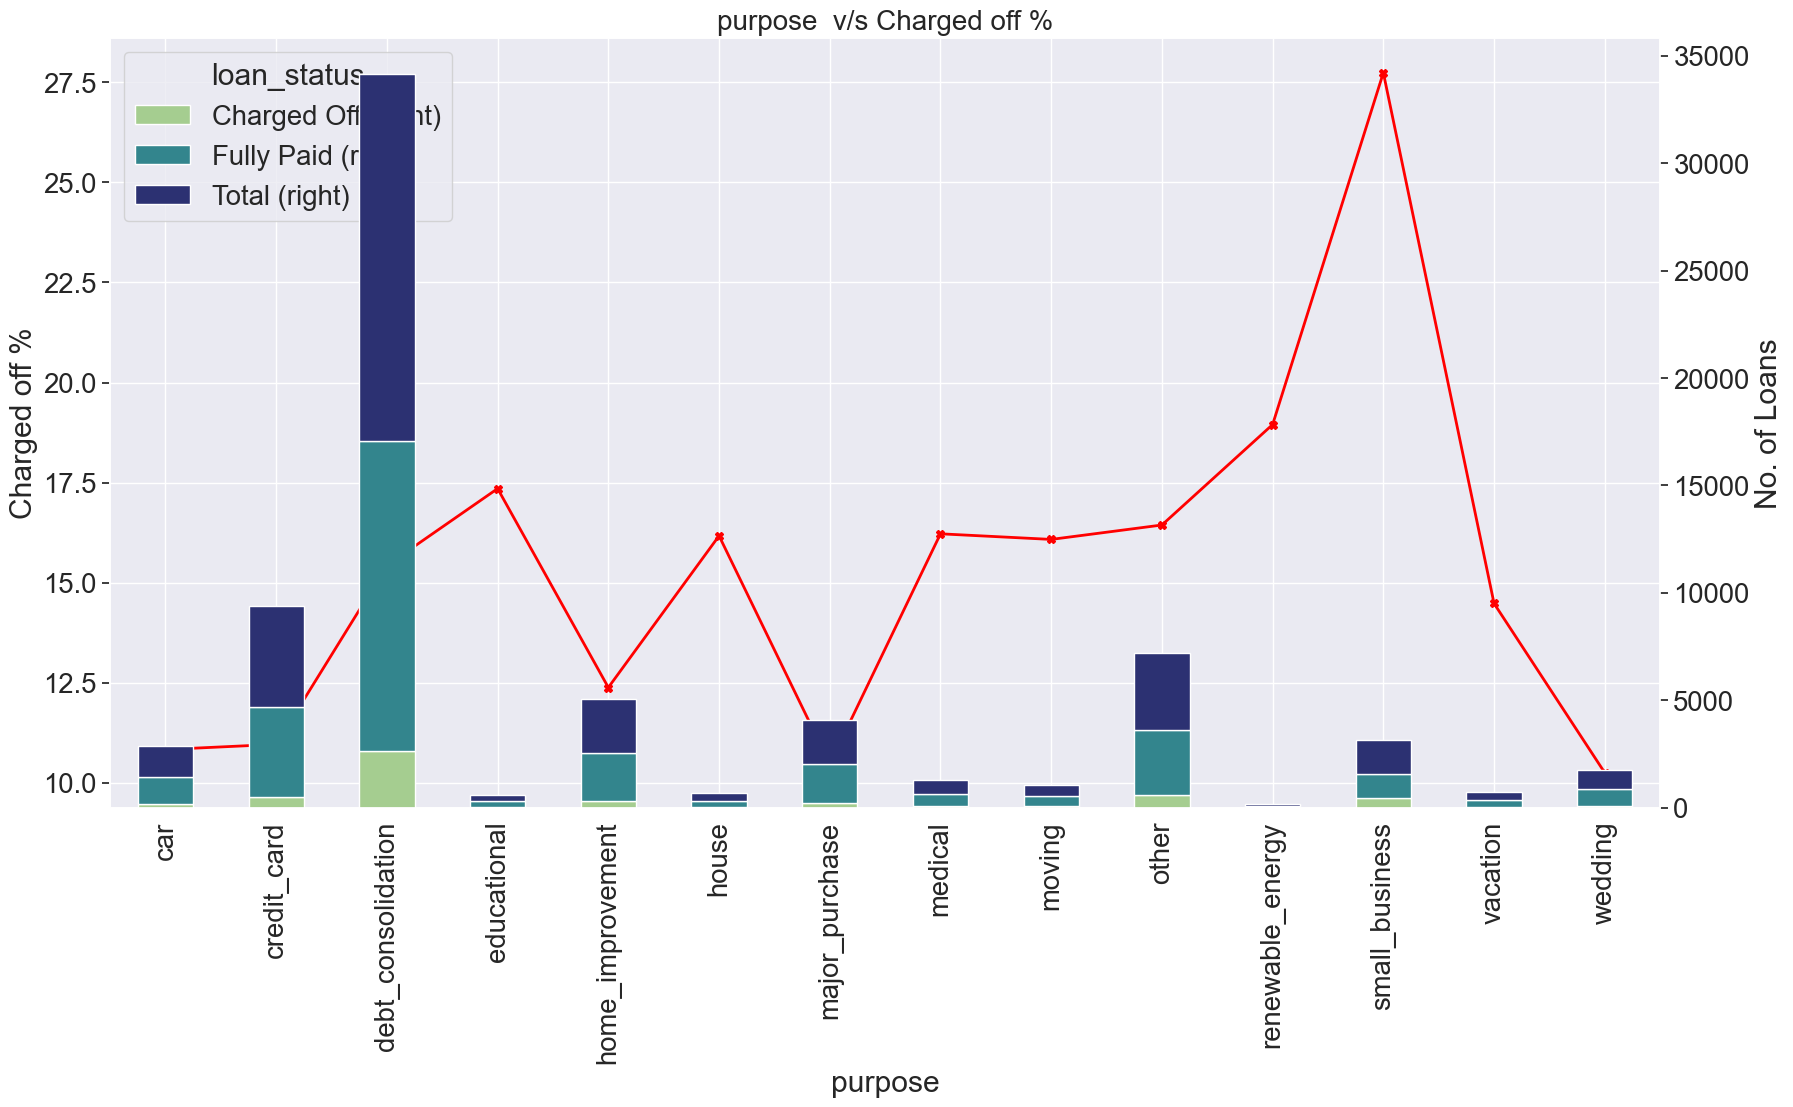

In [325]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('purpose  v/s Charged off %',fontsize=20)
line.set_xlabel('purpose')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=90,secondary_y=True,stacked=True ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

* Eventhough majority of defauters are in debt consolidation , considering Charge off percentage, small Business contribute the maximum which is 27.7%. Lending company should have proper measures in place for approving small business loans.

### 9.6 Home ownership

In [326]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'home_ownership' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status     Charged Off  Fully Paid  Total  Charged Off %
home_ownership                                               
OTHER                    17          76     93          18.28
RENT                   2715       14963  17678          15.36
OWN                     424        2373   2797          15.16
MORTGAGE               2161       13365  15526          13.92

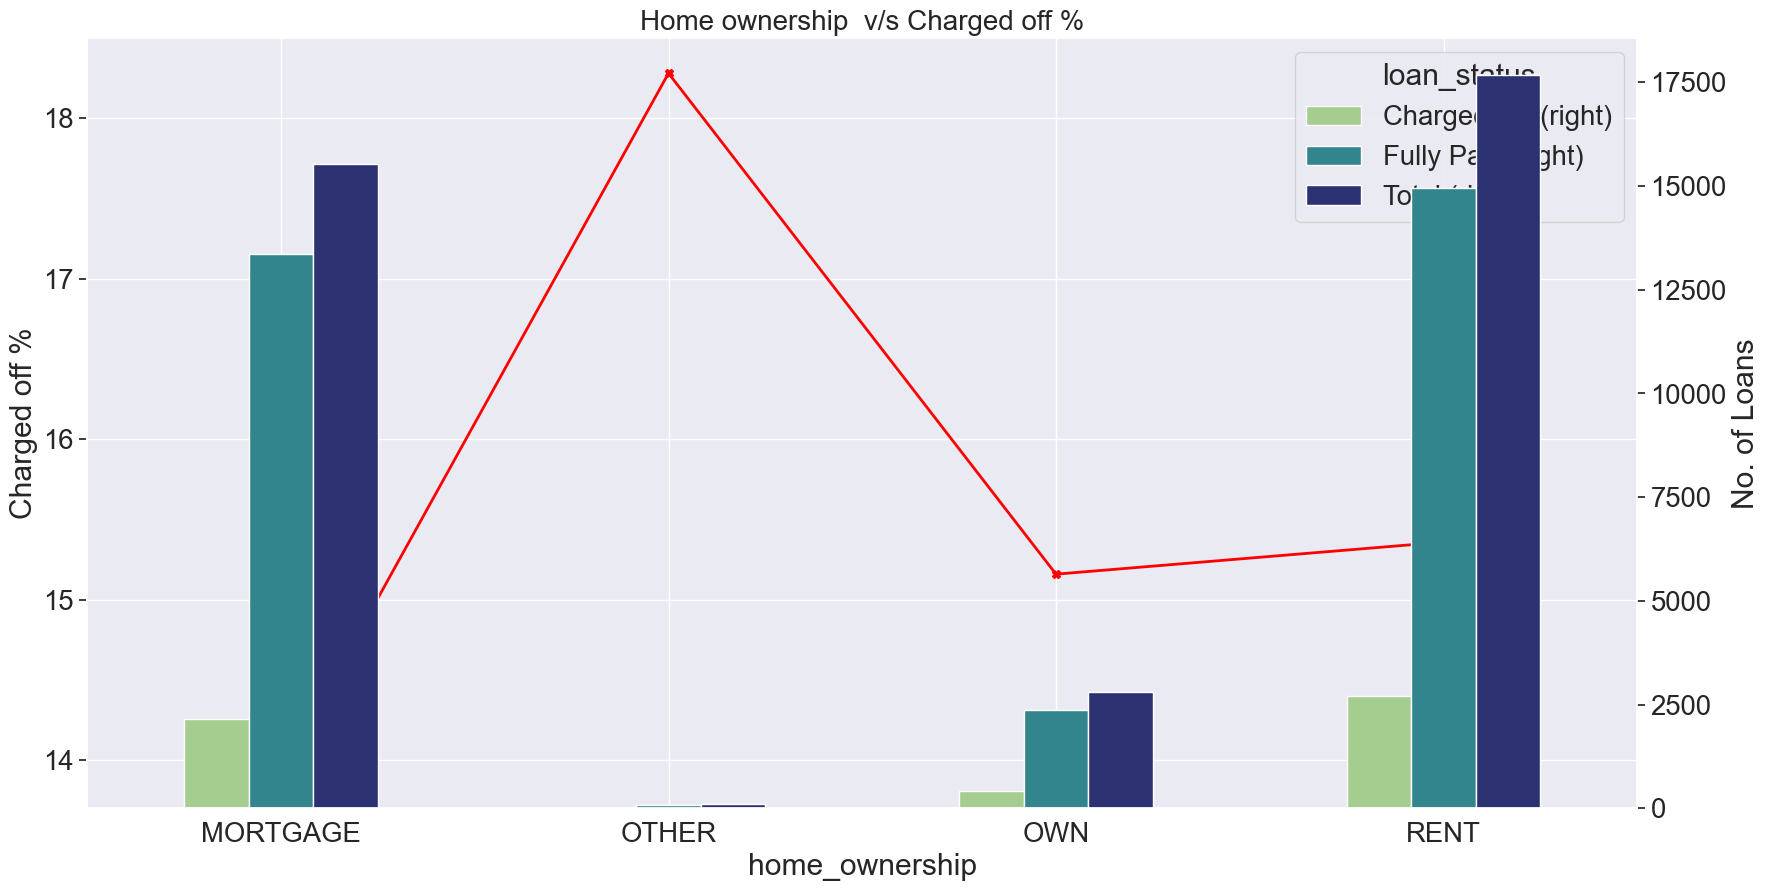

In [327]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('Home ownership  v/s Charged off %',fontsize=20)
line.set_xlabel('home_ownership')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=0,secondary_y=True,stacked=False ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

* Charge off % is more in Other living type.

### 9.7 verification status 

In [328]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'verification_status' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status          Charged Off  Fully Paid  Total  Charged Off %
verification_status                                               
Verified                    3331       17116  20447          16.29
Not Verified                1986       13661  15647          12.69

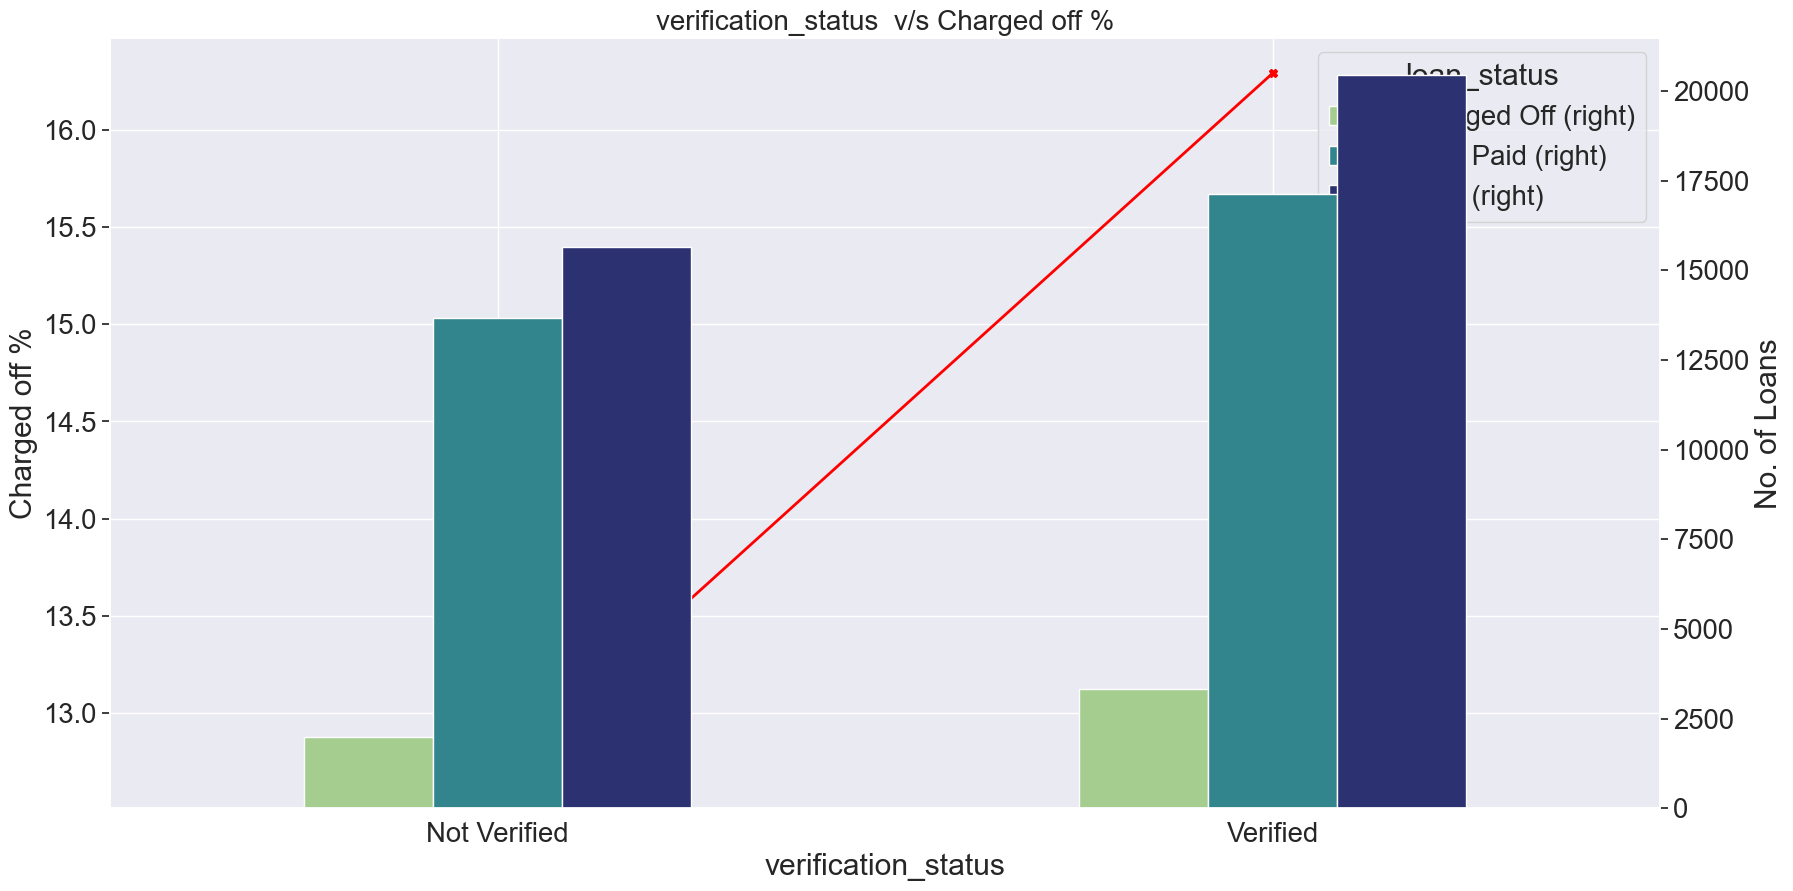

In [329]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('verification_status  v/s Charged off %',fontsize=20)
line.set_xlabel('verification_status')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=0,secondary_y=True,stacked=False ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

* Charge of % is more on Verified loans

### 9.8 Annual income

In [330]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'annual_inc_bucket' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status        Charged Off  Fully Paid  Total  Charged Off %
annual_inc_bucket                                               
0-40K                     1716        7757   9473          18.11
50K-60K                    854        4635   5489          15.56
40K-50K                    851        4748   5599          15.20
60K-70K                    543        3484   4027          13.48
70K-80K                    452        3012   3464          13.05
80K-above                  901        7141   8042          11.20

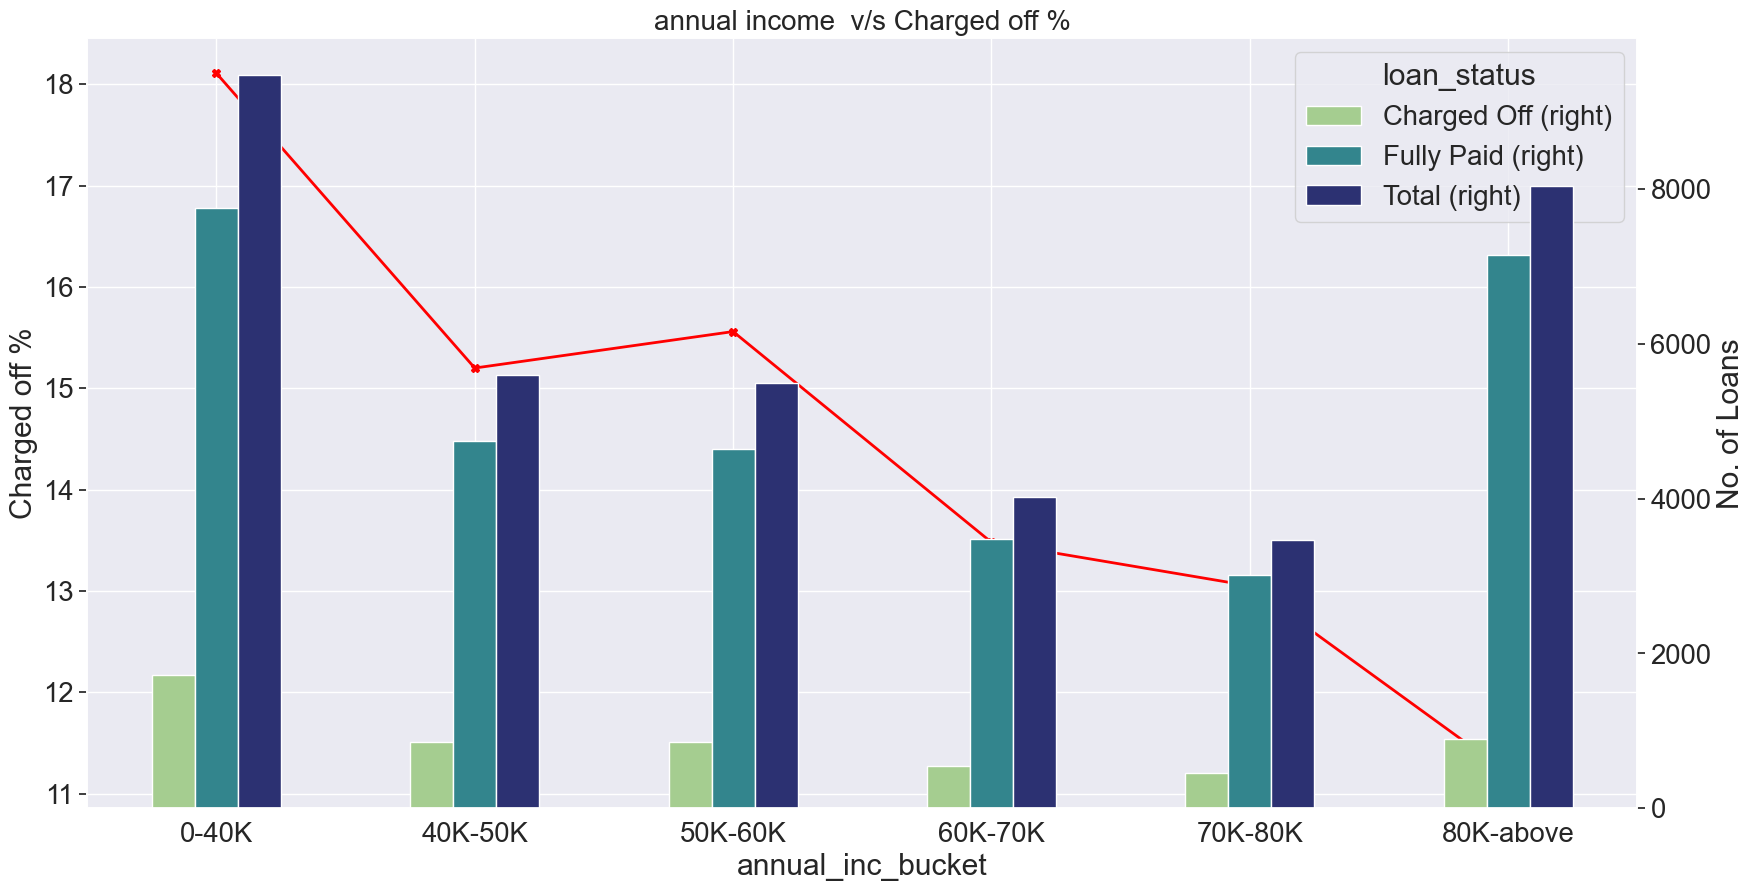

In [331]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('annual income  v/s Charged off %',fontsize=20)
line.set_xlabel('annual income')
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=0,secondary_y=True,stacked=False ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

* The charge-off rate is highest for employees earning less than 40K, at 18.1%. Borrowers in lower income groups have the highest tendency to default on loans, and this tendency generally decreases as annual income increases.

###  9.9 interest rate

In [332]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'int_rate_bucket' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status      Charged Off  Fully Paid  Total  Charged Off %
int_rate_bucket                                               
20% and above            291         482    773          37.65
15%-20%                 1693        5029   6722          25.19
10%-15%                 2546       14463  17009          14.97
5%-10%                   787       10803  11590           6.79

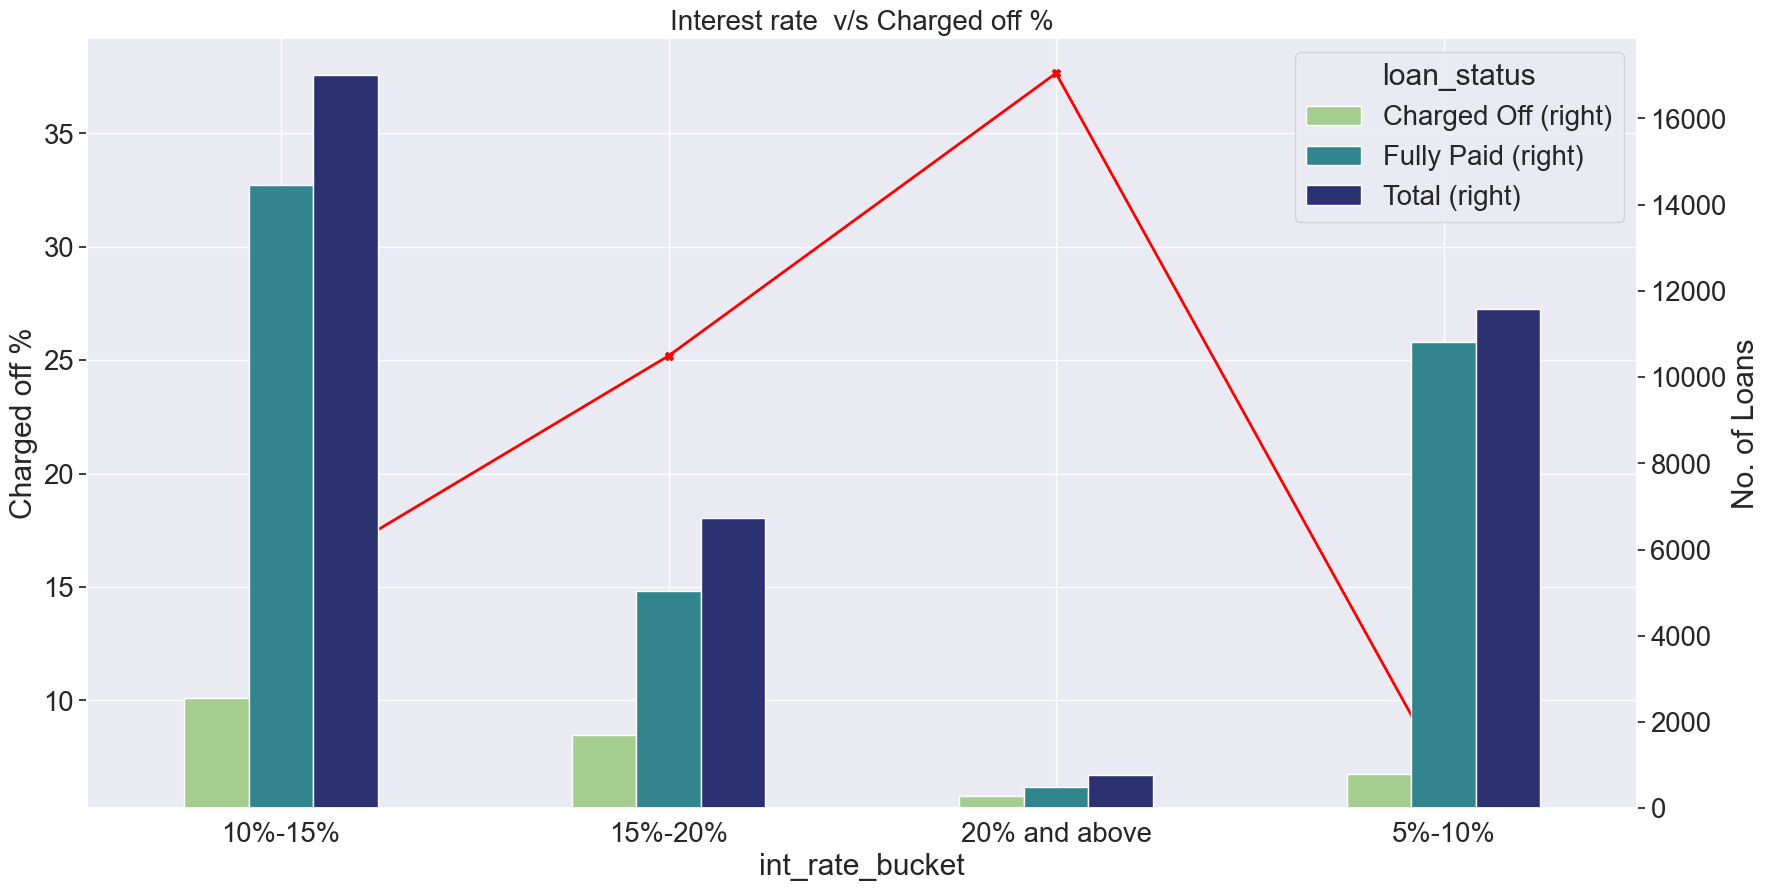

In [196]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('Interest rate  v/s Charged off %',fontsize=20)
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=0,secondary_y=True,stacked=False ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

Rise in interest rate  will lead to higher default percentage.

### 9.10 DTI

In [333]:
chargeoff_lineplot,chargeoff_barplot,chargeoff_dt = getChargeoffPercentage ( 'dti_bucket' )
chargeoff_dt1 =chargeoff_dt.sort_values(by='Charged Off %', ascending =False)
chargeoff_dt1

loan_status  Charged Off  Fully Paid  Total  Charged Off %
dti_bucket                                                
Very High           1235        6192   7427          16.63
High                1052        5428   6480          16.23
medium              1082        6154   7236          14.95
Low                  893        5611   6504          13.73
Very low            1055        7392   8447          12.49

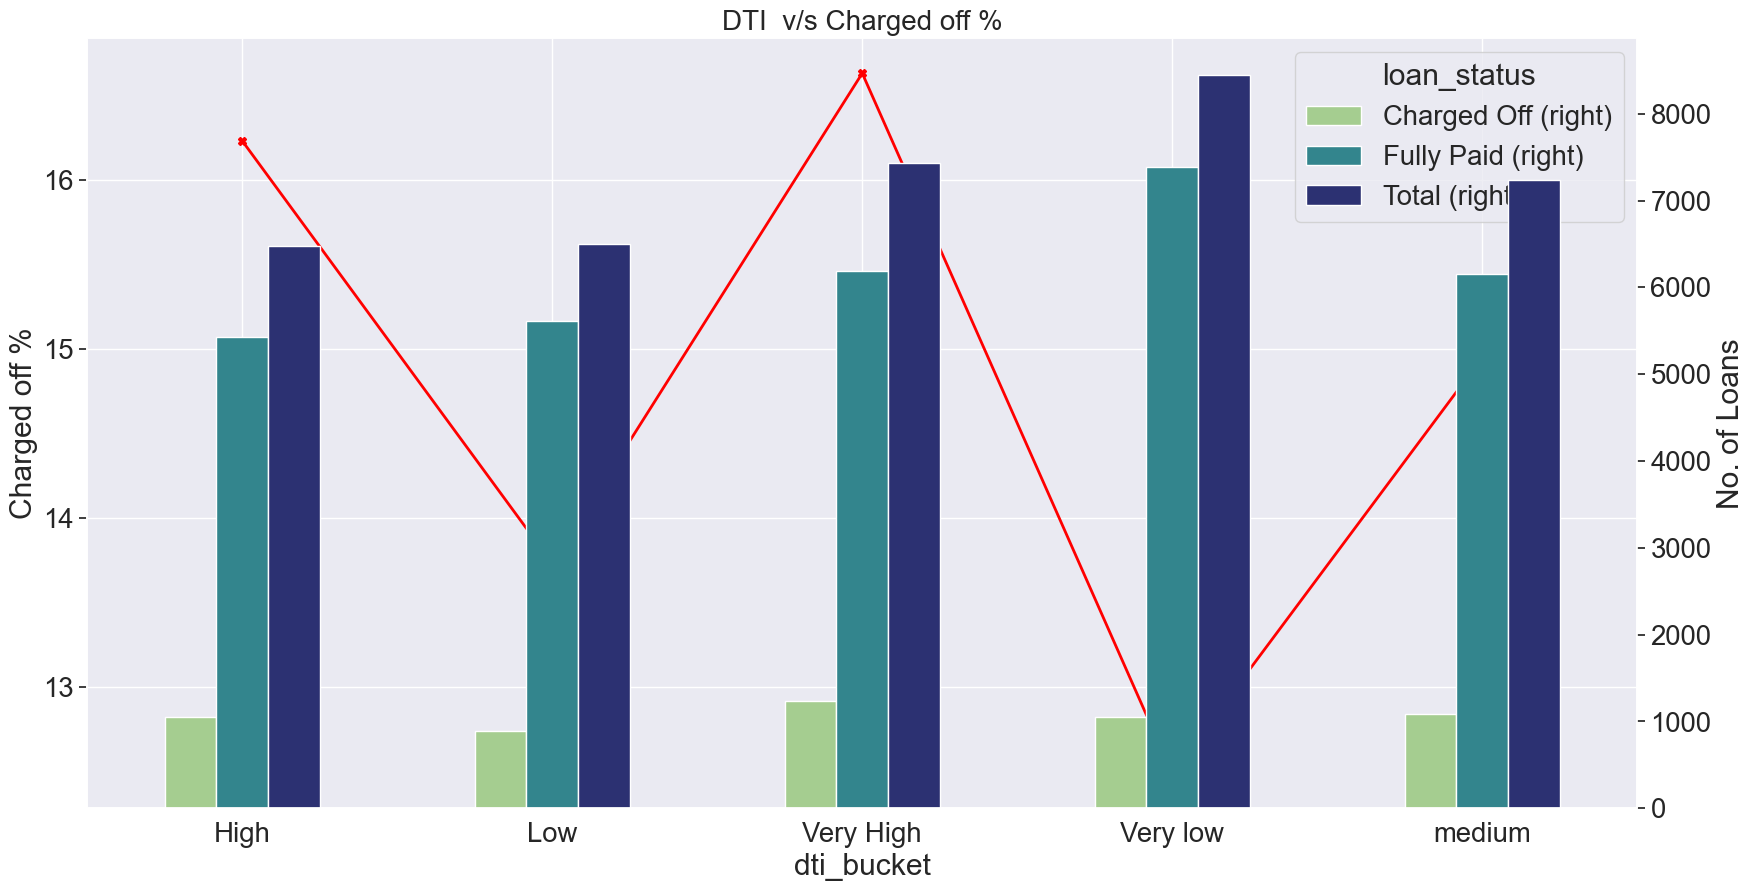

In [334]:
fig ,lnax = plt.subplots(figsize=(20,10))
line = chargeoff_lineplot.plot(ax=lnax,marker ='X',color='red',lw=2)
line.set_title('DTI  v/s Charged off %',fontsize=20)
line.set_ylabel('Charged off %')
brax= chargeoff_barplot.plot(kind='bar',ax=lnax,rot=0,secondary_y=True,stacked=False ,colormap='crest')
brax.set_ylabel("No. of Loans")
plt.show()

* Increase in DTI will lead to higher default percentage. Before approving loans, the company should verify the open debts and assess the payment capability of loan applicants relative to their income.

### 9.11 Multivariate Analysis Summary

* The tendency to default is higher for Grades B, C, and D. However, the charge-off percentages relative to the total number of loans are highest for Grades G and F, at 36.6% and 32.8%, respectively. Despite having fewer loans in Grades G and F, caution should be applied when approving loans on these grades too as the likelihood of default is higher in these grades as well

* Borrowers in sub-grades B3, B4, B5, C1, C2, and D2 are likely to default. However, in terms of charge-off percentage relative to the total number of loans, F5 and G3 have the highest rates. The best performance in this category is seen in grades A1 to A5, with less than 10% of borrowers defaulting. Company should also provide special attention to subgrades F5 and G3 while approving loans.
* Employees with over 10 years of service had a charge-off rate of 16.5%.This clearly indicates that the length of service is not a reliable criterion for loan approval.
* Although the majority of loan defaulters are from CA, FL, and NY, there are 17 states with a charge-off rate more than 15%. The company should implement an efficient methodology to thoroughly evaluate loan applicants from these states before approving loans.
* Eventhough majority of defauters are in debt consolidation , considering Charge off percentage, small Business contribute the maximum which is 27.7%. Lending company should have proper measures in place for approving small business loans.
* The charge-off rate is highest for employees earning less than 40K, at 18.1%. Borrowers in lower income groups have the highest tendency to default on loans, and this tendency generally decreases as annual income increases.
* Rise in interest rate and increase in DTI will lead to higher default percentage. Before approving loans, the company should verify the open debts and assess the payment capability of loan applicants relative to their income.